In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

import cv2
from skimage.measure import find_contours



(240, 240, 155)
Slice no:  0


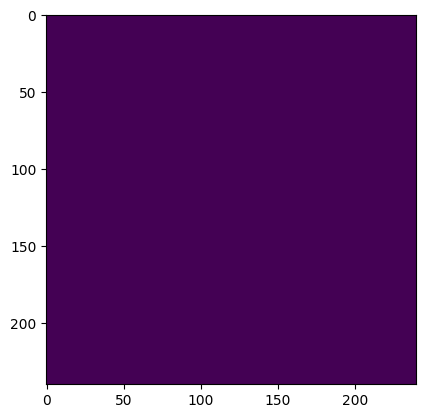

Slice no:  1


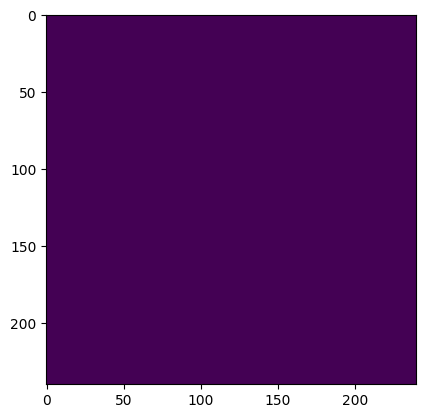

Slice no:  2


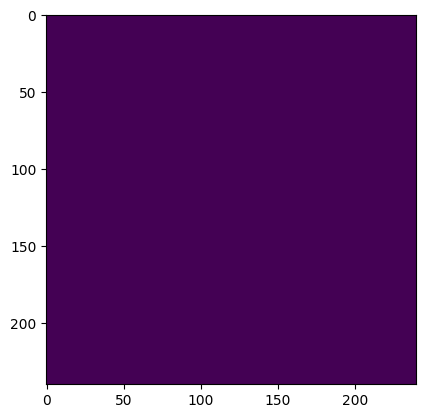

Slice no:  3


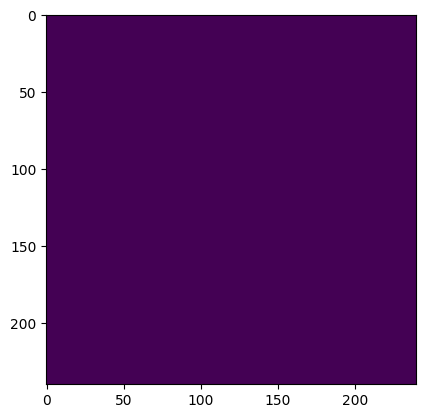

Slice no:  4


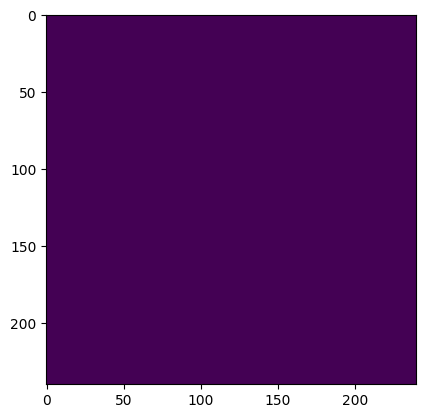

Slice no:  5


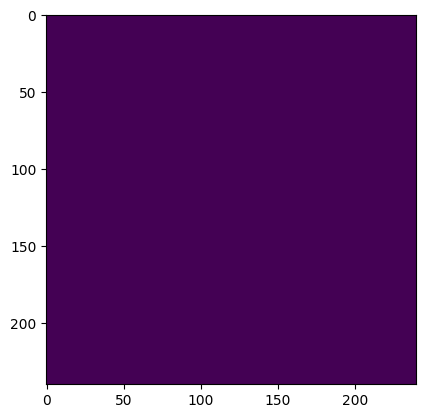

Slice no:  6


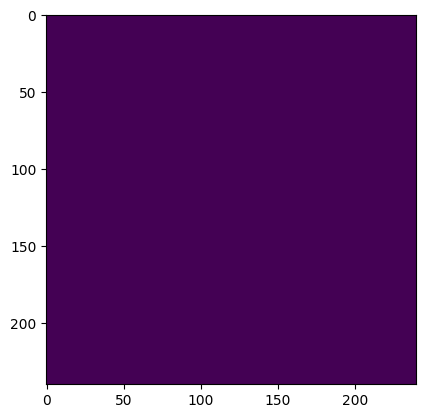

Slice no:  7


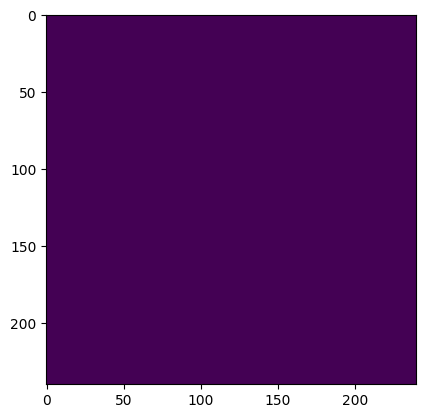

Slice no:  8


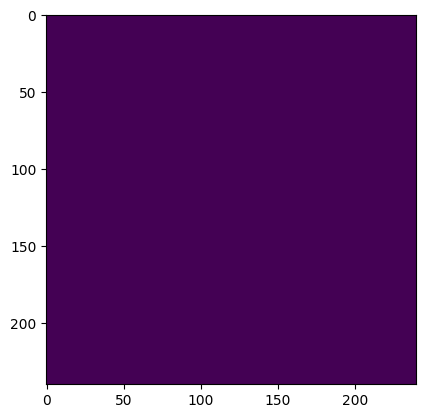

Slice no:  9


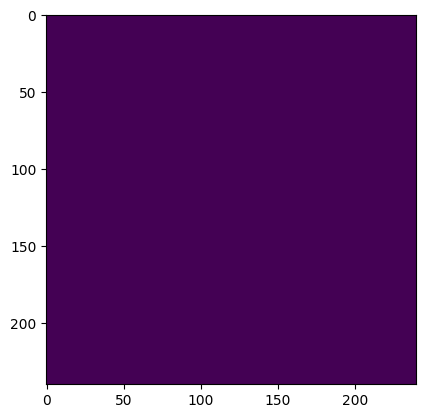

Slice no:  10


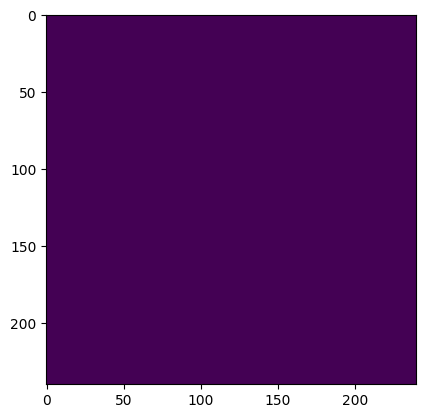

Slice no:  11


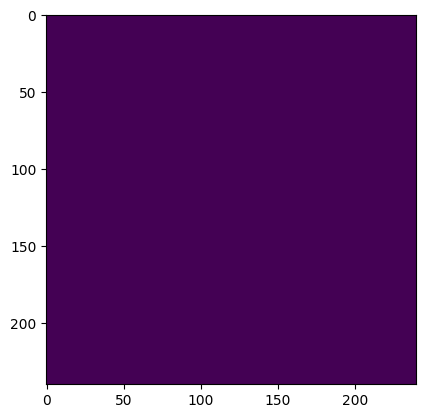

Slice no:  12


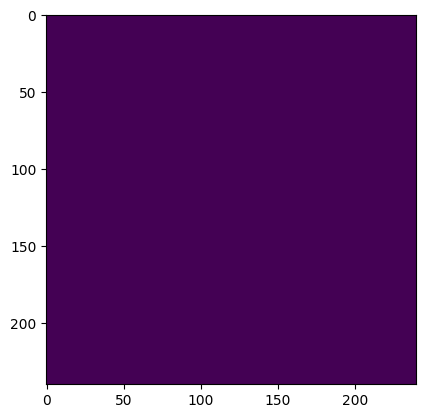

Slice no:  13


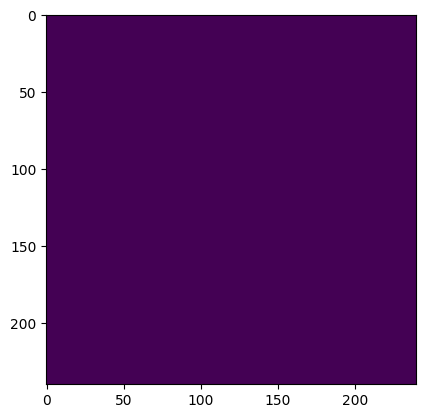

Slice no:  14


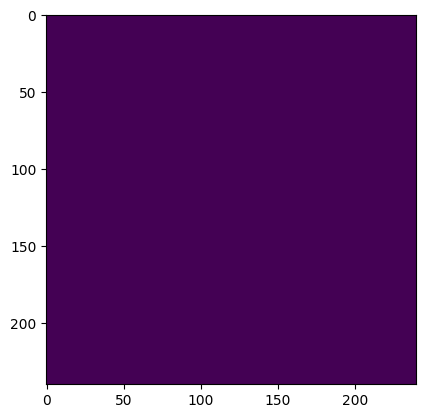

Slice no:  15


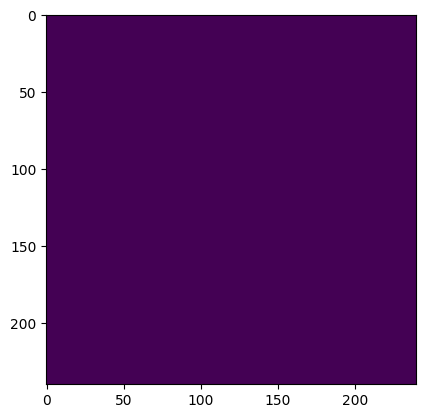

Slice no:  16


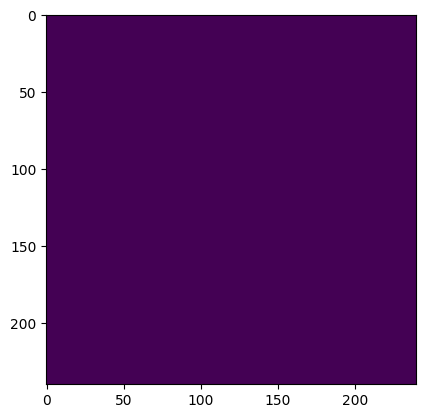

Slice no:  17


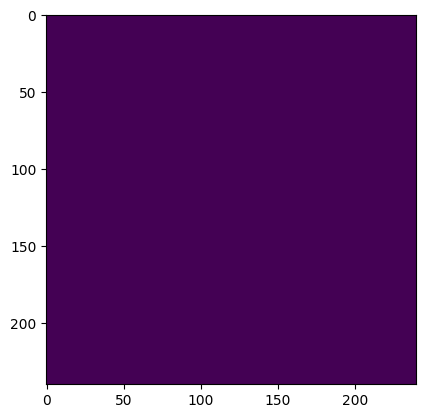

Slice no:  18


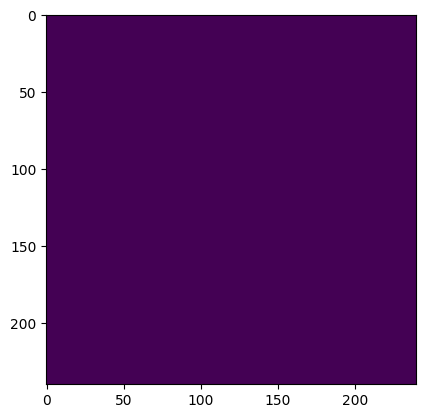

Slice no:  19


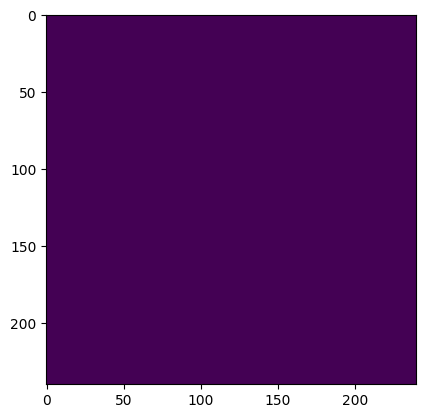

Slice no:  20


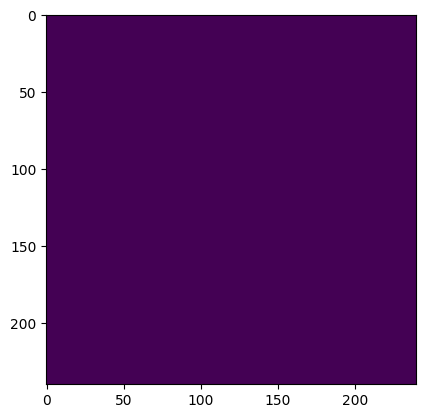

Slice no:  21


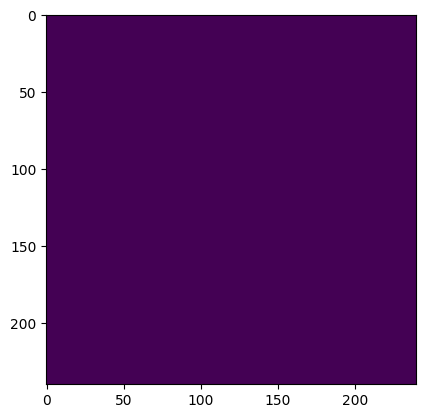

Slice no:  22


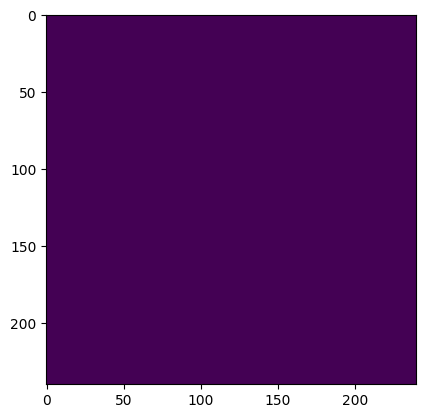

Slice no:  23


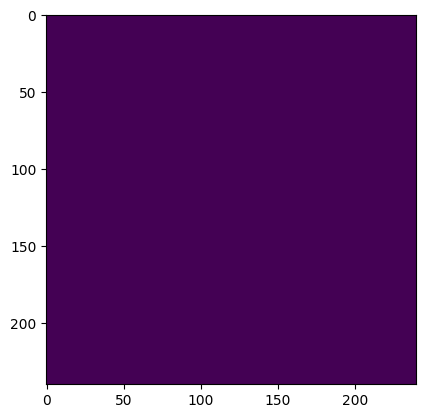

Slice no:  24


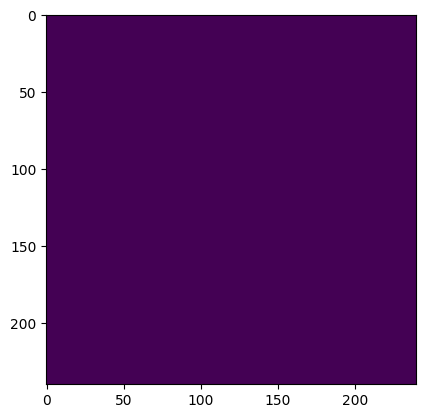

Slice no:  25


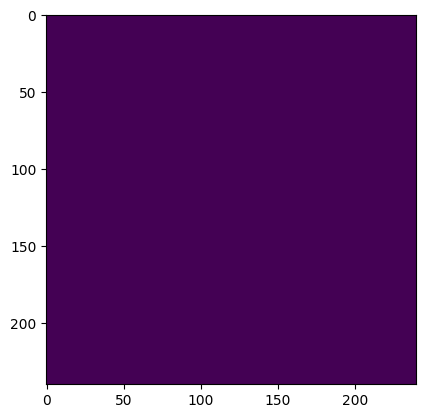

Slice no:  26


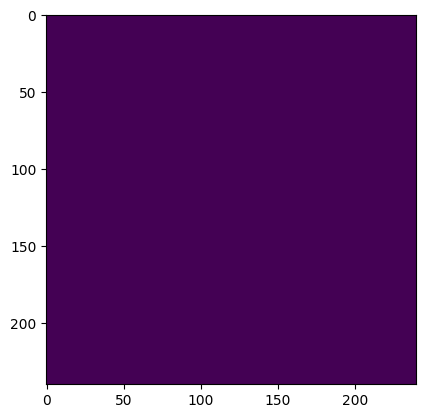

Slice no:  27


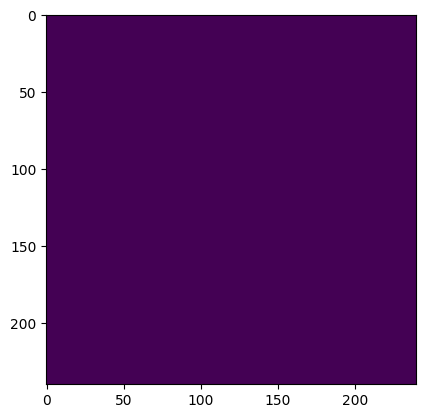

Slice no:  28


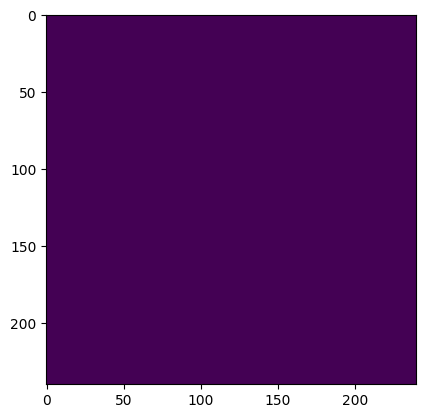

Slice no:  29


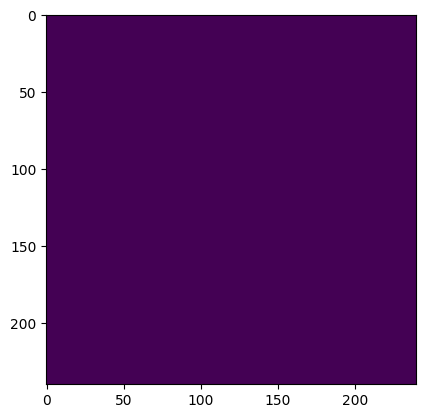

Slice no:  30


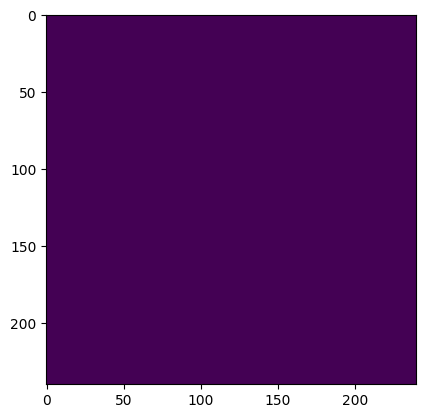

Slice no:  31


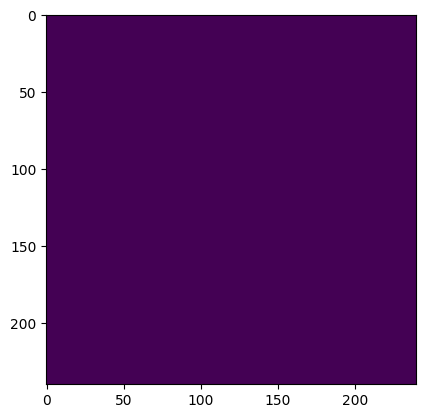

Slice no:  32


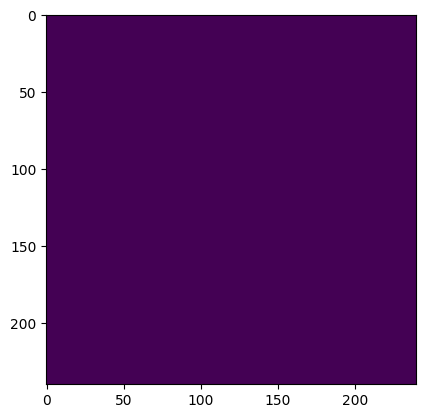

Slice no:  33


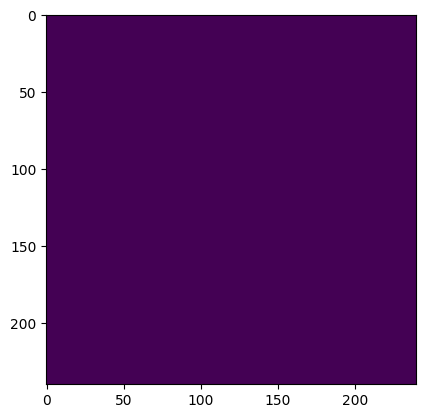

Slice no:  34


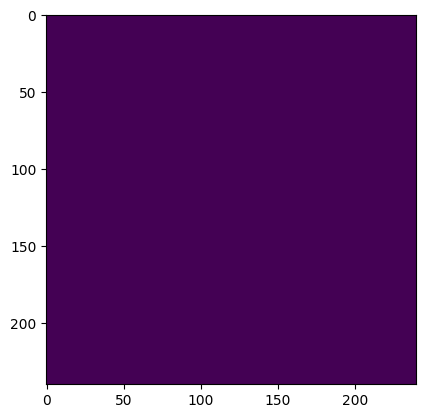

Slice no:  35


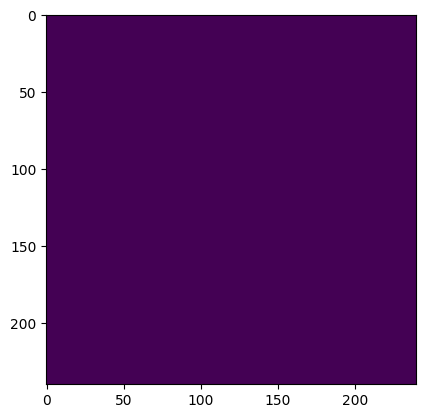

Slice no:  36


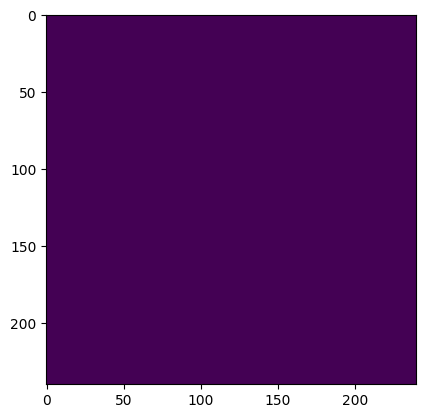

Slice no:  37


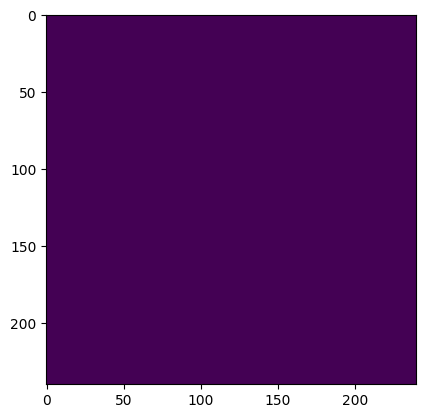

Slice no:  38


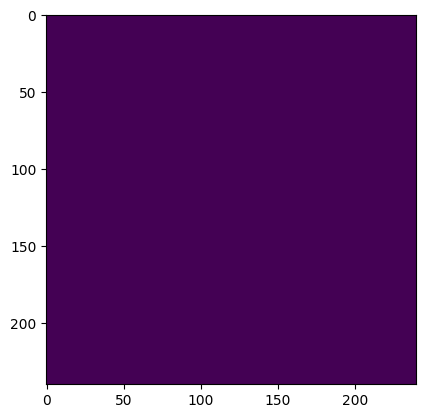

Slice no:  39


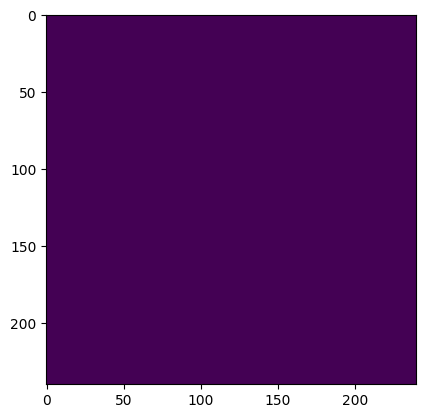

Slice no:  40


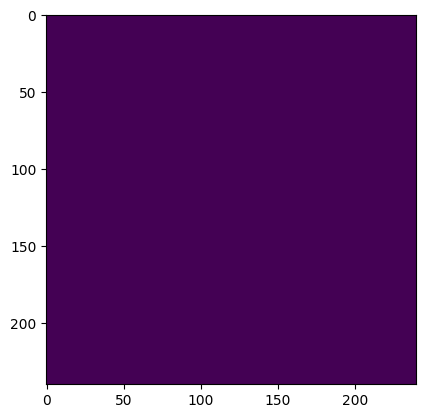

Slice no:  41


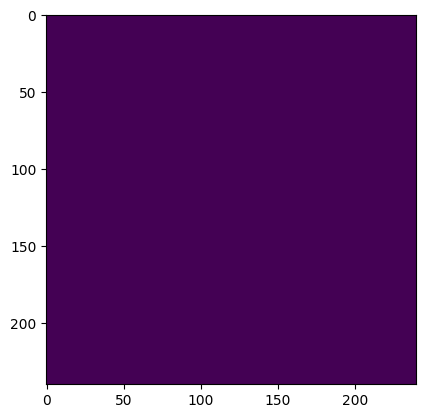

Slice no:  42


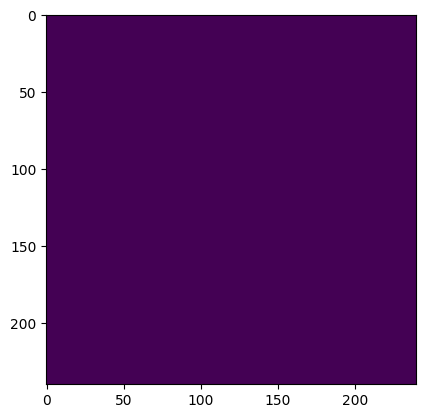

Slice no:  43


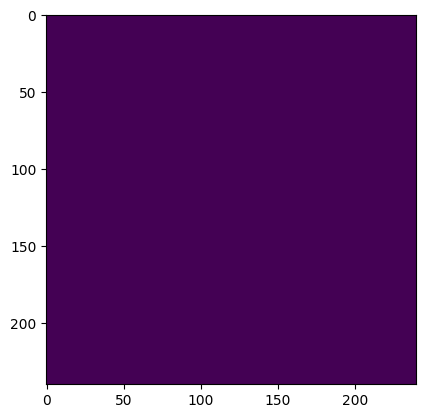

Slice no:  44


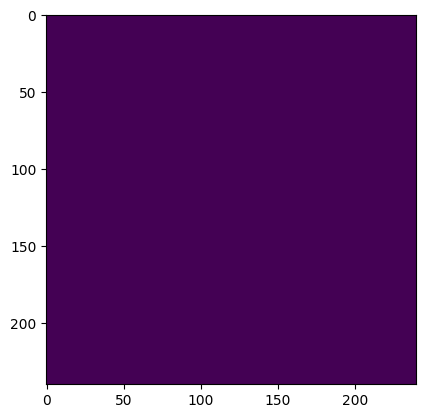

Slice no:  45


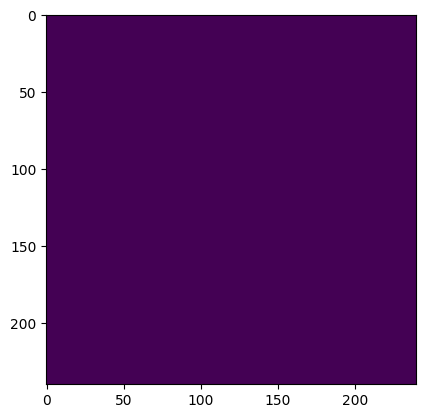

Slice no:  46


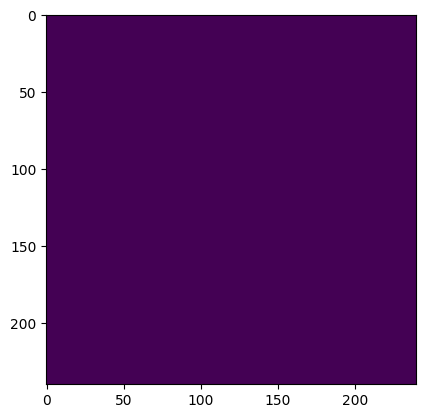

Slice no:  47


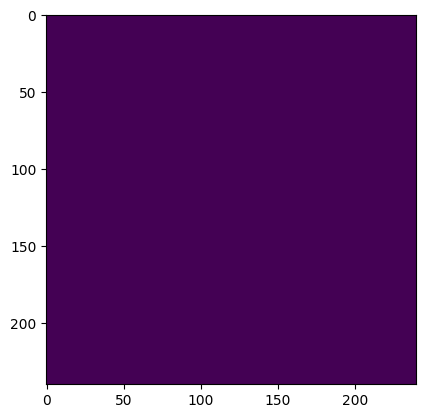

Slice no:  48


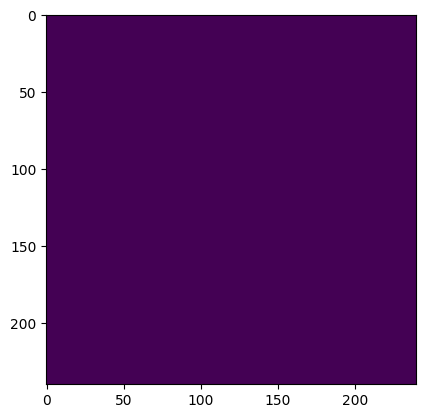

Slice no:  49


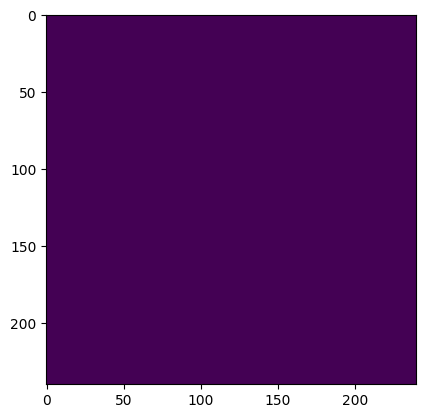

Slice no:  50


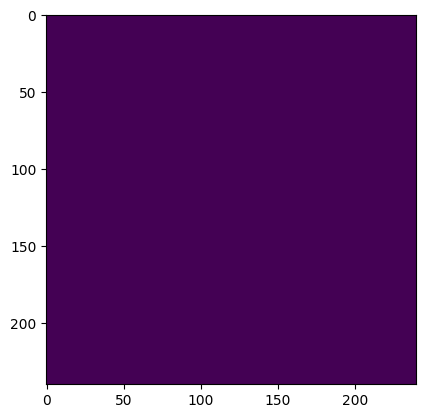

Slice no:  51


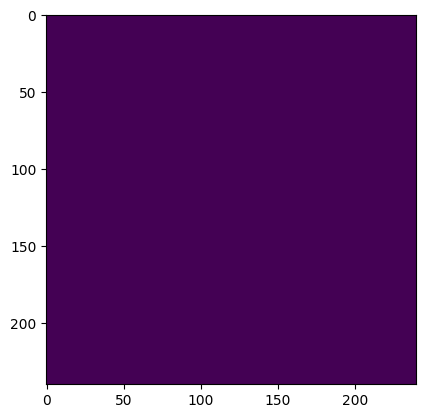

Slice no:  52


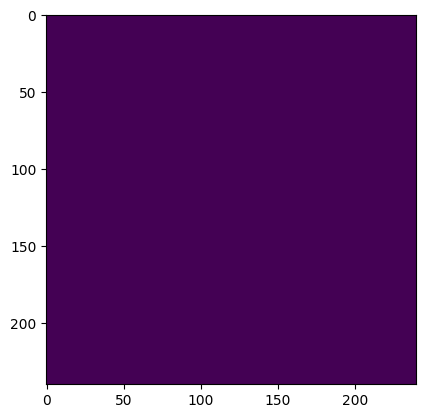

Slice no:  53


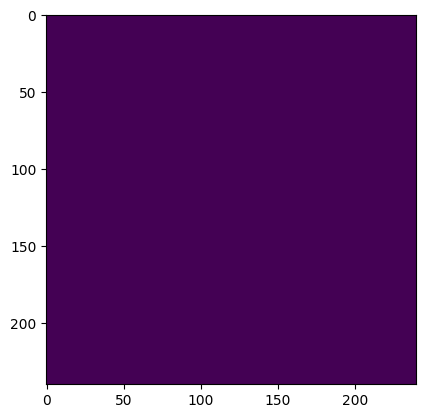

Slice no:  54


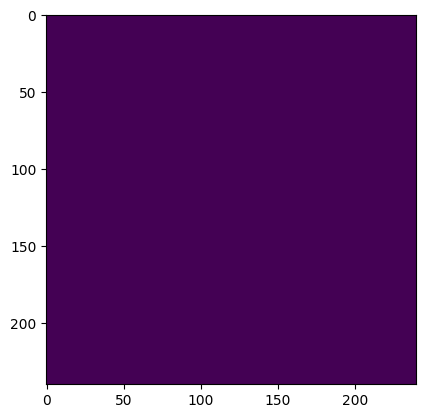

Slice no:  55


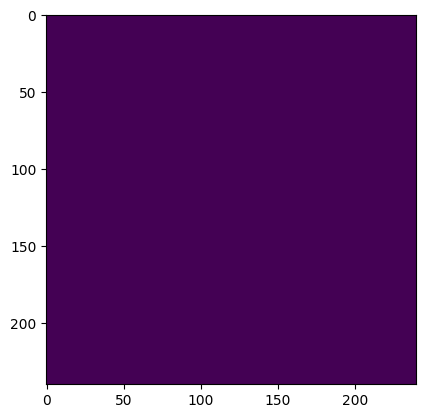

Slice no:  56


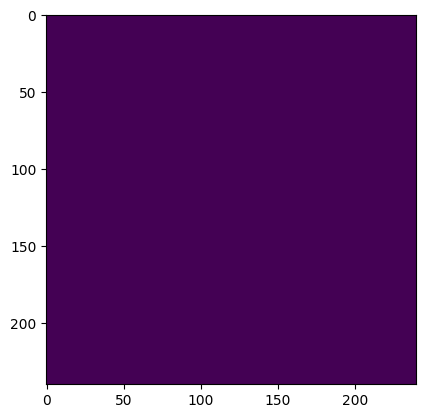

Slice no:  57


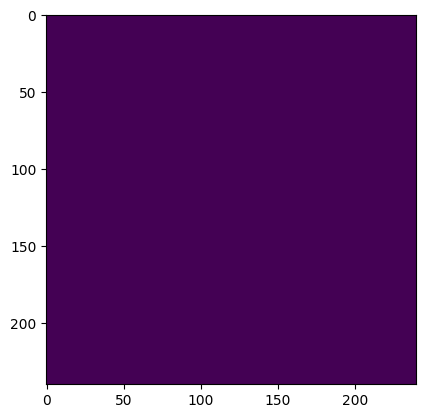

Slice no:  58


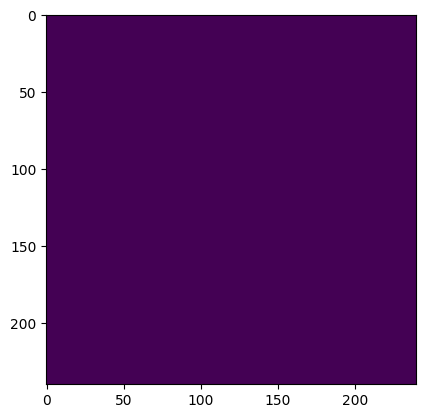

Slice no:  59


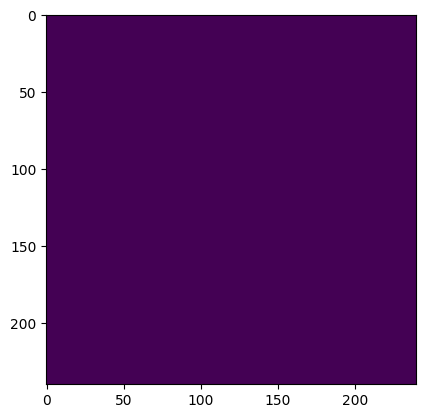

Slice no:  60


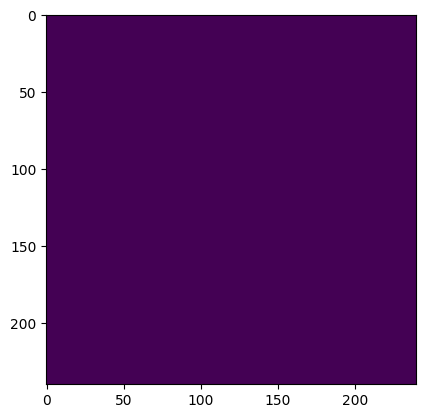

Slice no:  61


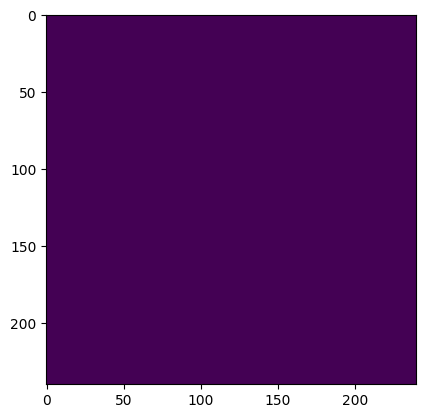

Slice no:  62


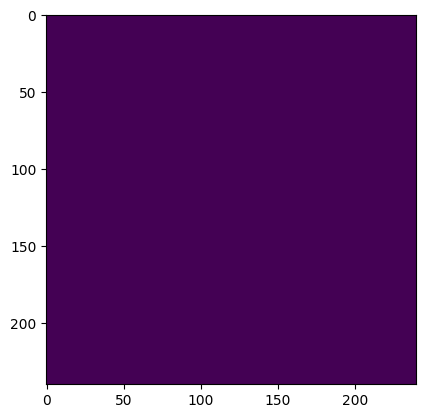

Slice no:  63


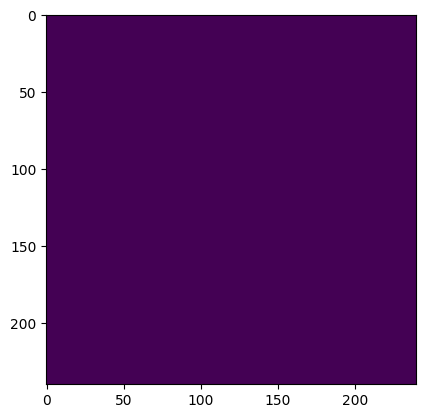

Slice no:  64


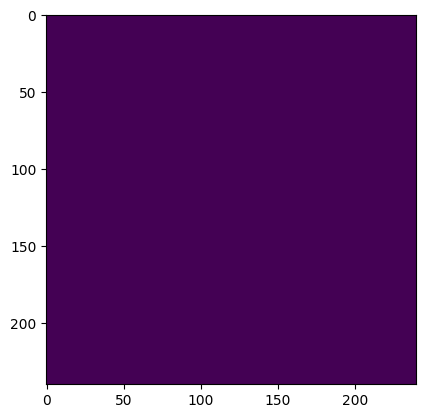

Slice no:  65


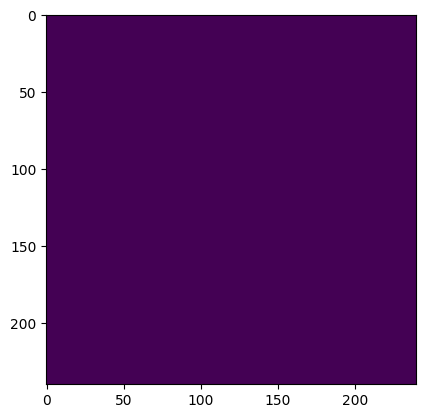

Slice no:  66


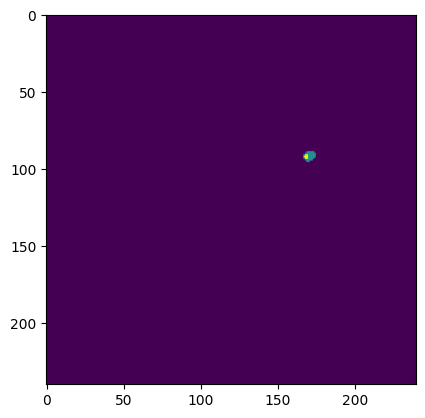

Slice no:  67


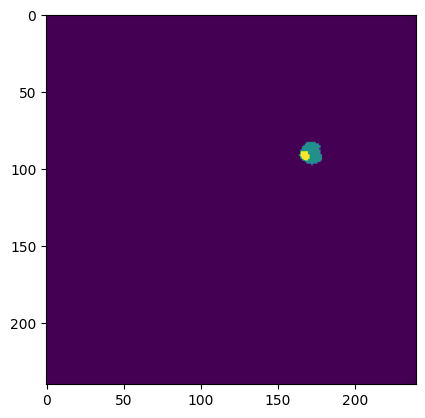

Slice no:  68


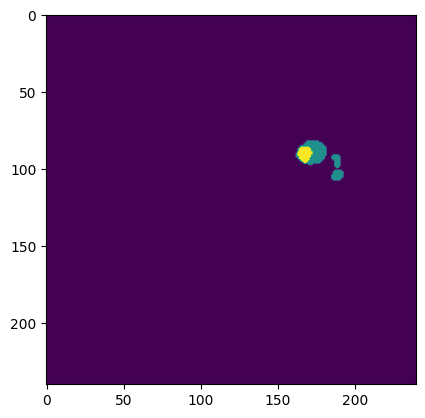

Slice no:  69


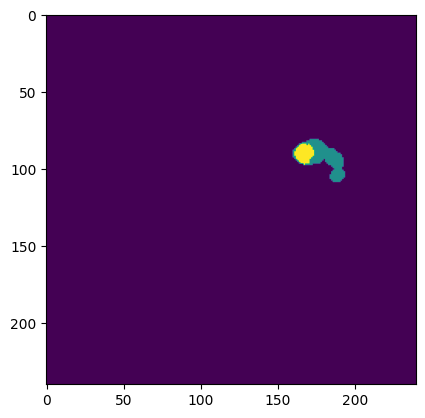

Slice no:  70


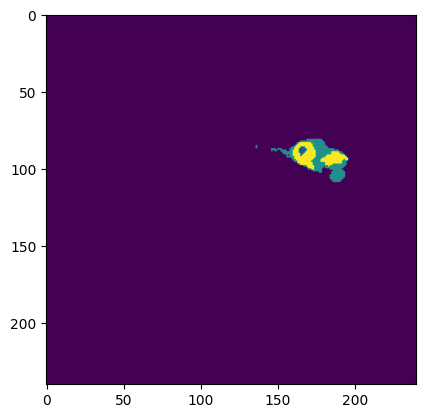

Slice no:  71


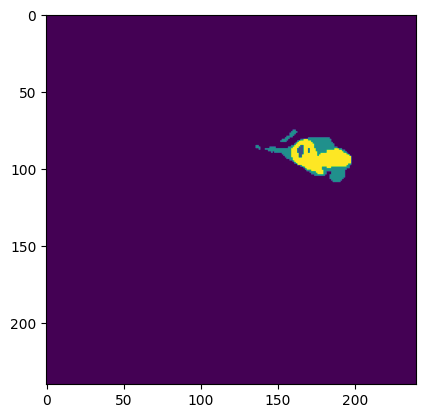

Slice no:  72


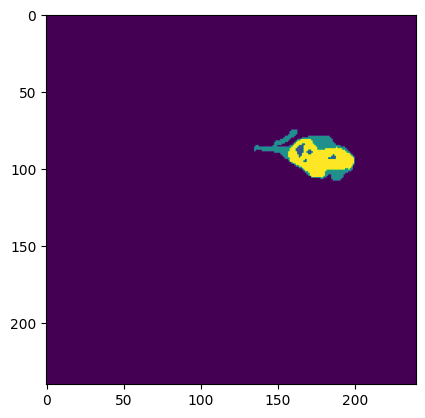

Slice no:  73


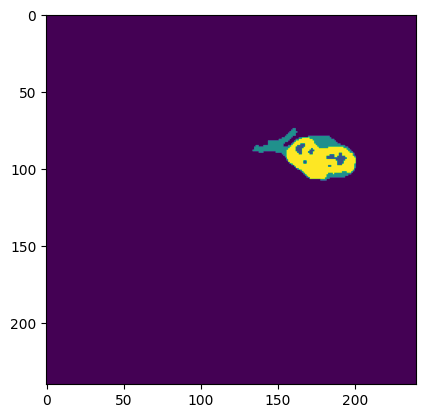

Slice no:  74


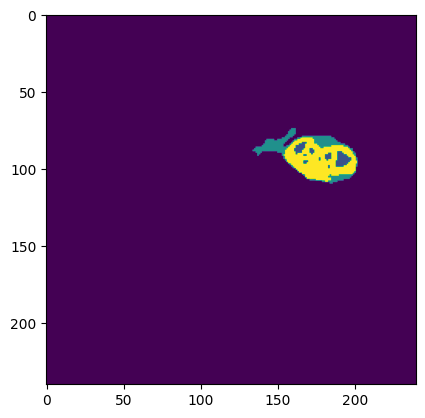

Slice no:  75


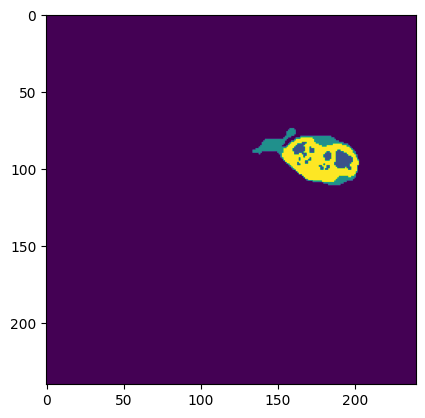

Slice no:  76


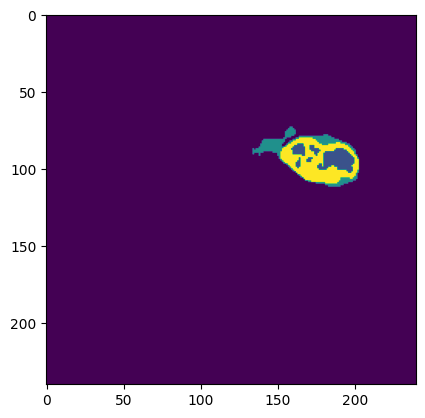

Slice no:  77


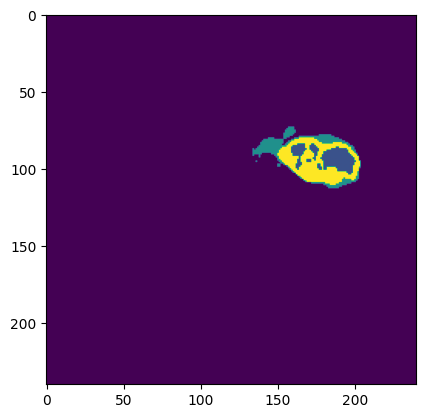

Slice no:  78


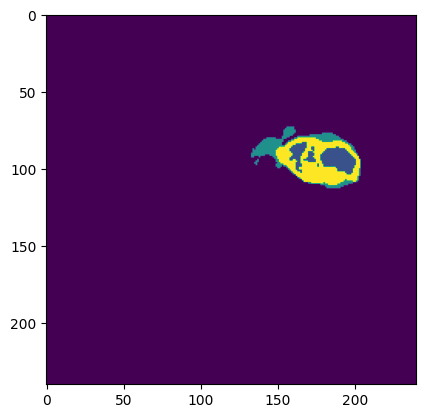

Slice no:  79


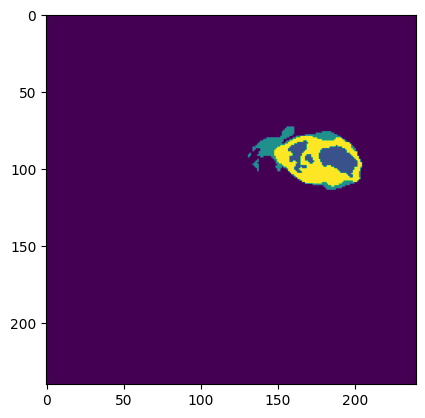

Slice no:  80


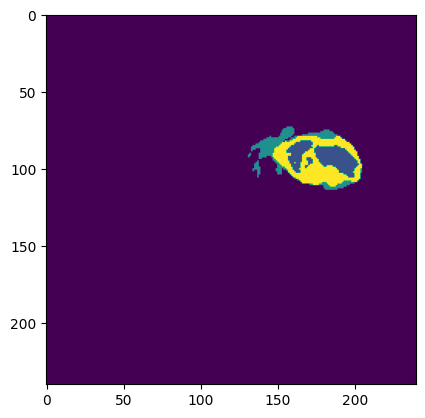

Slice no:  81


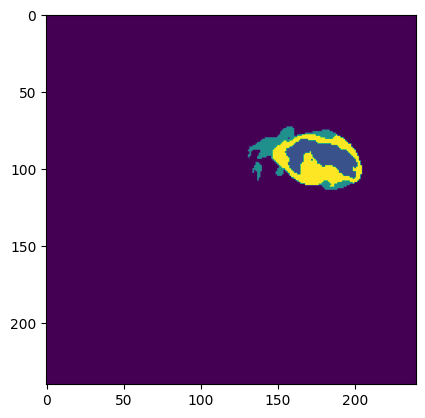

Slice no:  82


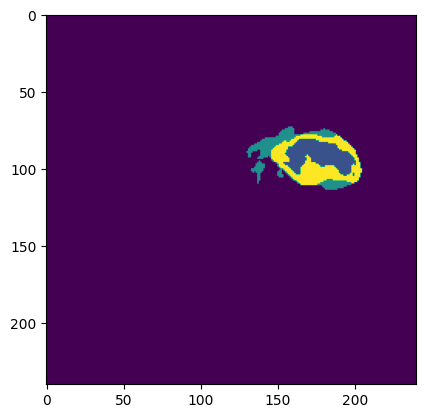

Slice no:  83


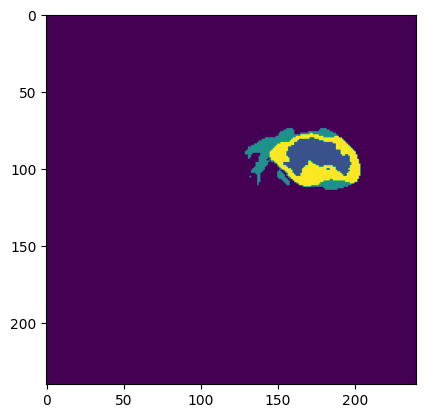

Slice no:  84


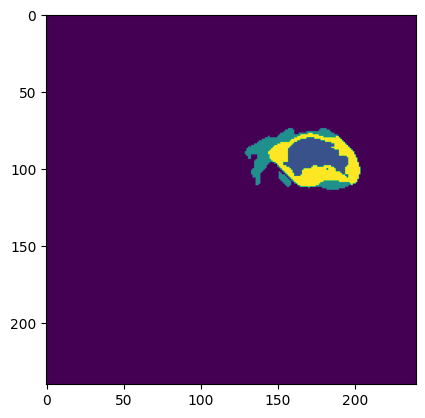

Slice no:  85


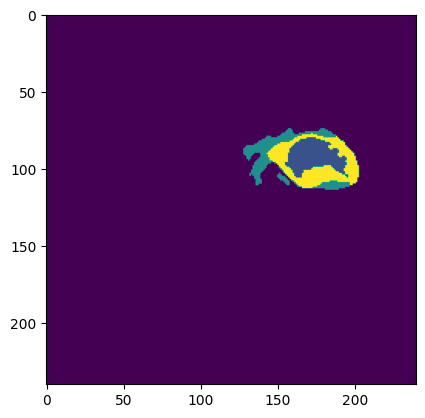

Slice no:  86


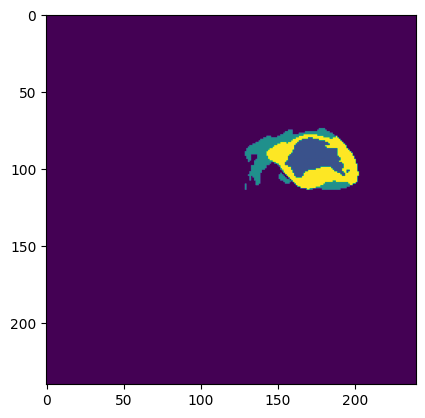

Slice no:  87


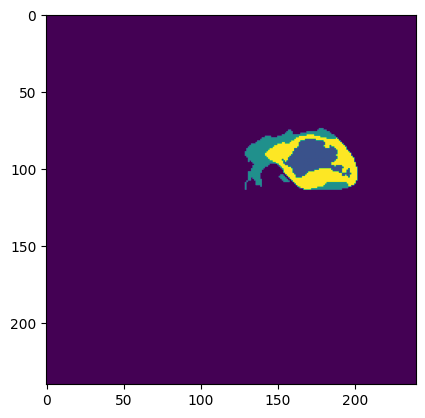

Slice no:  88


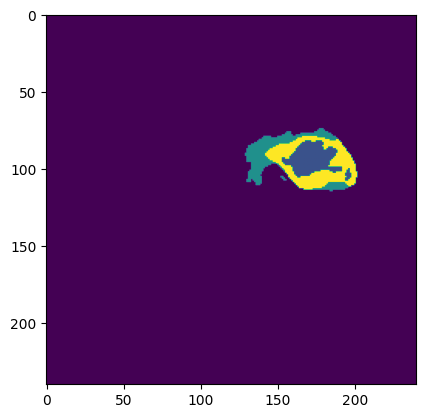

Slice no:  89


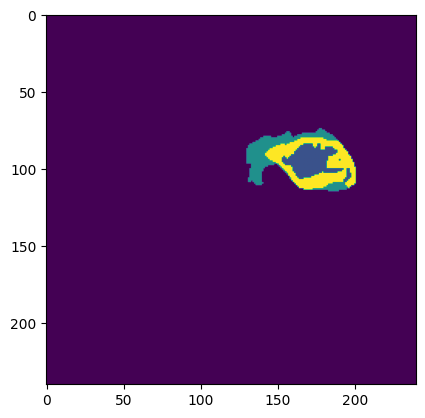

Slice no:  90


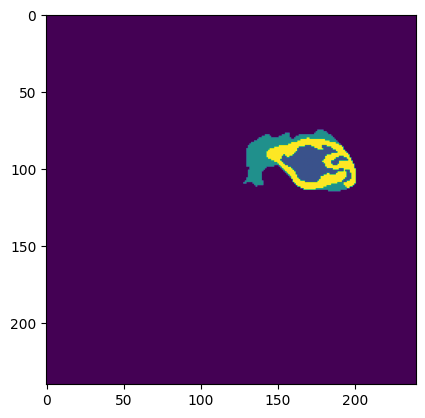

Slice no:  91


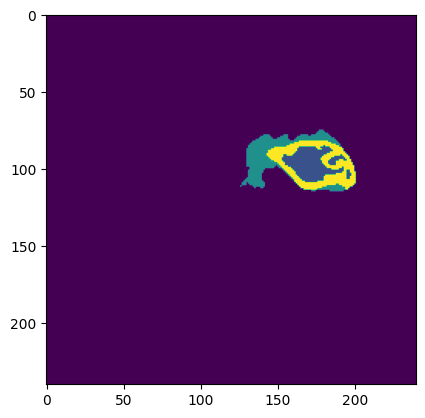

Slice no:  92


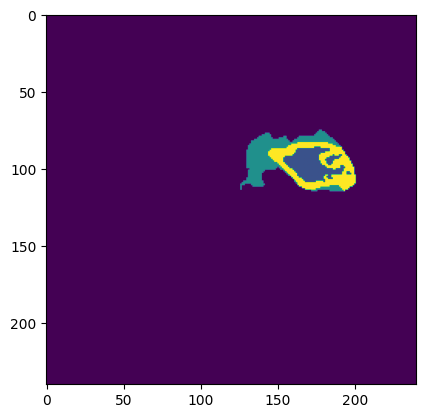

Slice no:  93


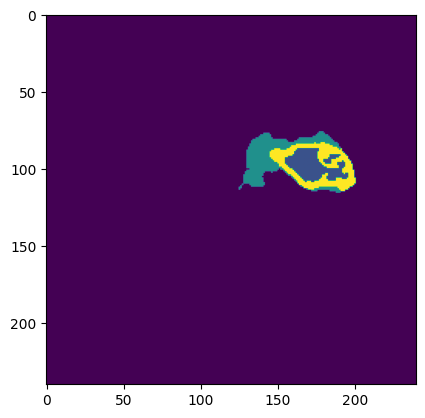

Slice no:  94


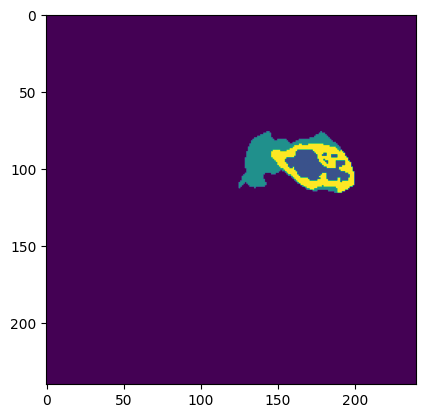

Slice no:  95


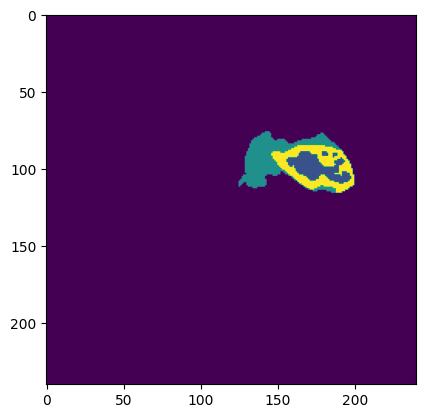

Slice no:  96


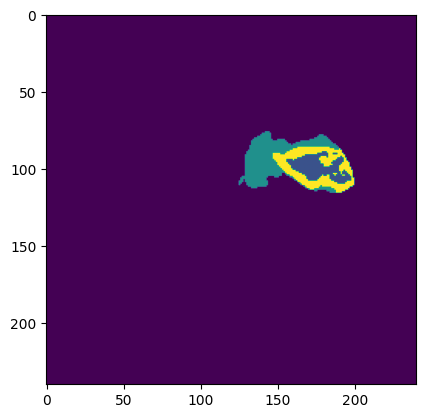

Slice no:  97


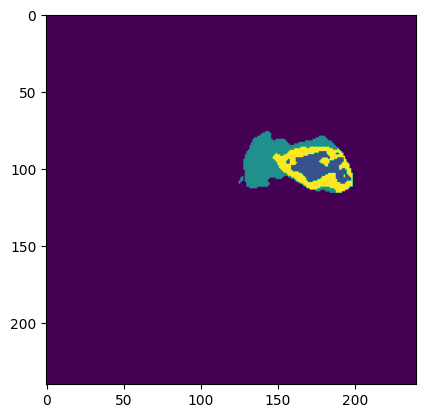

Slice no:  98


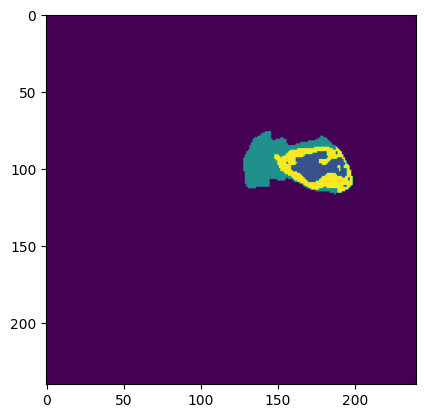

Slice no:  99


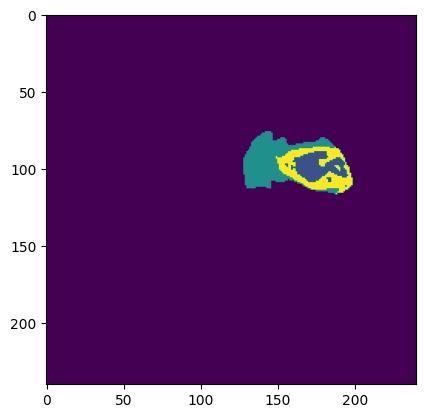

Slice no:  100


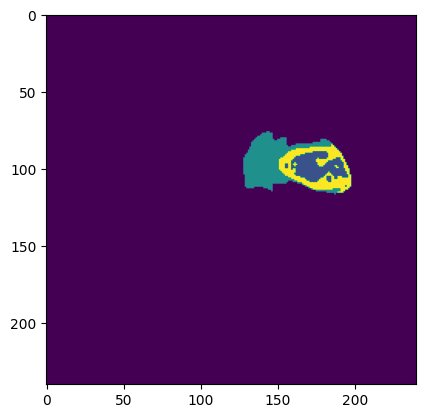

Slice no:  101


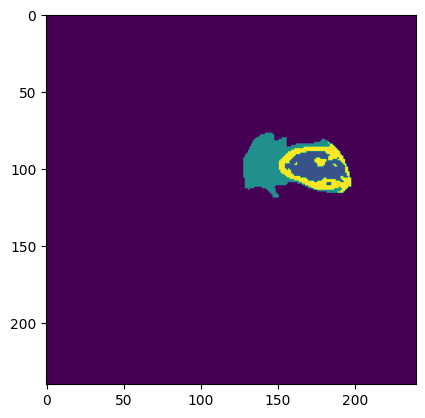

Slice no:  102


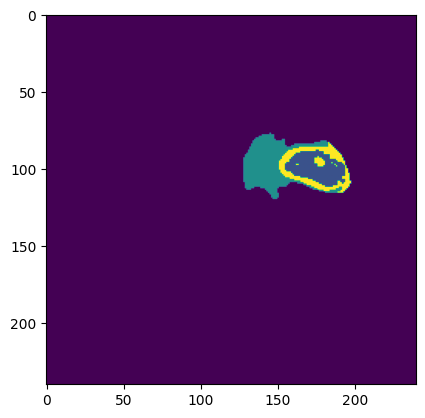

Slice no:  103


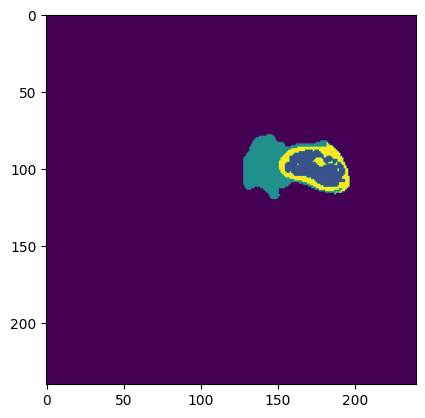

Slice no:  104


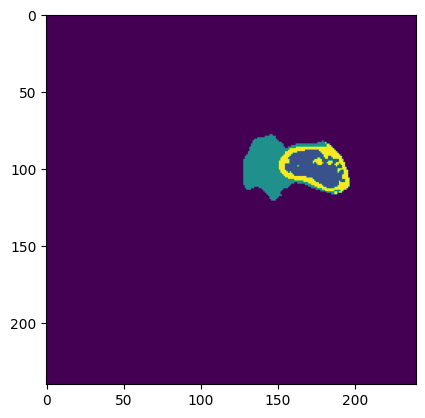

Slice no:  105


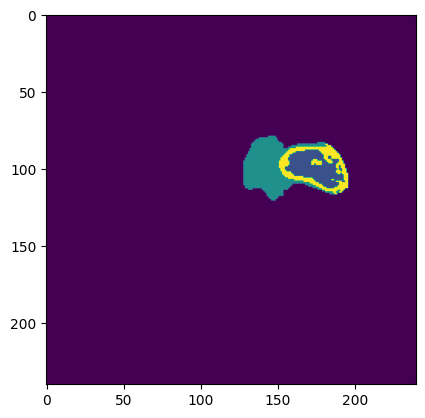

Slice no:  106


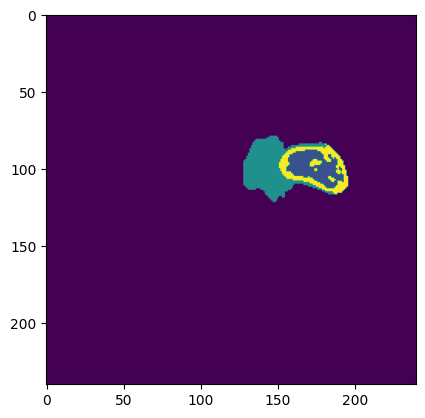

Slice no:  107


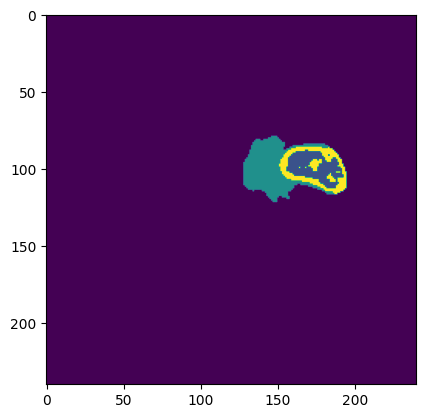

Slice no:  108


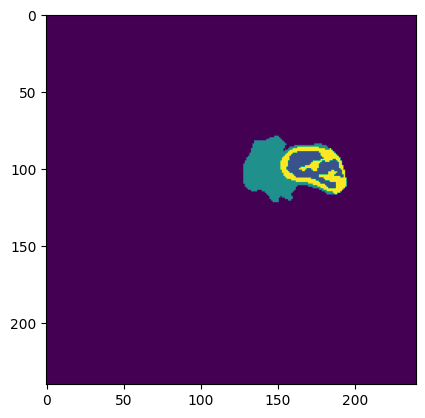

Slice no:  109


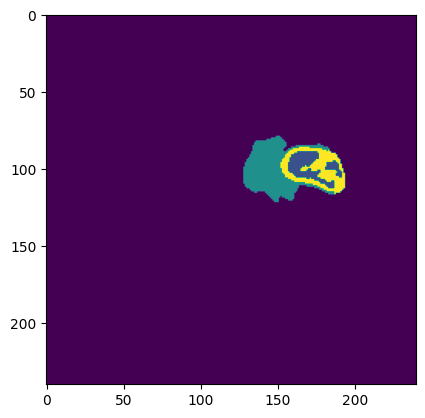

Slice no:  110


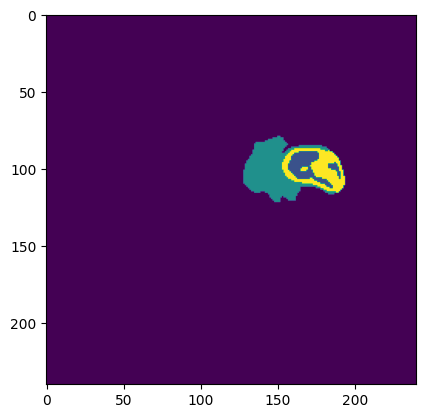

Slice no:  111


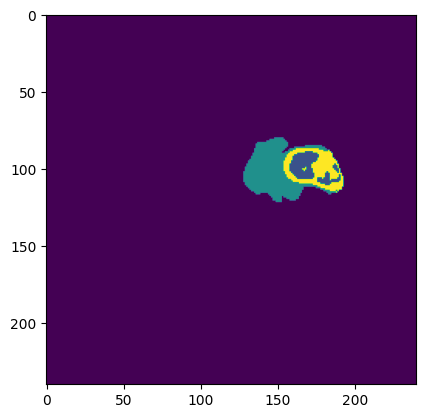

Slice no:  112


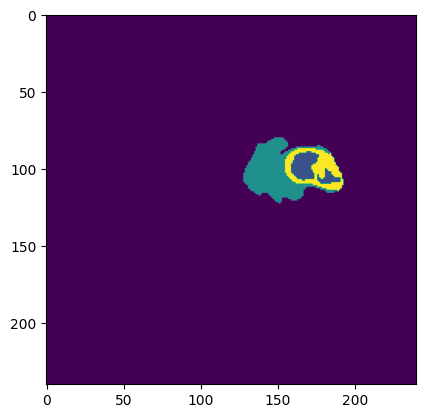

Slice no:  113


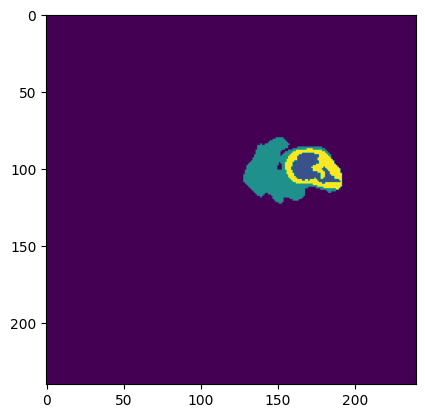

Slice no:  114


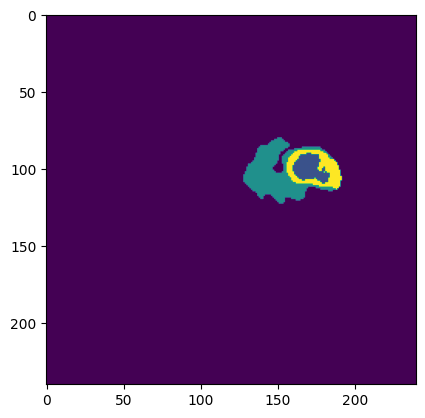

Slice no:  115


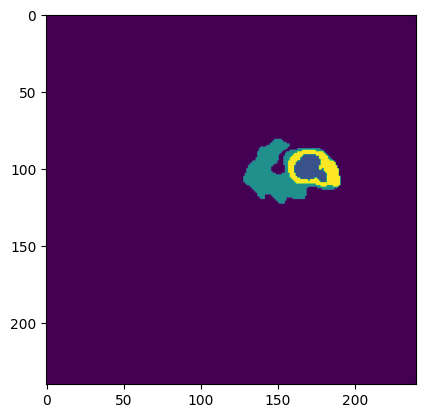

Slice no:  116


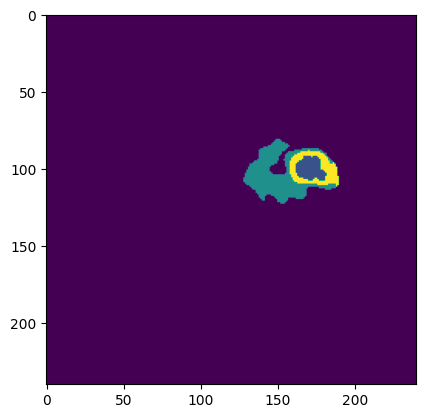

Slice no:  117


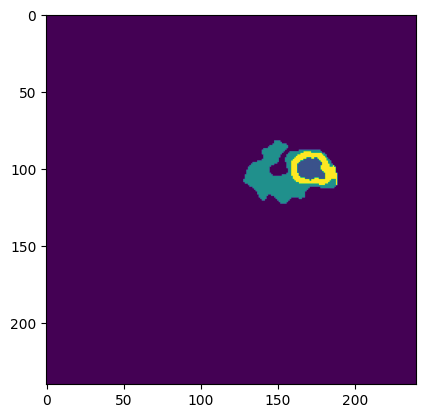

Slice no:  118


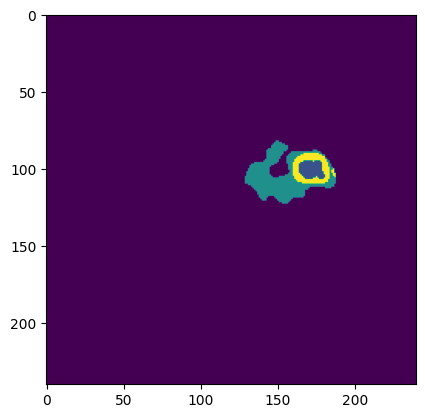

Slice no:  119


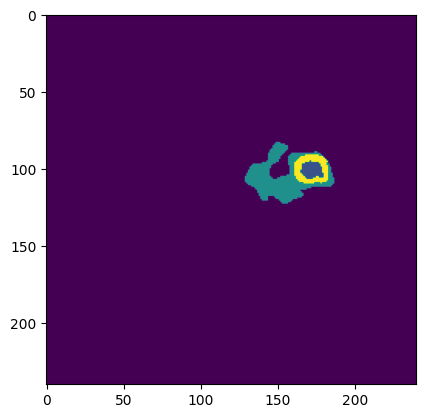

Slice no:  120


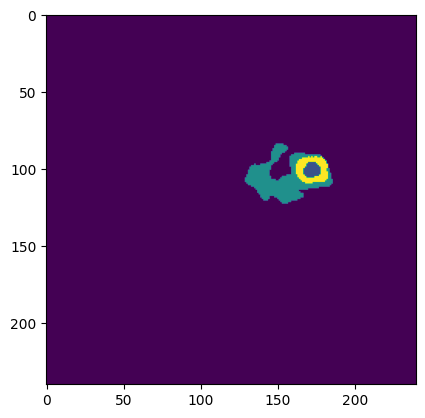

Slice no:  121


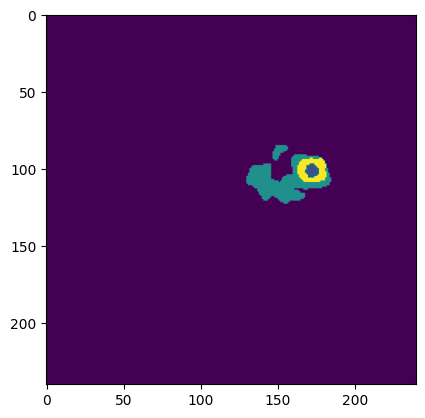

Slice no:  122


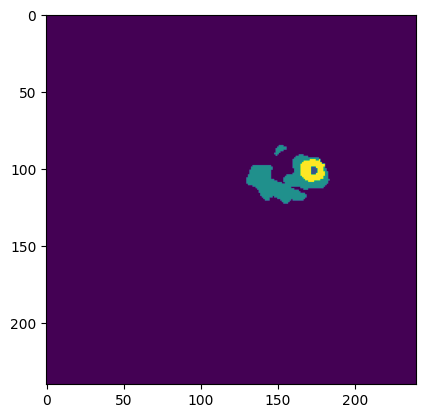

Slice no:  123


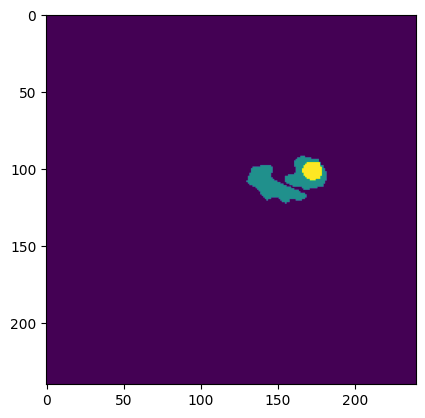

Slice no:  124


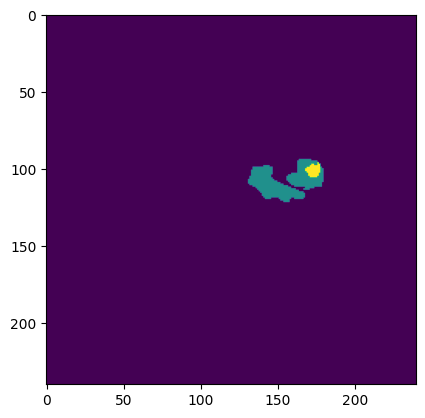

Slice no:  125


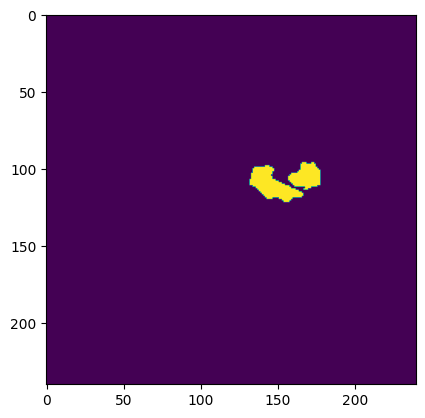

Slice no:  126


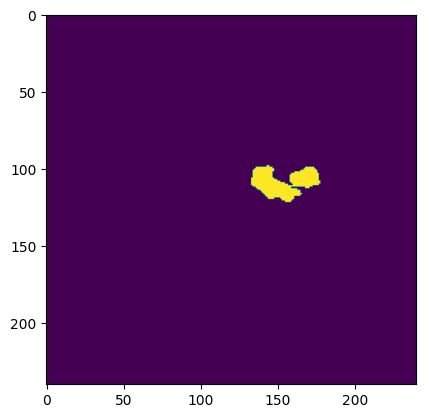

Slice no:  127


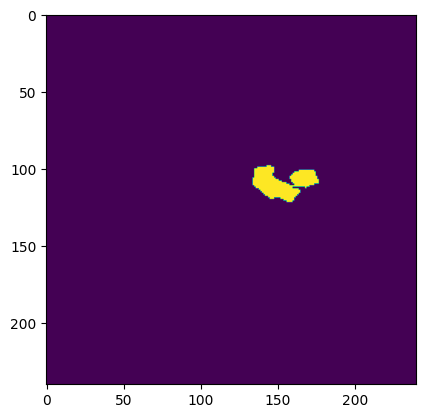

Slice no:  128


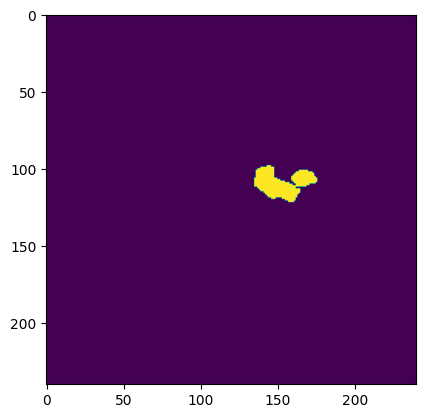

Slice no:  129


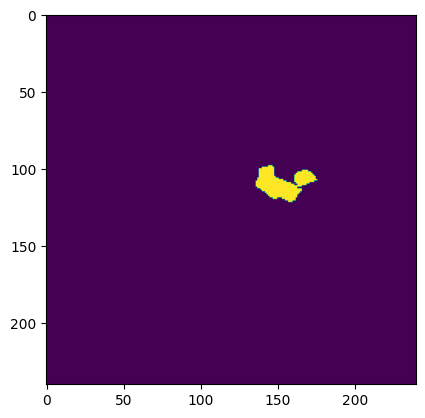

Slice no:  130


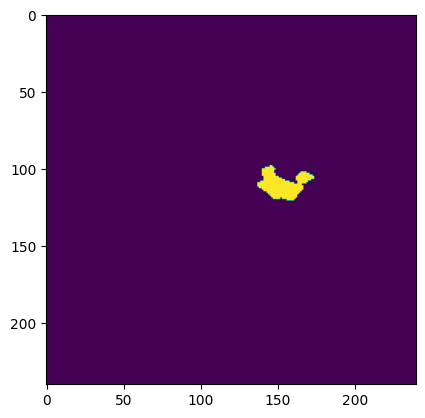

Slice no:  131


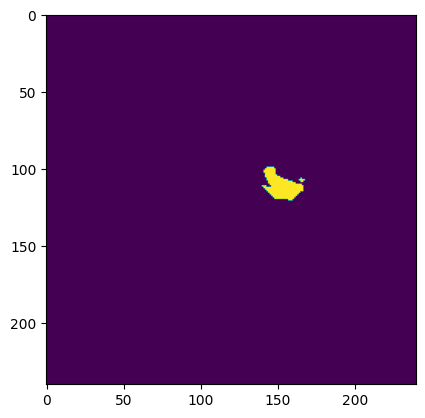

Slice no:  132


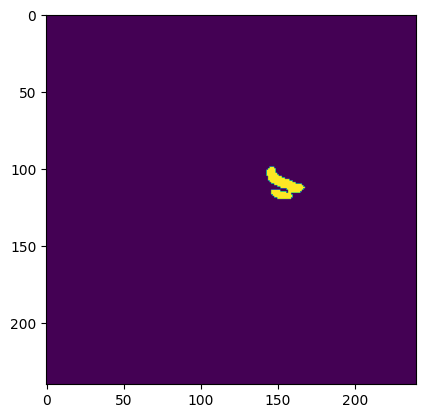

Slice no:  133


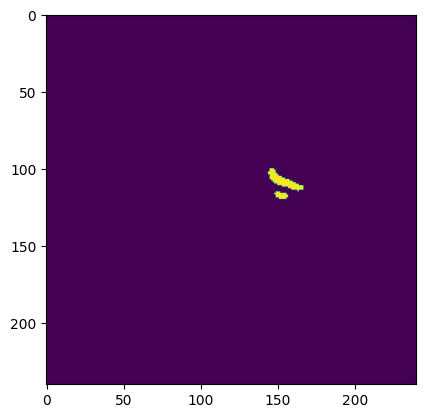

Slice no:  134


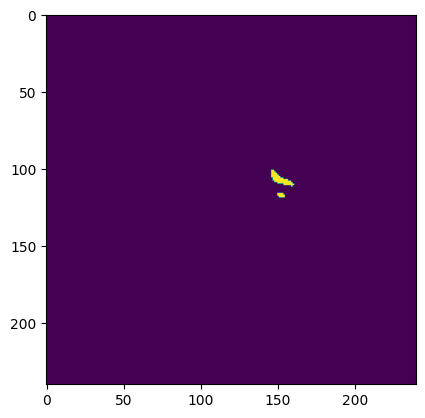

Slice no:  135


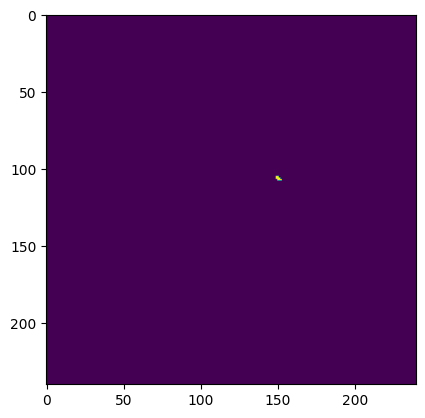

Slice no:  136


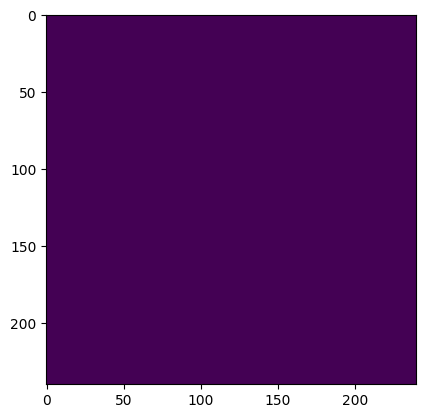

Slice no:  137


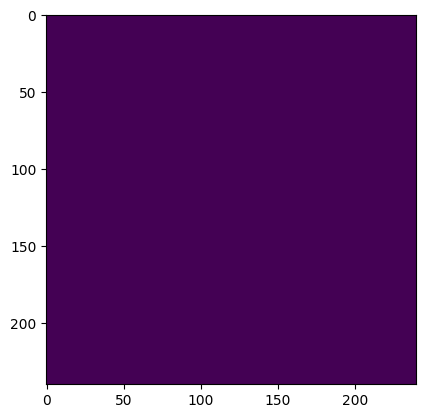

Slice no:  138


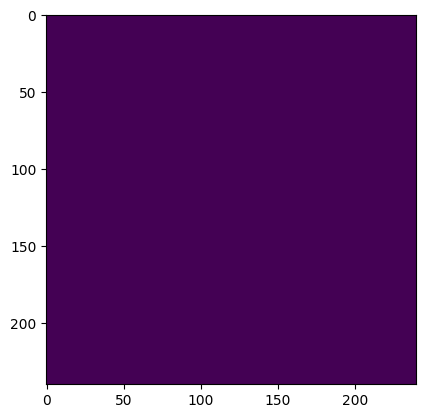

Slice no:  139


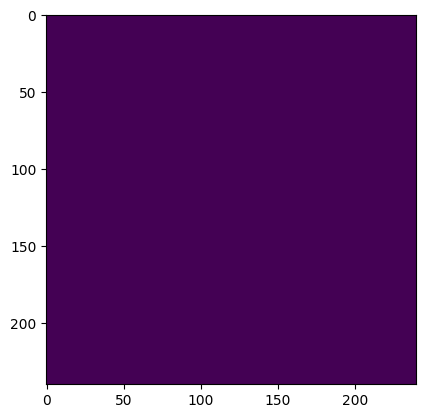

Slice no:  140


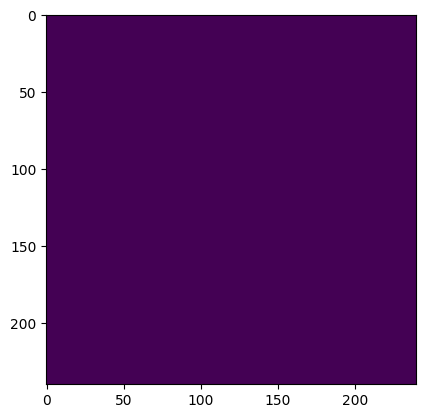

Slice no:  141


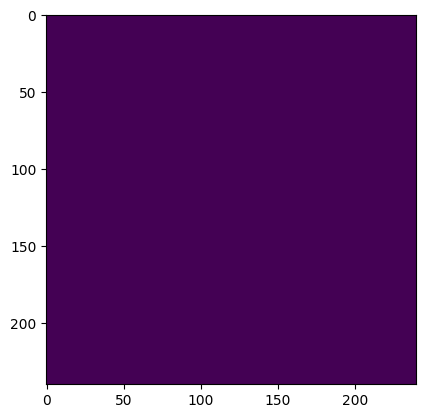

Slice no:  142


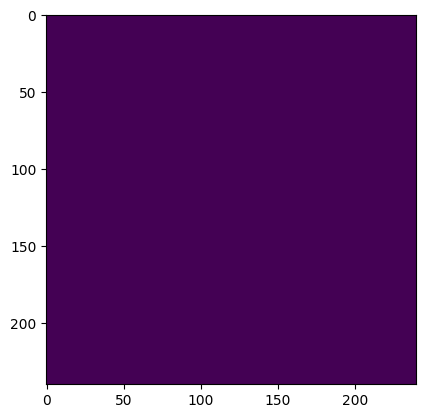

Slice no:  143


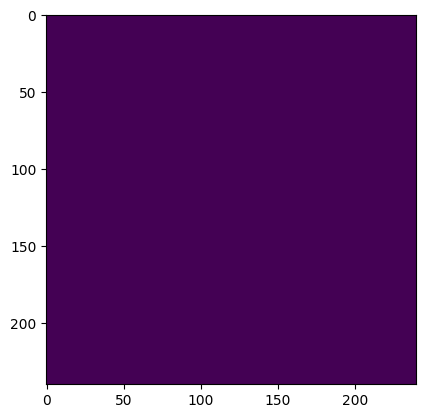

Slice no:  144


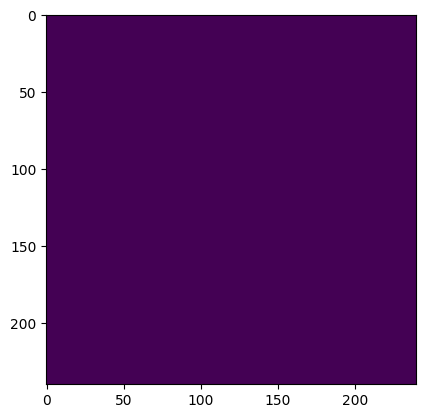

Slice no:  145


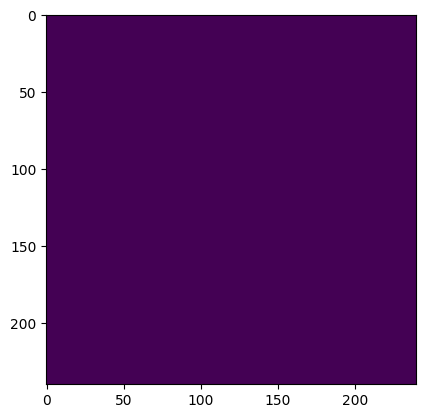

Slice no:  146


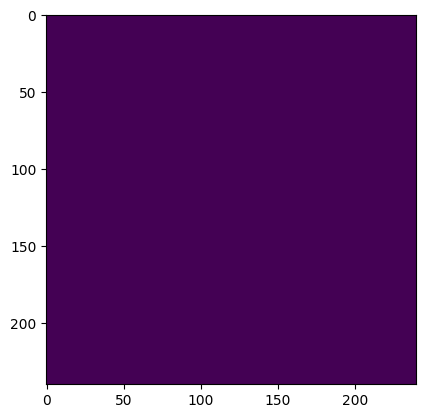

Slice no:  147


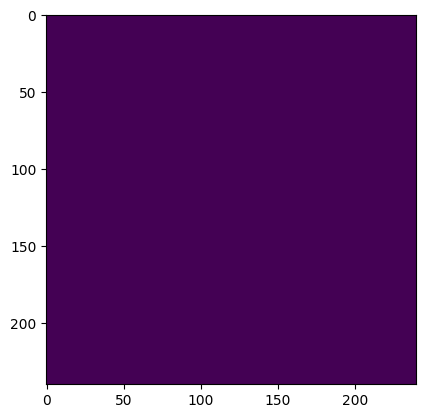

Slice no:  148


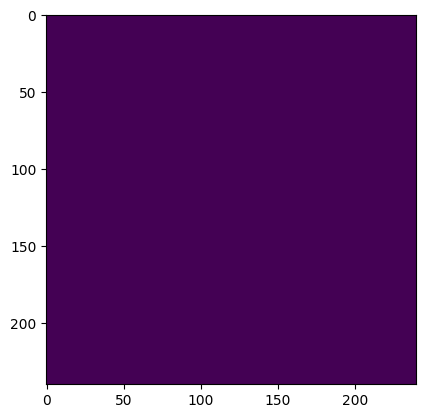

Slice no:  149


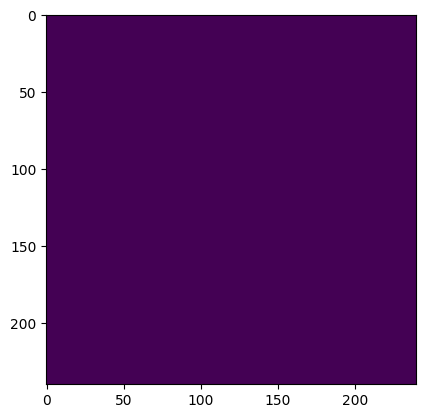

Slice no:  150


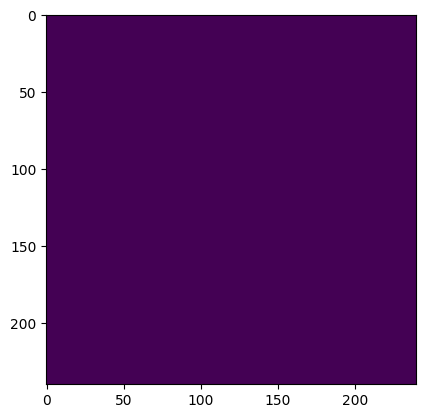

Slice no:  151


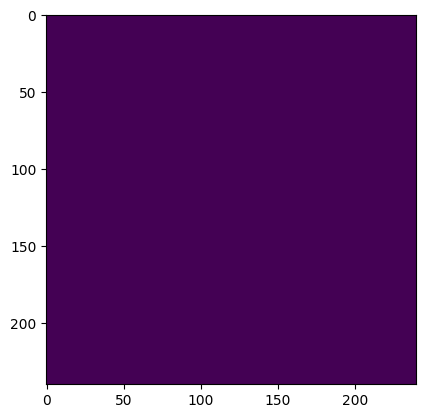

Slice no:  152


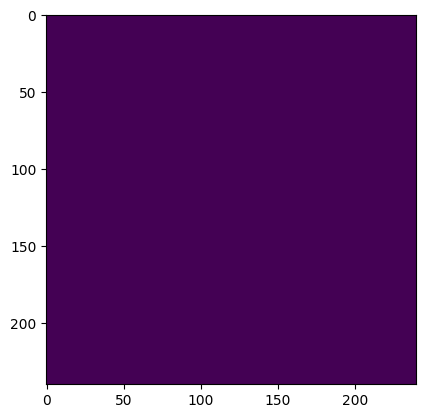

Slice no:  153


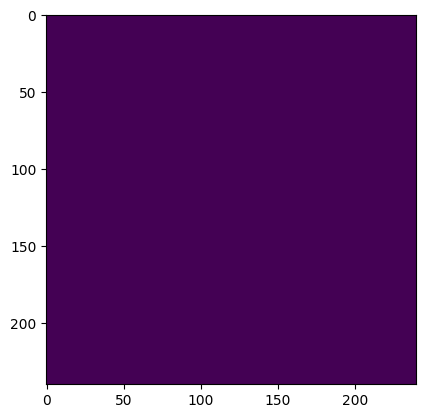

Slice no:  154


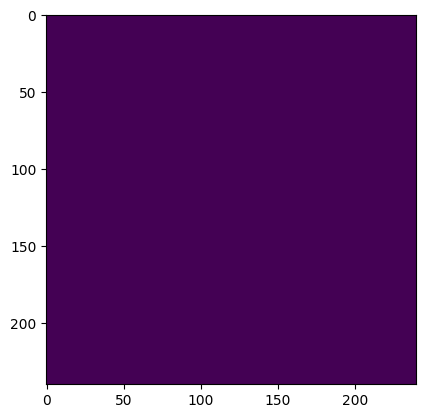

In [2]:
path='BraTS2021_00495_seg.nii.gz'
img=nib.load(path)
nii_data = img.get_fdata()
nii_aff  = img.affine
nii_hdr  = img.header

print(nii_data.shape)

if(len(nii_data.shape)==3):
   for slice_Number in range(nii_data.shape[2]):
       print('Slice no: ',slice_Number)
       plt.imshow(nii_data[:,:,slice_Number ])
       plt.show()
if(len(nii_data.shape)==4):
   for frame in range(nii_data.shape[3]):
       for slice_Number in range(nii_data.shape[2]):
           plt.imshow(nii_data[:,:,slice_Number,frame])
           plt.show()

In [3]:
nii_data= nii_data[:, :, 65:-25]

Slice no:  0


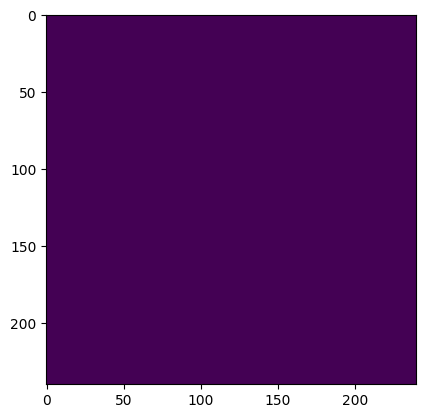

Slice no:  1


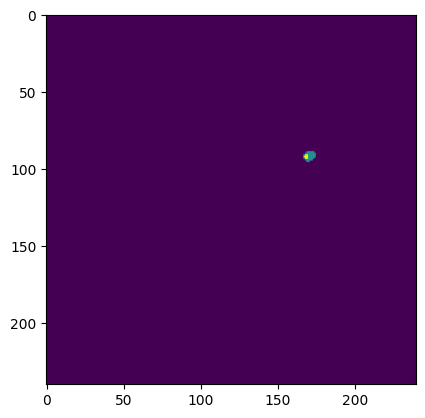

Slice no:  2


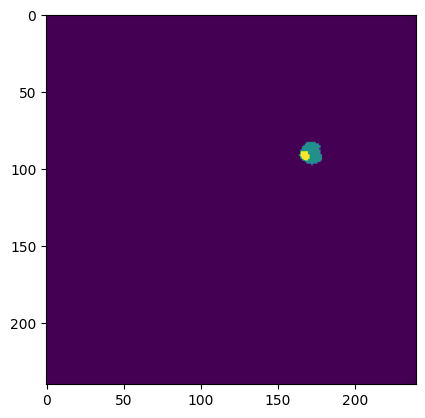

Slice no:  3


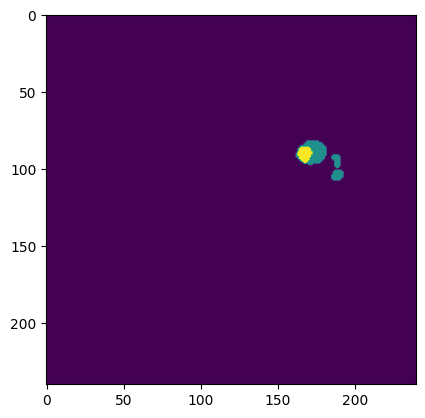

Slice no:  4


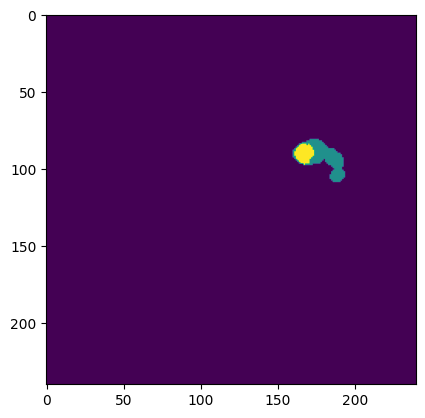

Slice no:  5


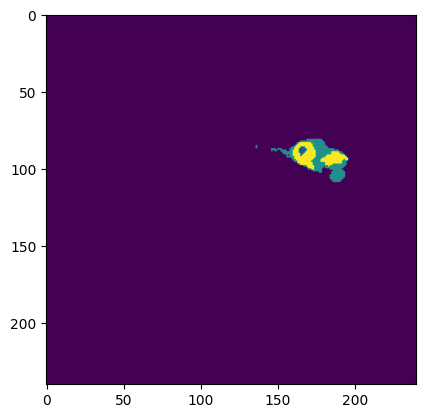

Slice no:  6


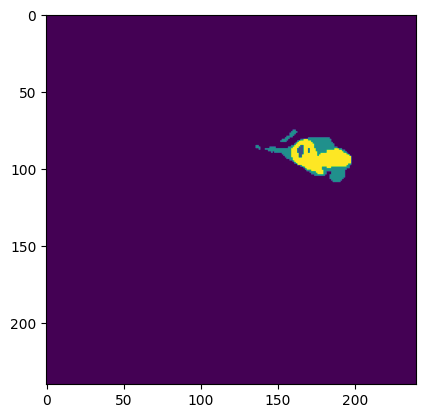

Slice no:  7


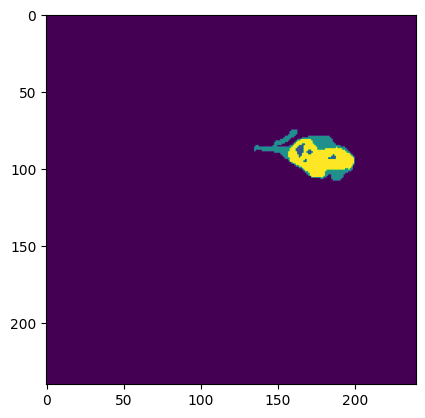

Slice no:  8


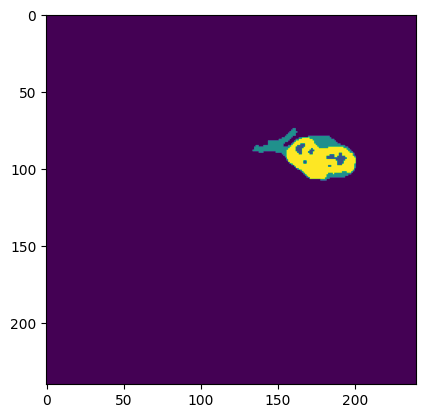

Slice no:  9


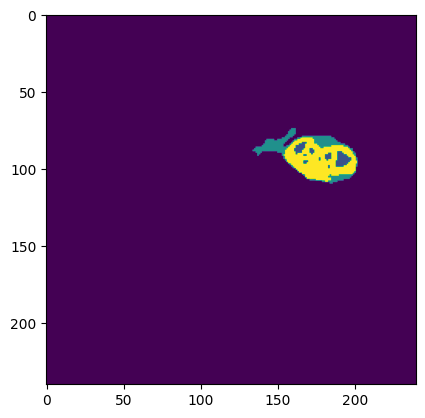

Slice no:  10


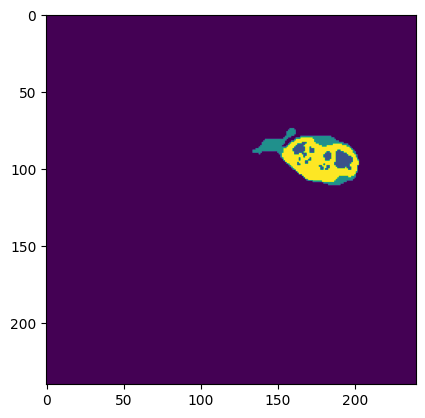

Slice no:  11


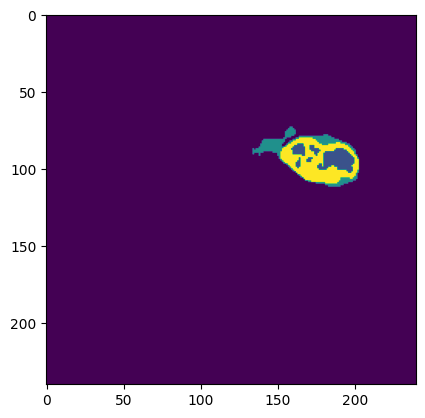

Slice no:  12


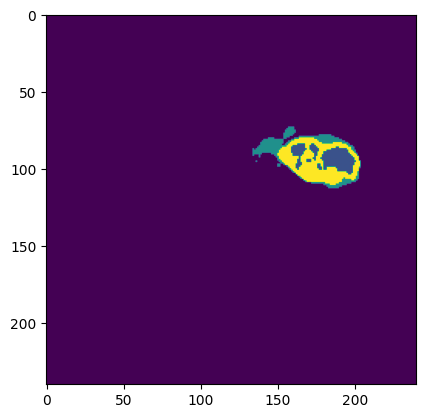

Slice no:  13


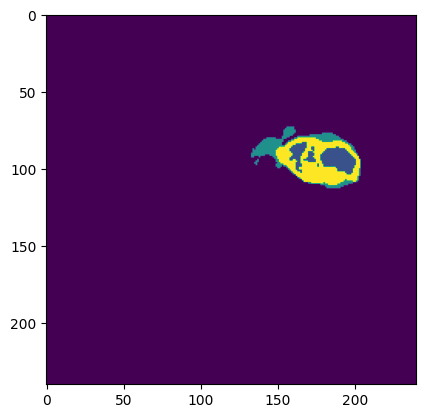

Slice no:  14


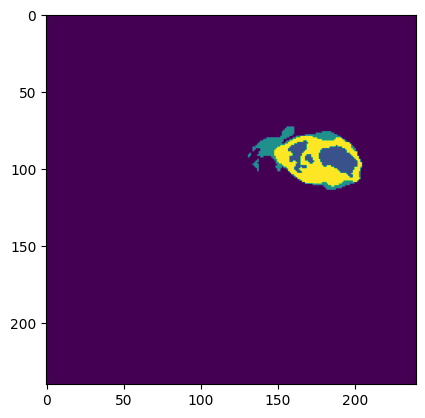

Slice no:  15


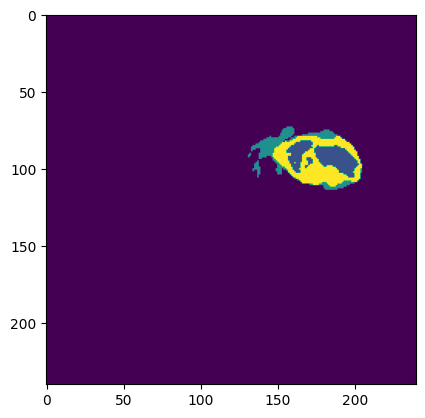

Slice no:  16


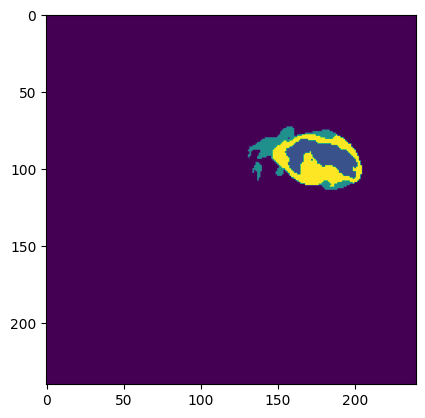

Slice no:  17


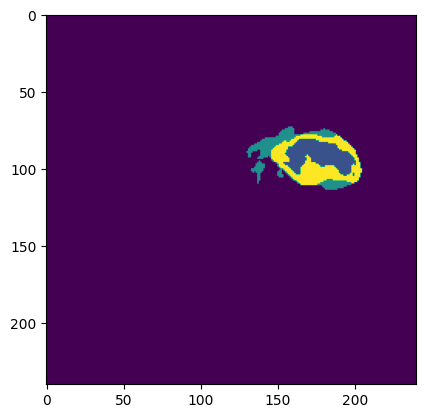

Slice no:  18


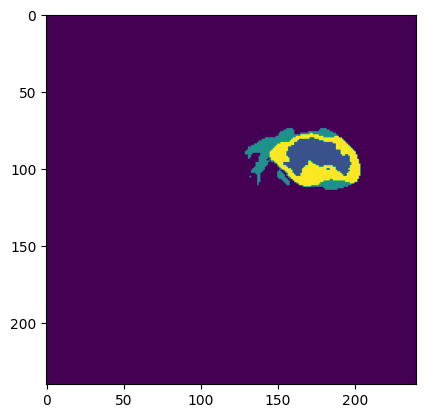

Slice no:  19


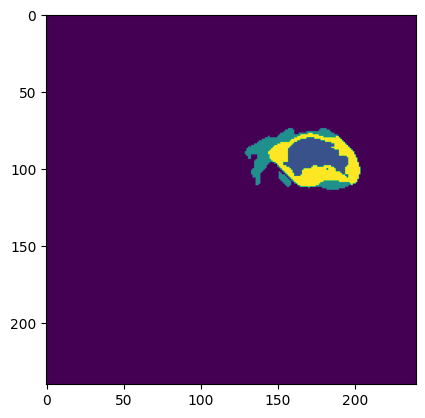

Slice no:  20


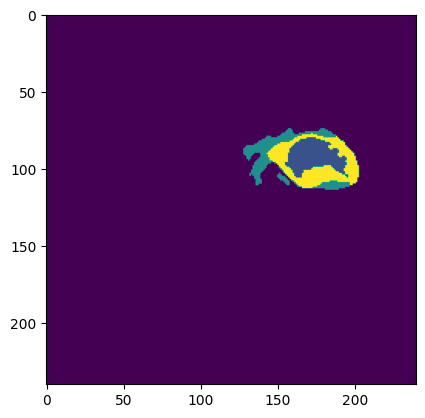

Slice no:  21


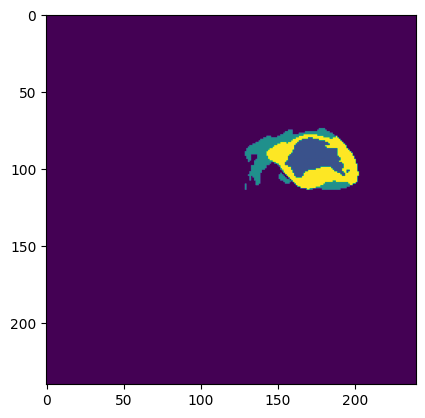

Slice no:  22


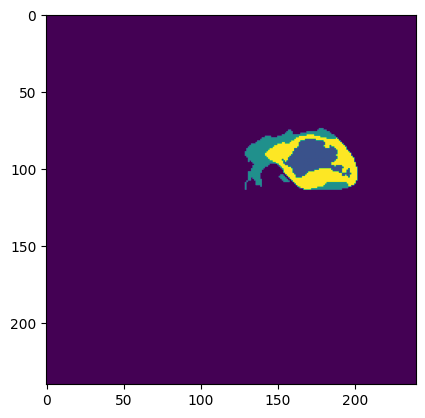

Slice no:  23


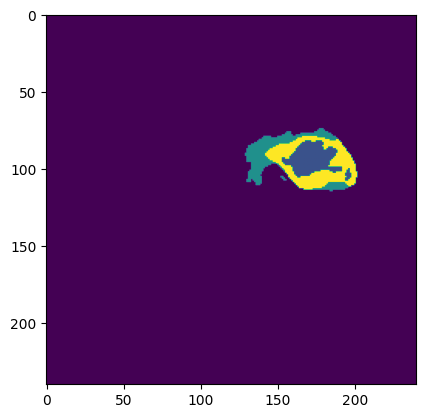

Slice no:  24


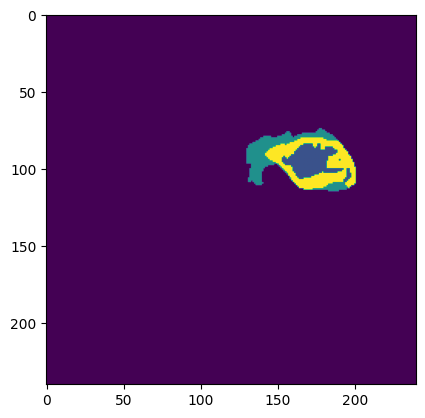

Slice no:  25


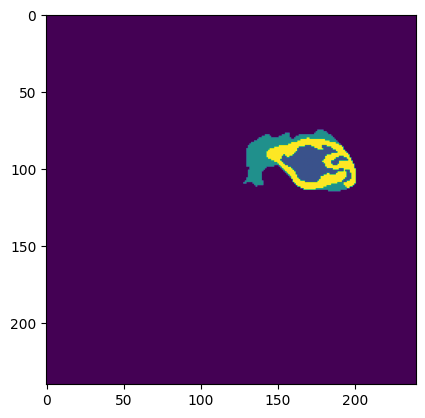

Slice no:  26


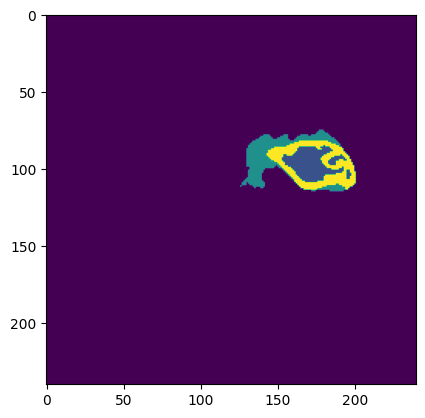

Slice no:  27


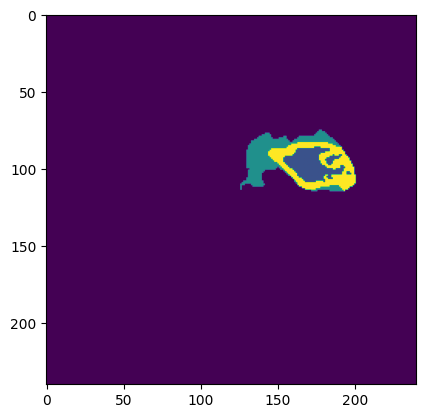

Slice no:  28


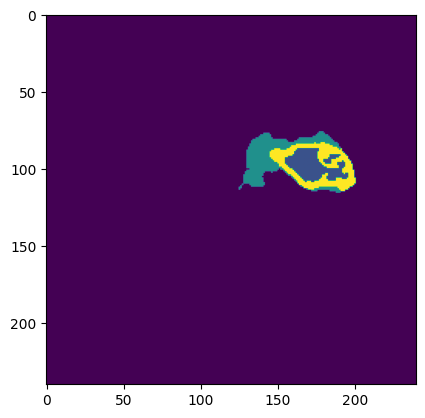

Slice no:  29


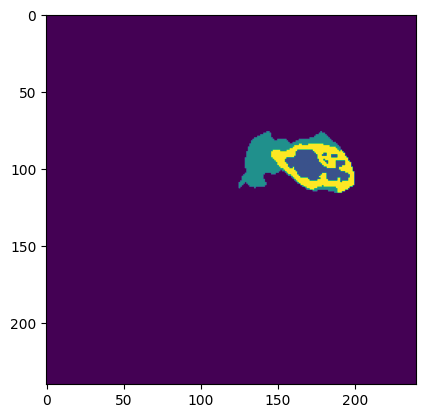

Slice no:  30


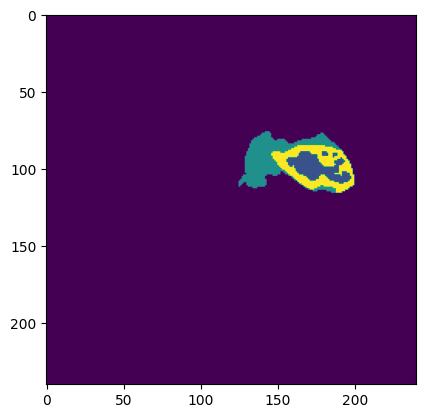

Slice no:  31


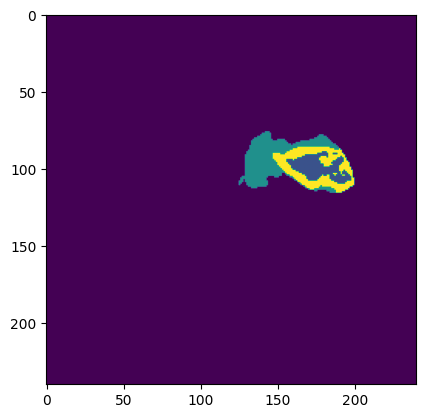

Slice no:  32


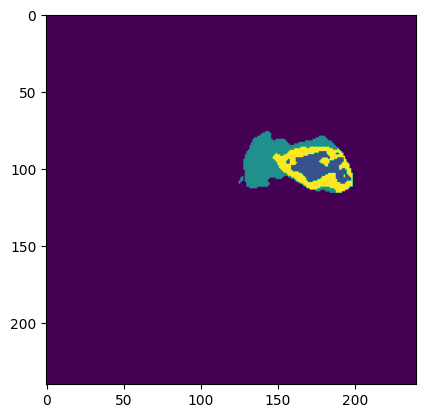

Slice no:  33


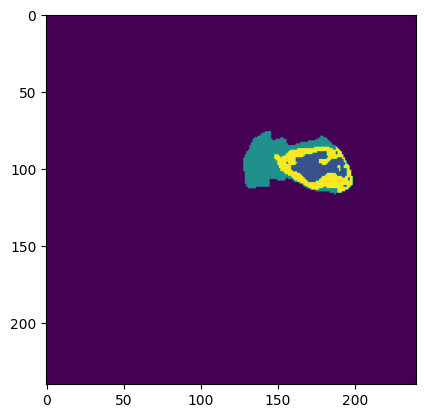

Slice no:  34


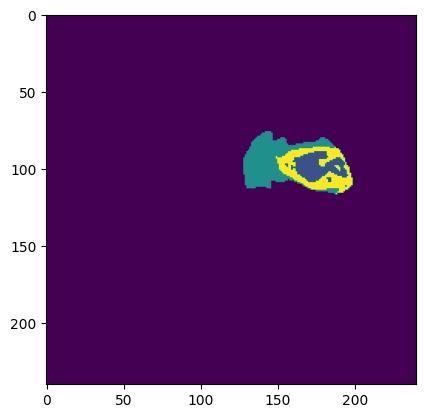

Slice no:  35


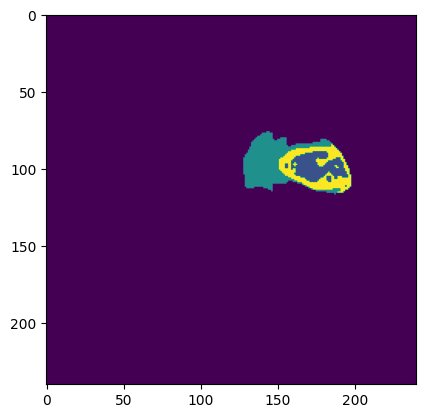

Slice no:  36


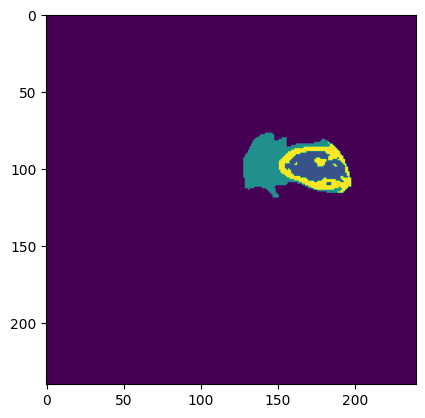

Slice no:  37


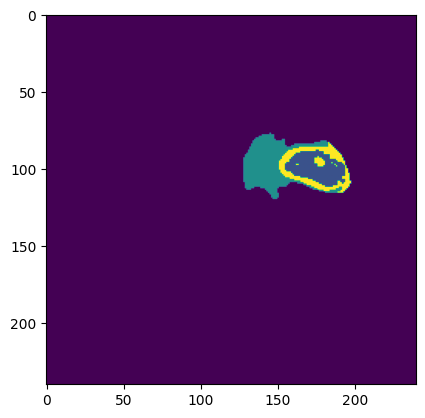

Slice no:  38


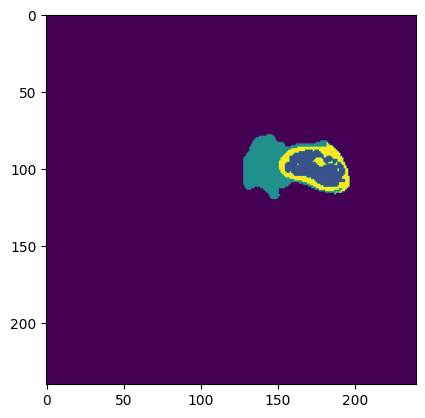

Slice no:  39


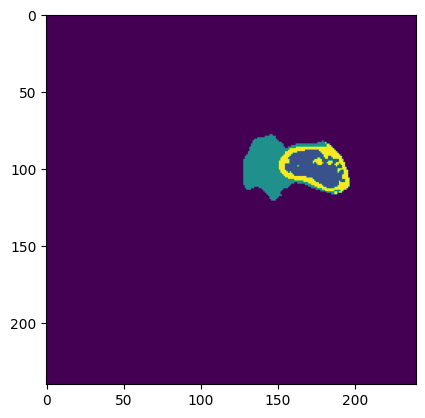

Slice no:  40


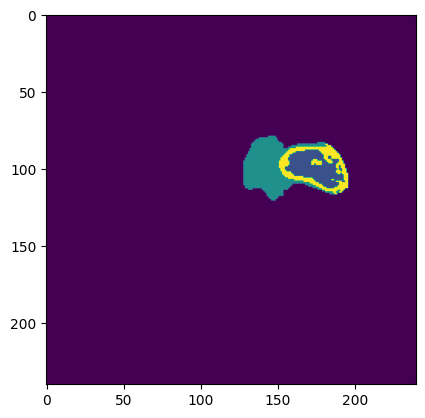

Slice no:  41


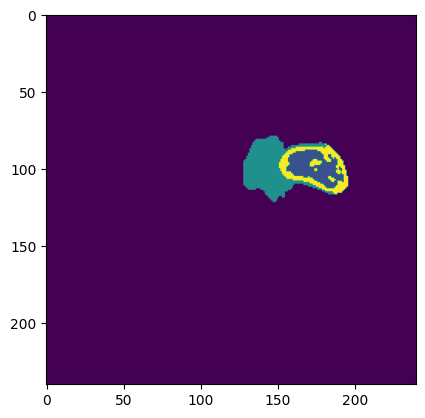

Slice no:  42


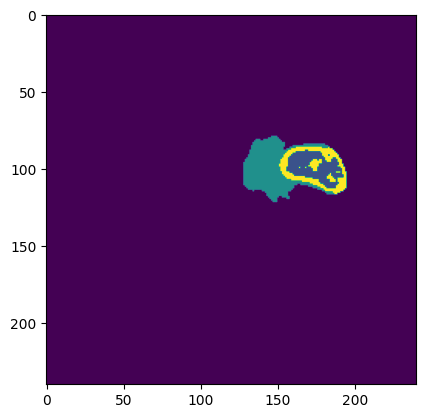

Slice no:  43


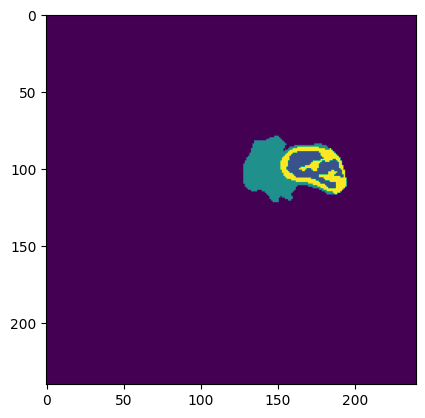

Slice no:  44


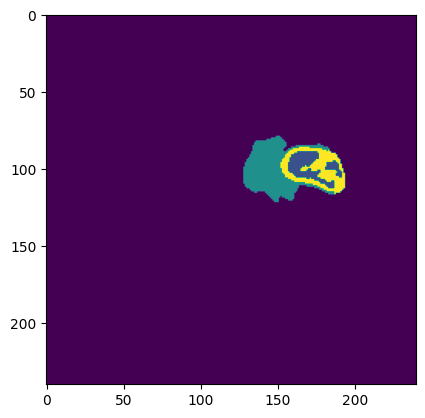

Slice no:  45


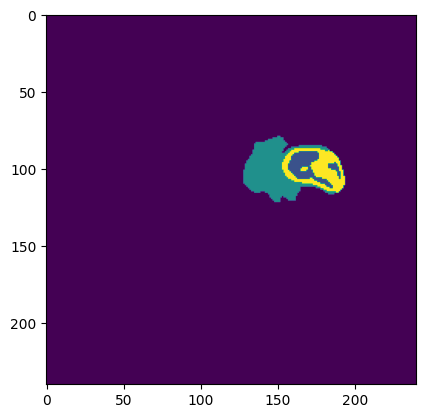

Slice no:  46


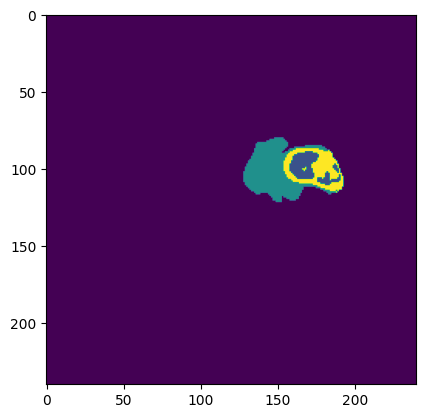

Slice no:  47


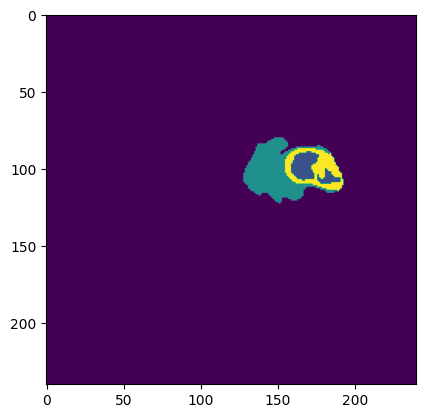

Slice no:  48


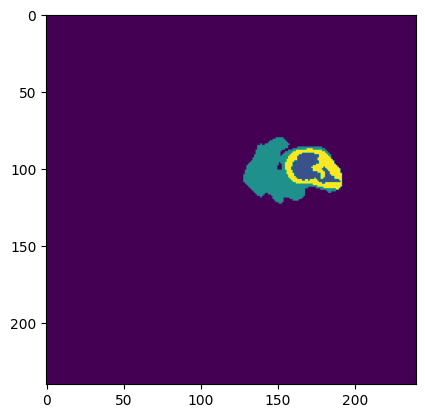

Slice no:  49


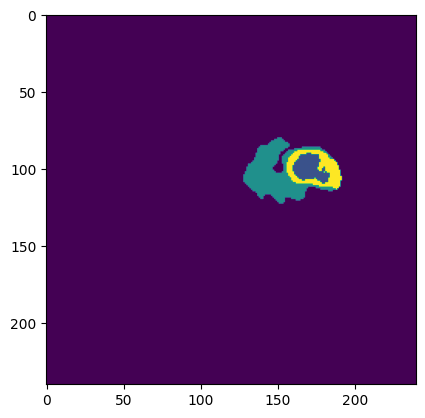

Slice no:  50


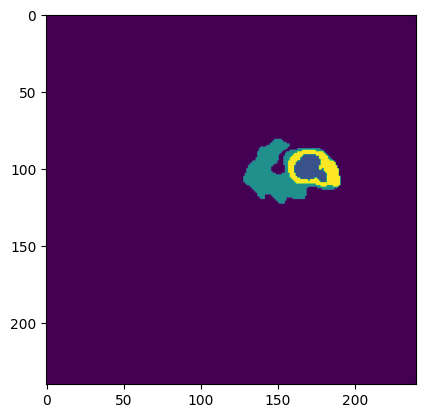

Slice no:  51


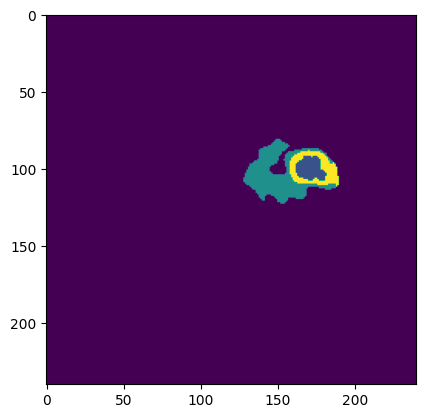

Slice no:  52


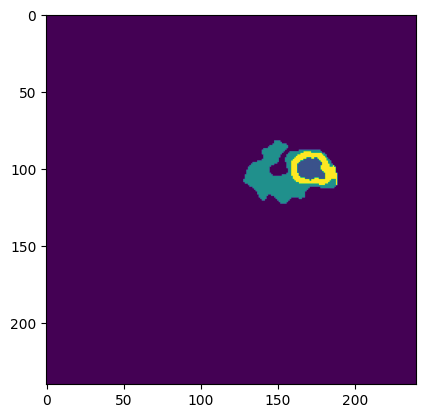

Slice no:  53


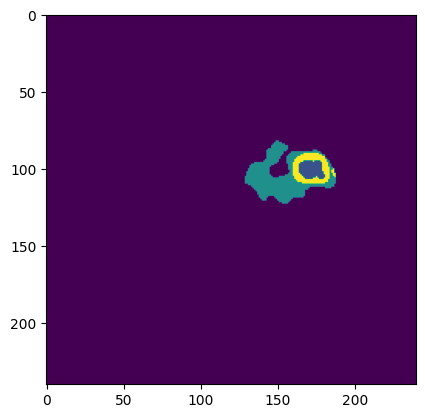

Slice no:  54


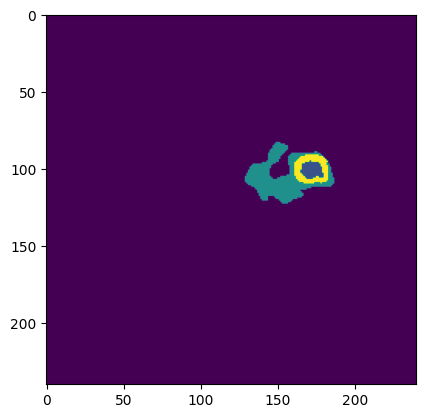

Slice no:  55


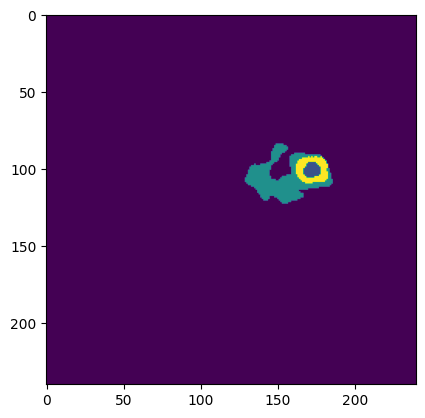

Slice no:  56


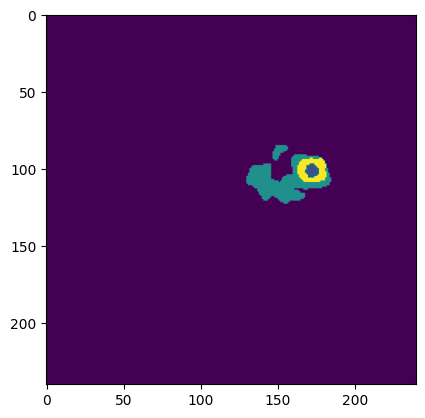

Slice no:  57


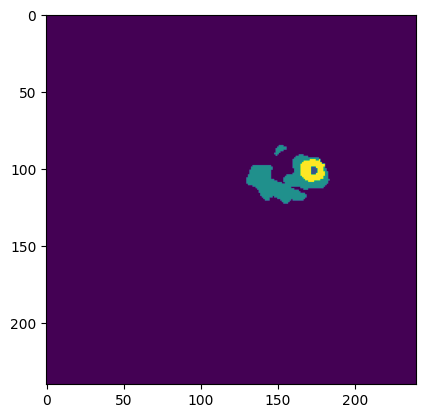

Slice no:  58


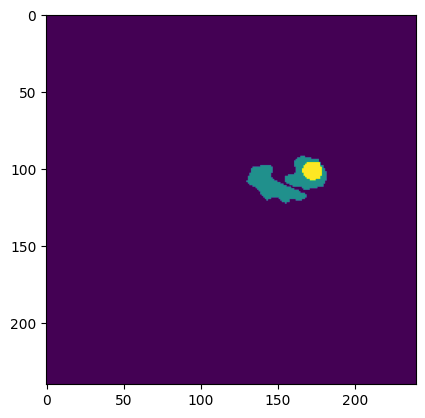

Slice no:  59


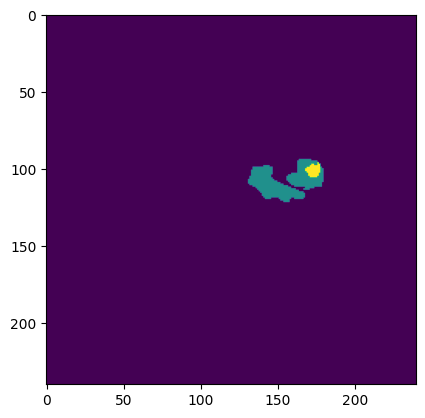

Slice no:  60


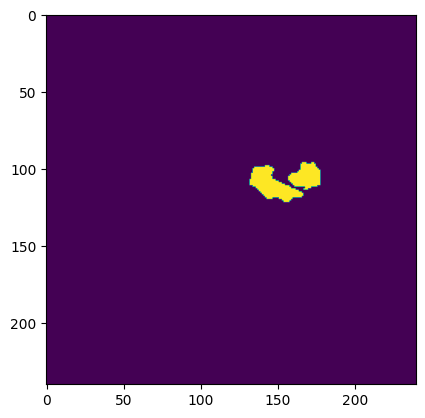

Slice no:  61


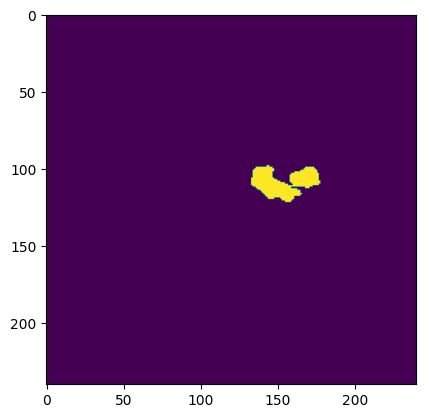

Slice no:  62


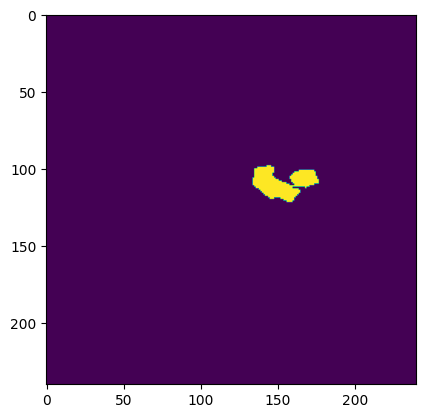

Slice no:  63


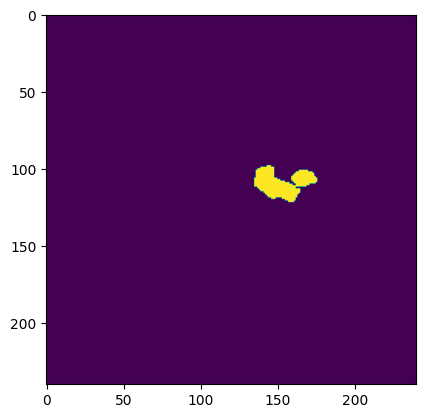

Slice no:  64


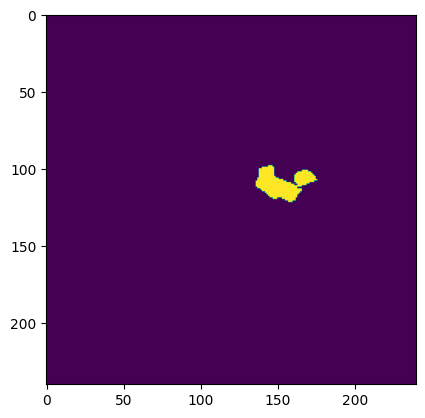

In [4]:
if(len(nii_data.shape)==3):
   for slice_Number in range(nii_data.shape[2]):
       print('Slice no: ',slice_Number)
       plt.imshow(nii_data[:,:,slice_Number ])
       plt.show()
if(len(nii_data.shape)==4):
   for frame in range(nii_data.shape[3]):
       for slice_Number in range(nii_data.shape[2]):
           plt.imshow(nii_data[:,:,slice_Number,frame])
           plt.show()

# TUMOR AREAS


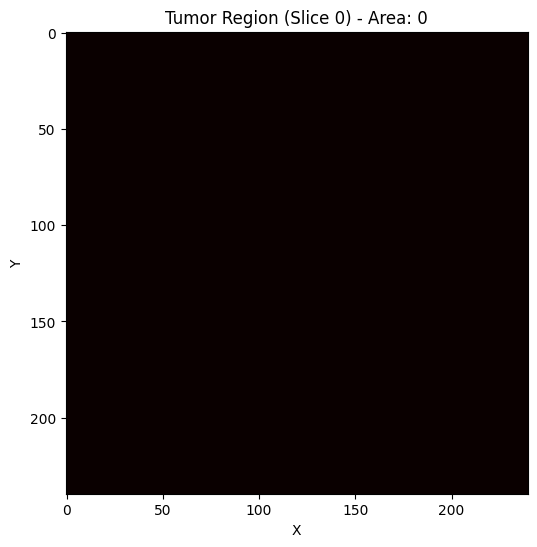

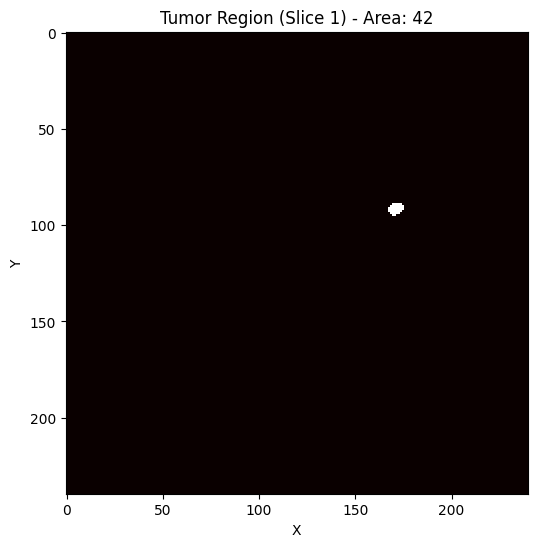

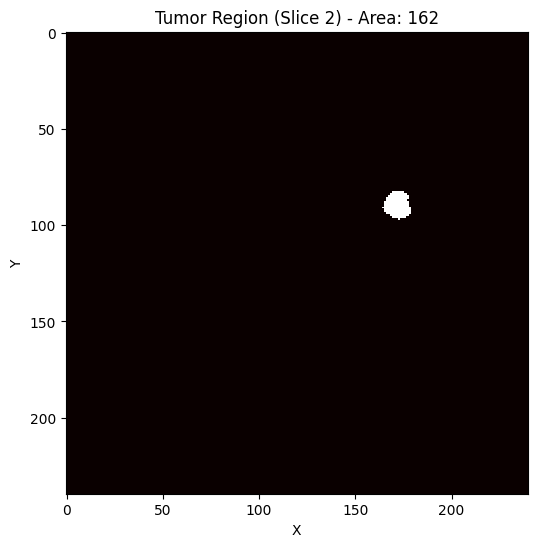

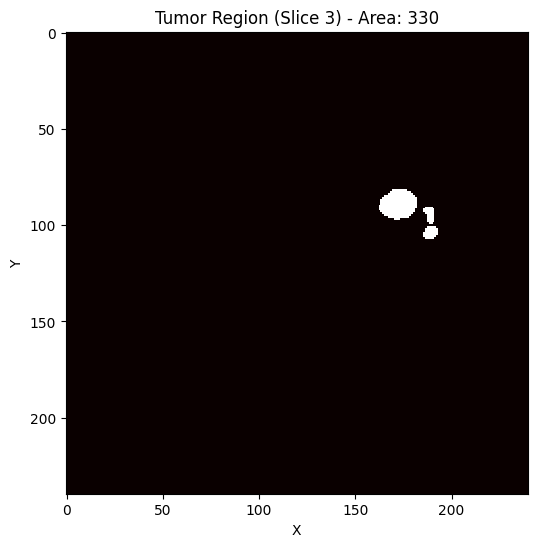

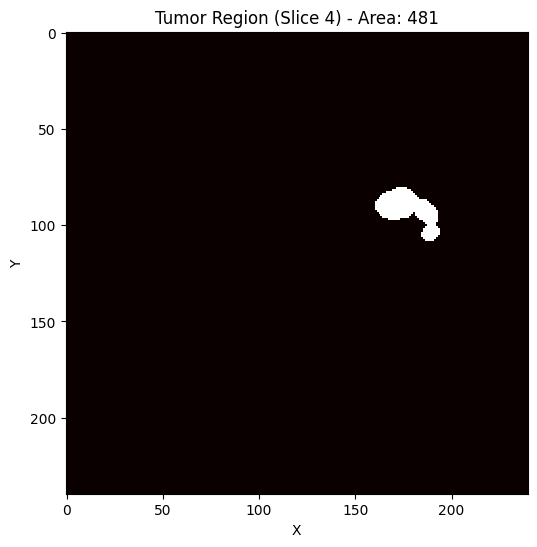

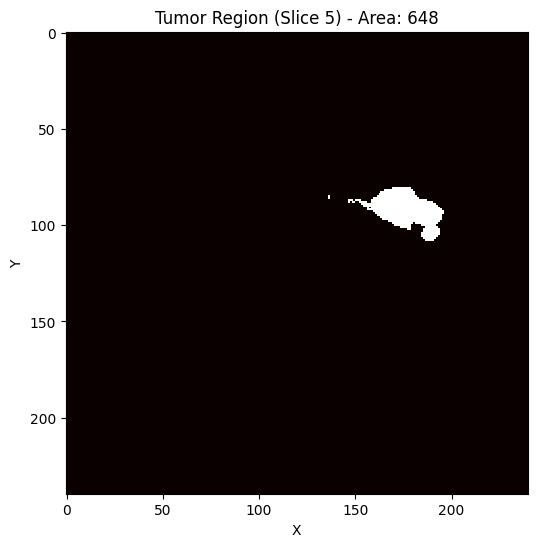

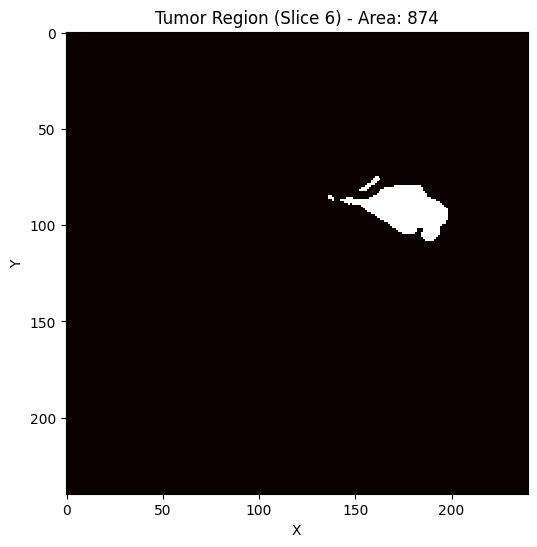

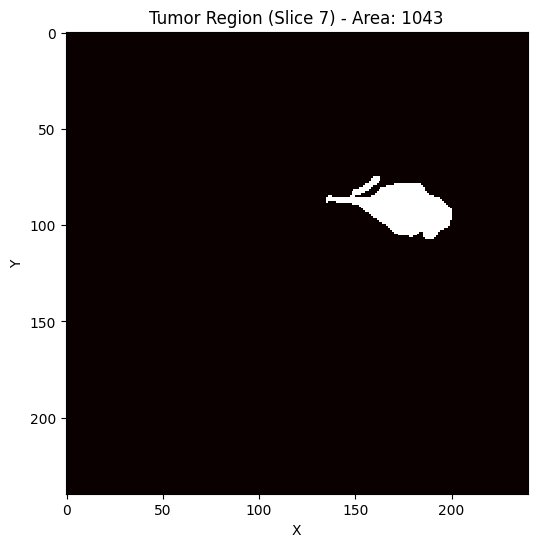

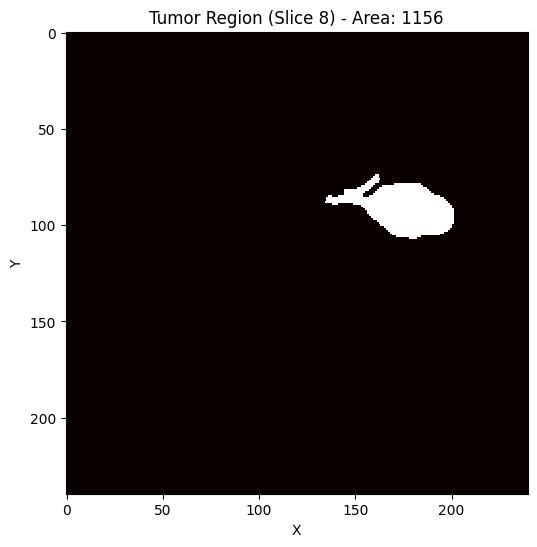

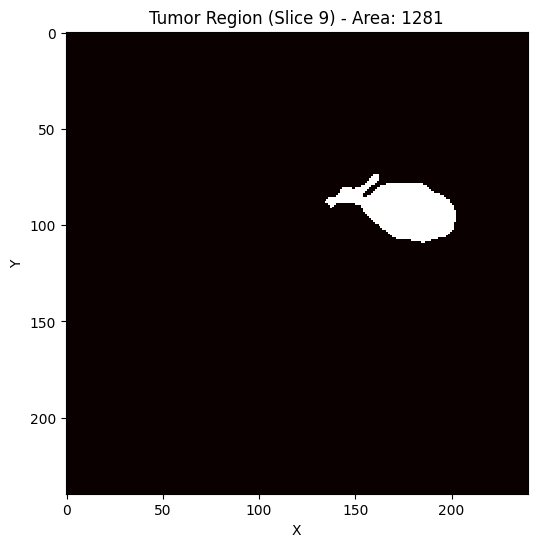

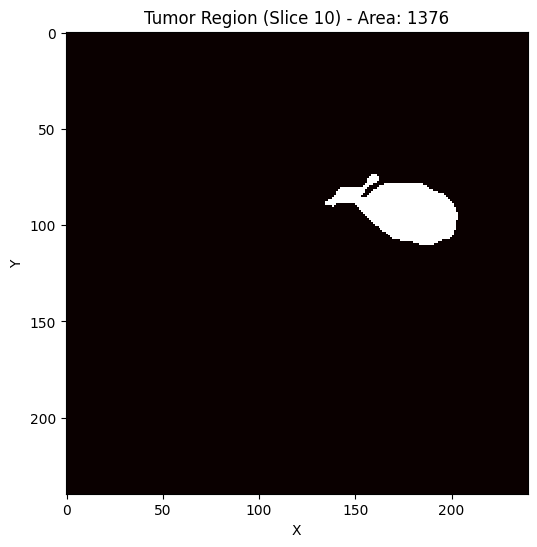

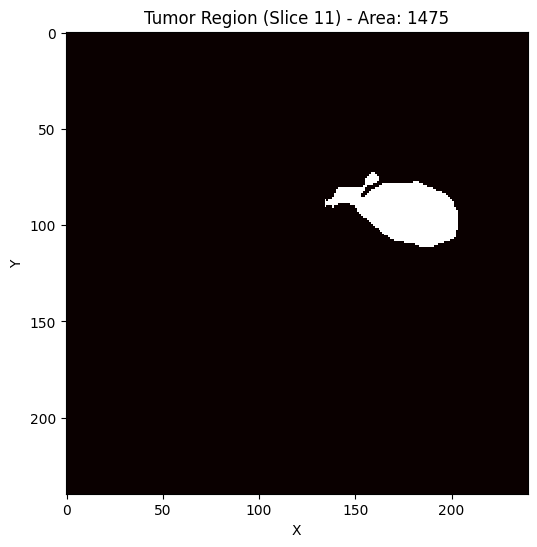

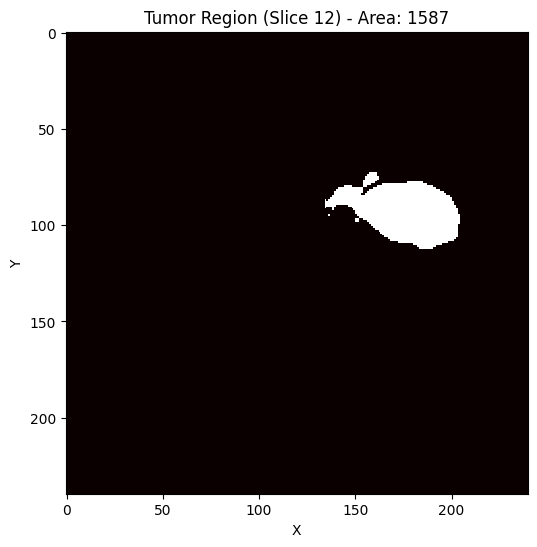

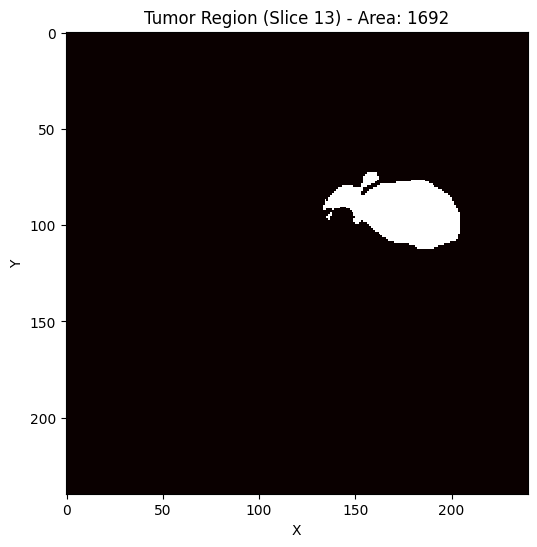

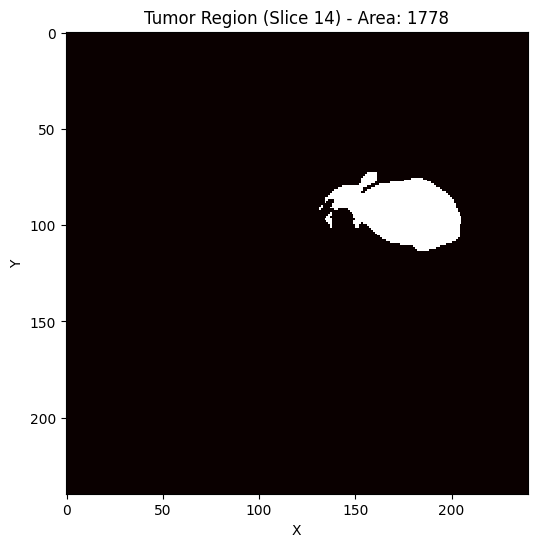

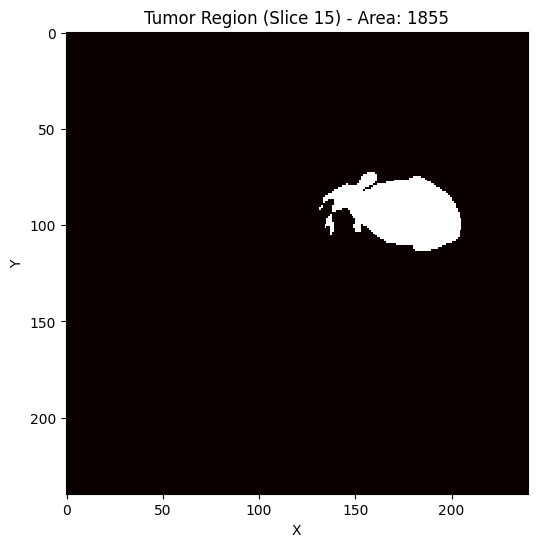

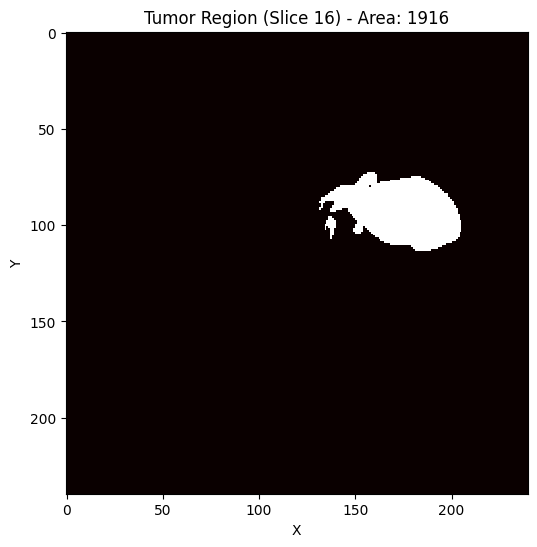

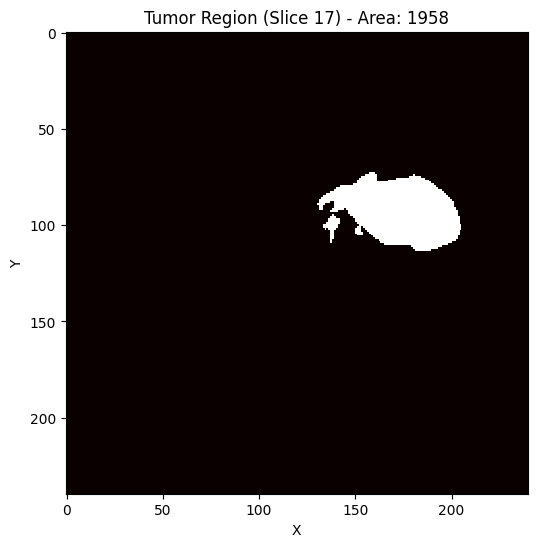

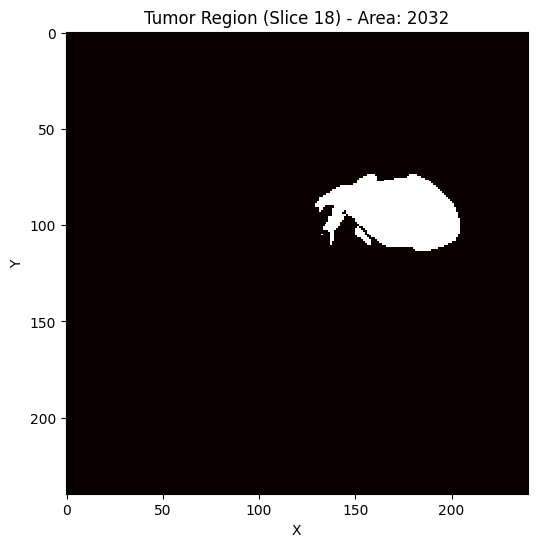

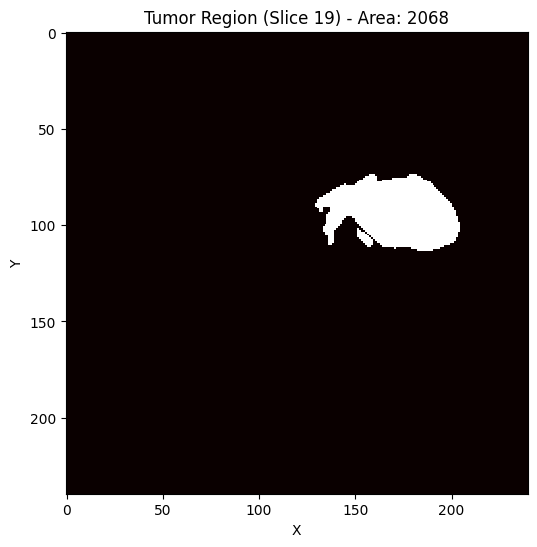

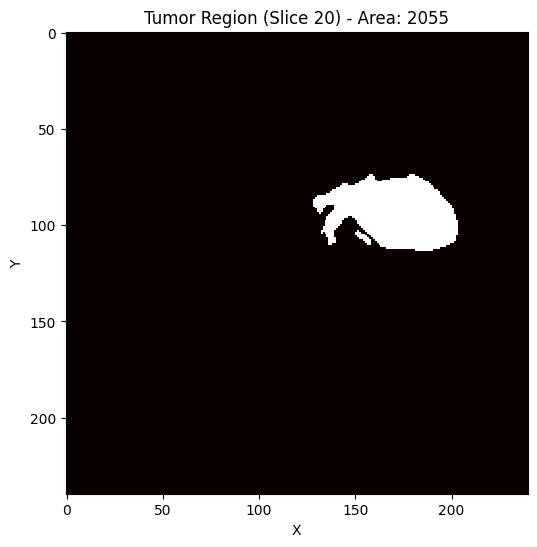

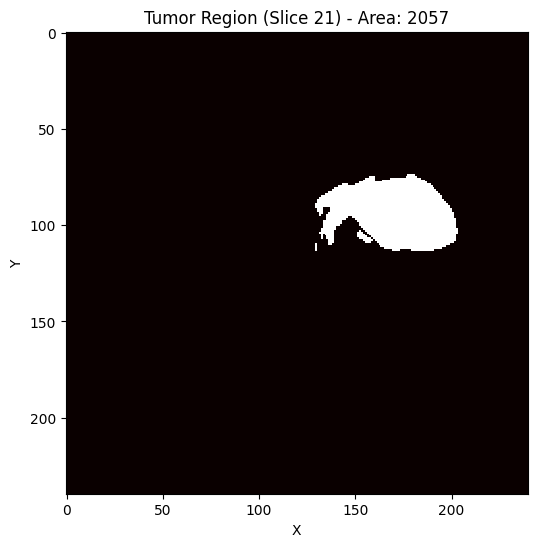

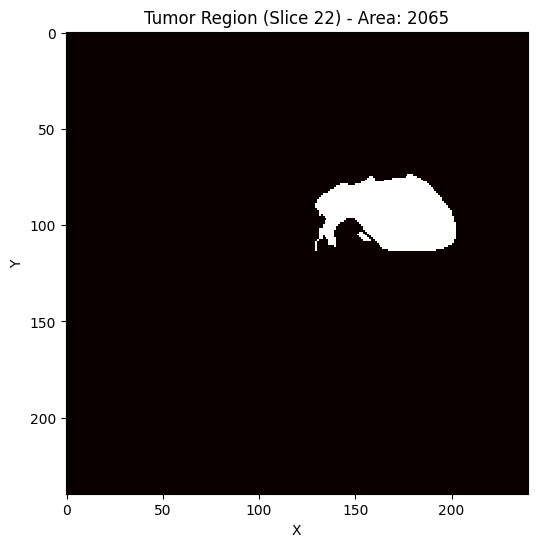

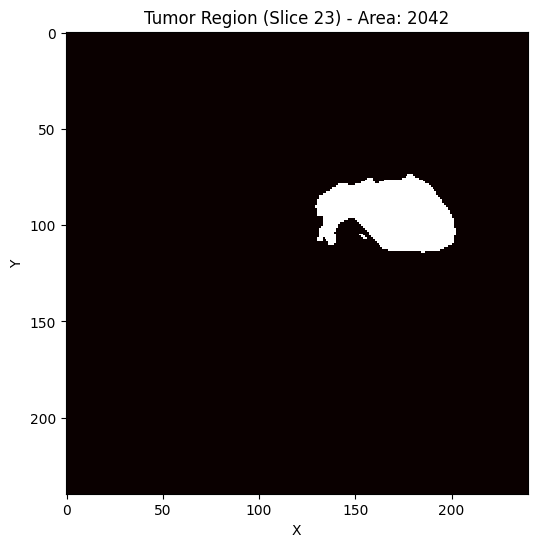

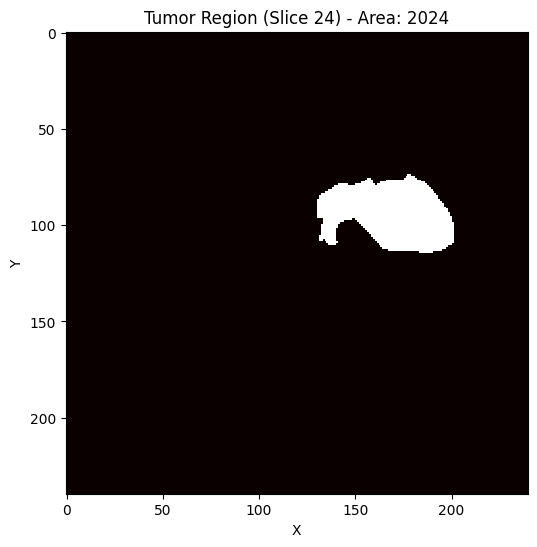

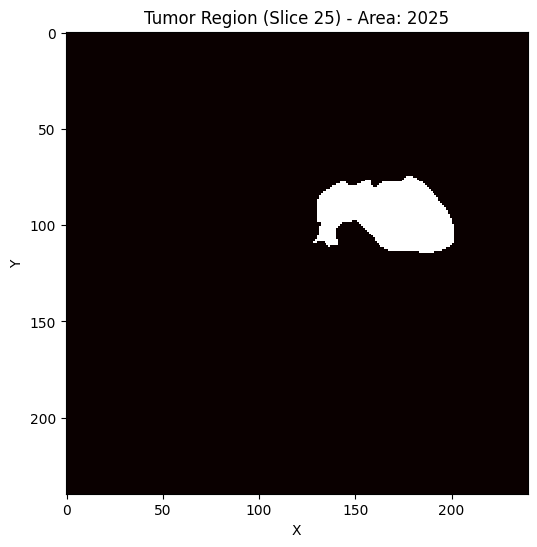

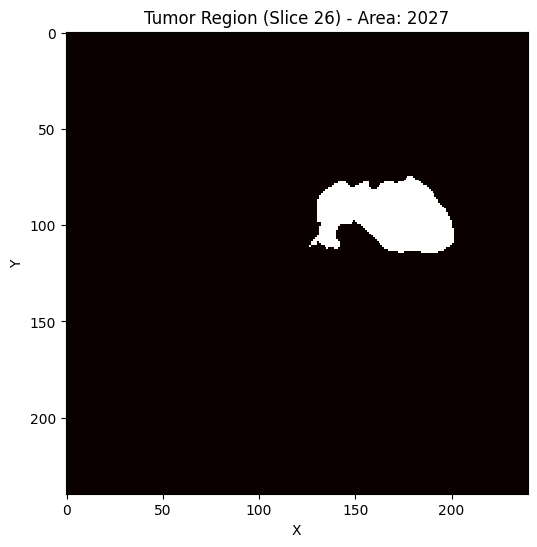

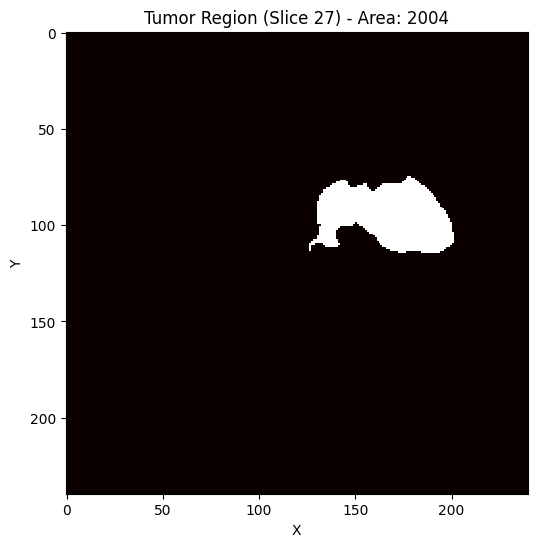

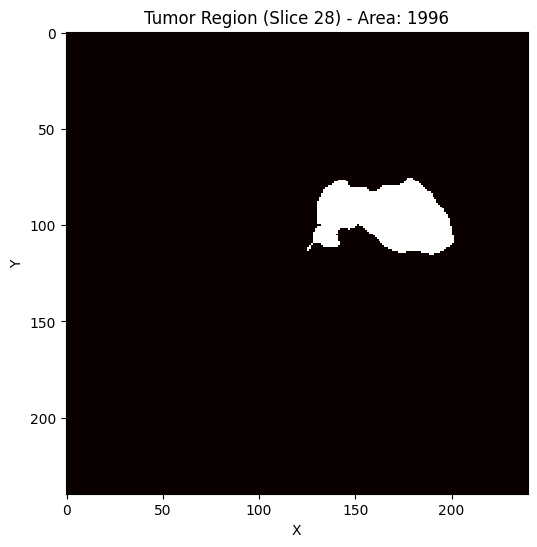

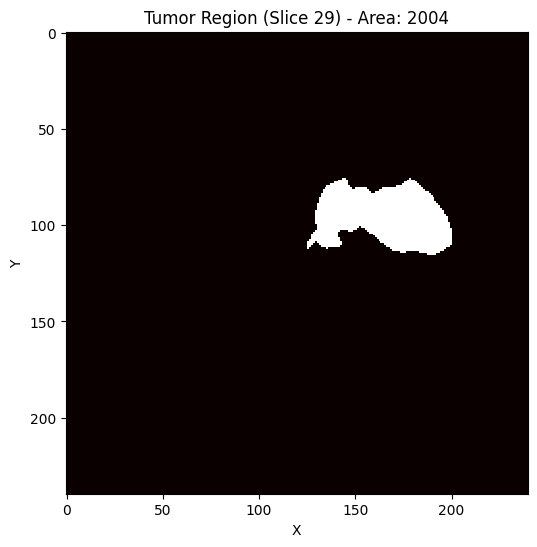

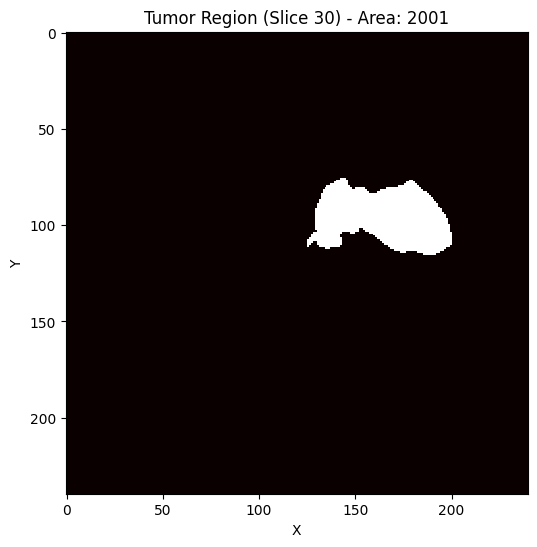

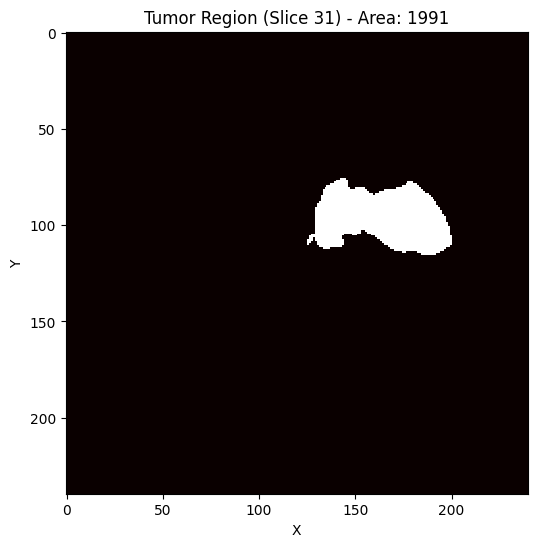

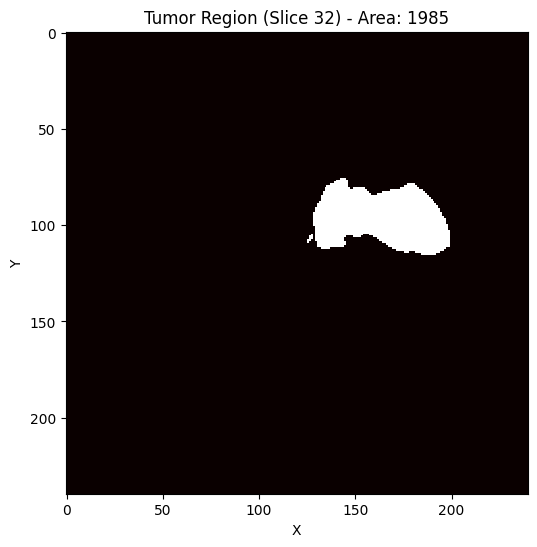

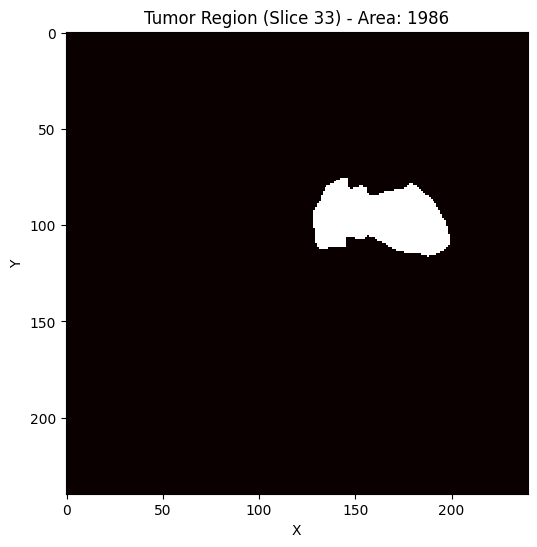

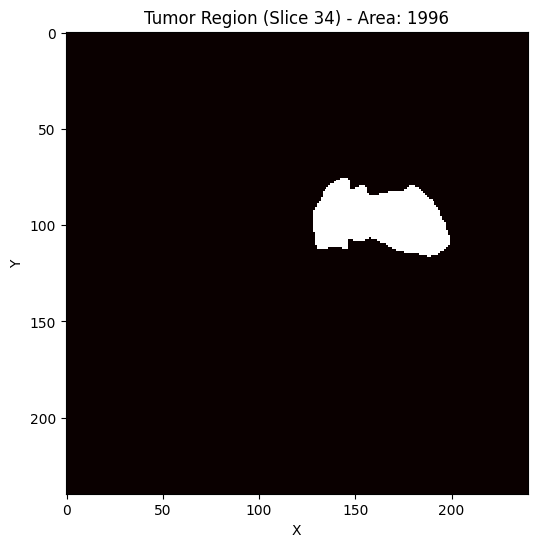

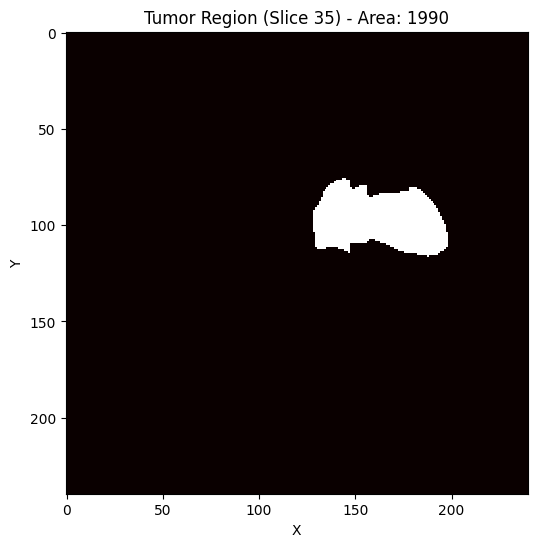

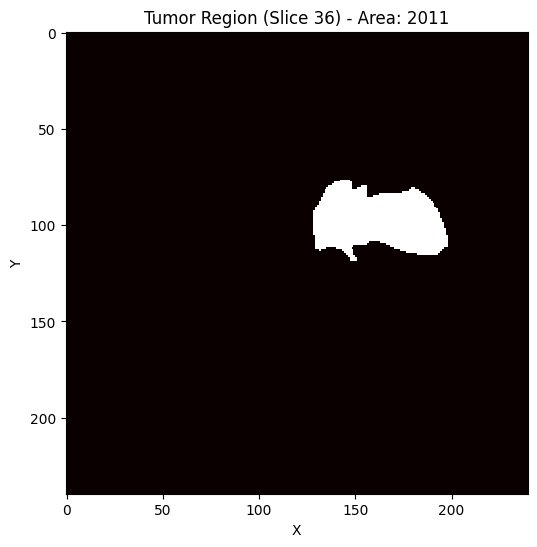

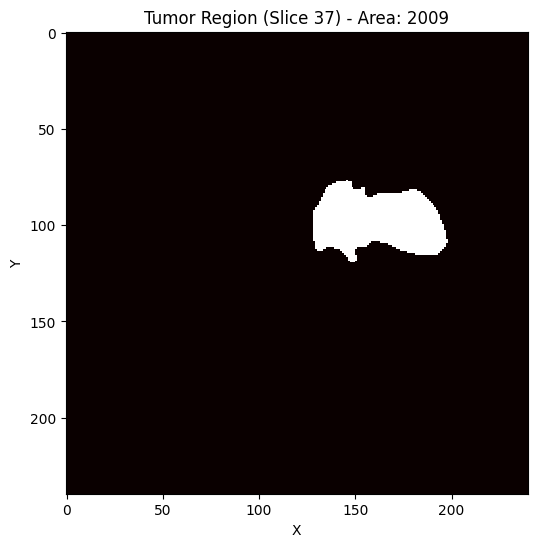

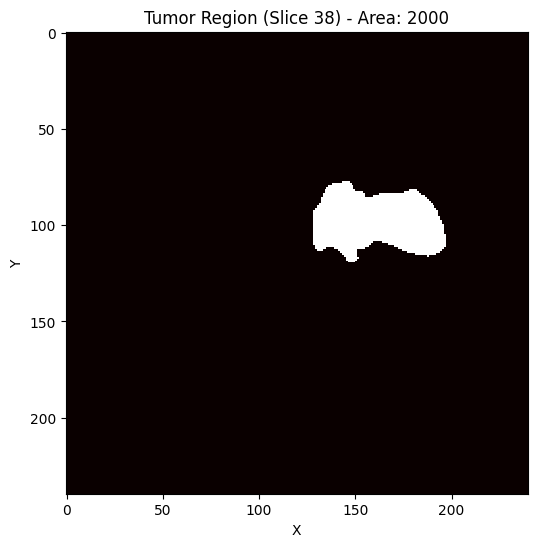

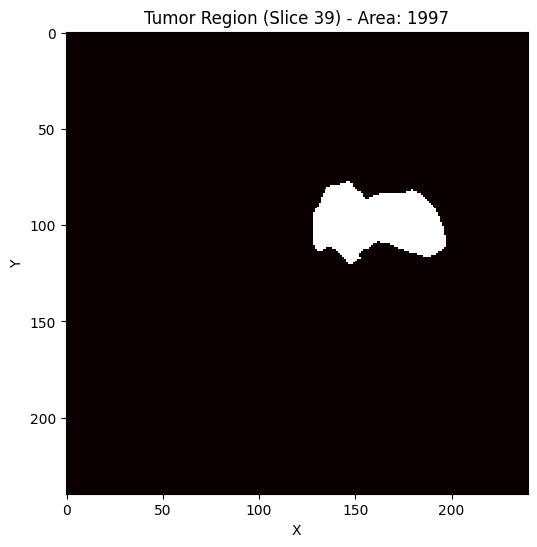

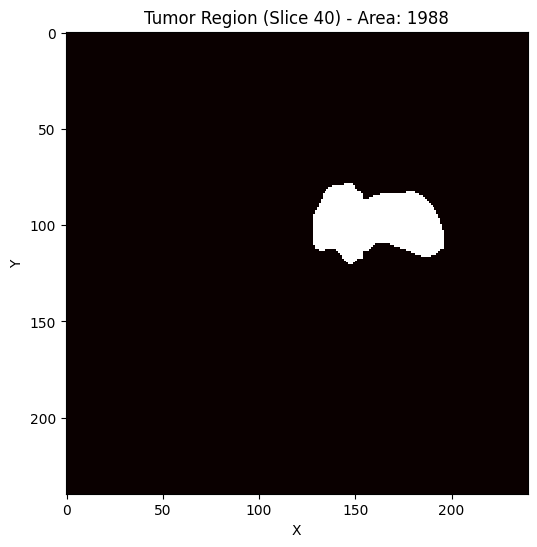

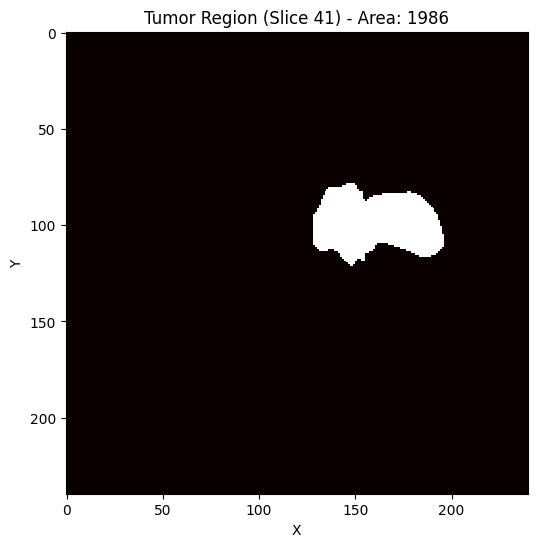

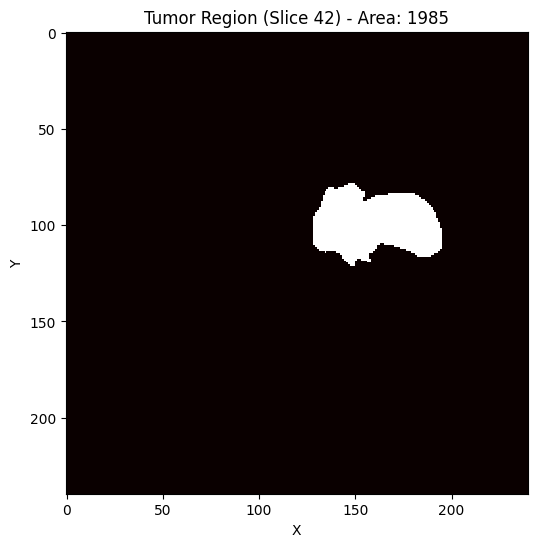

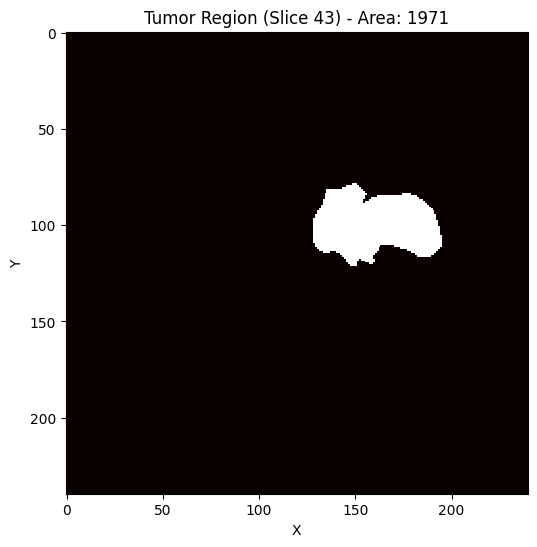

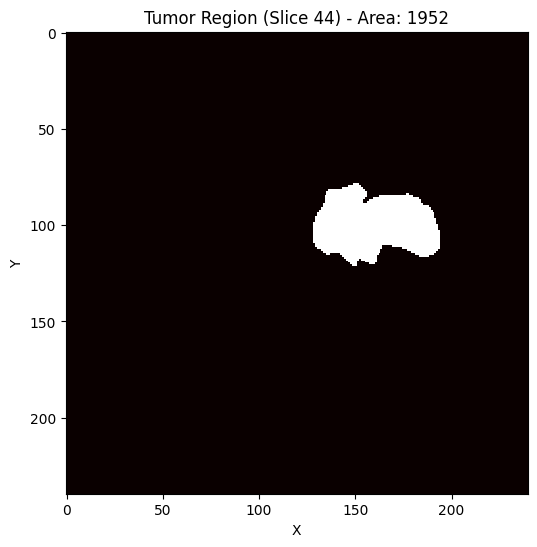

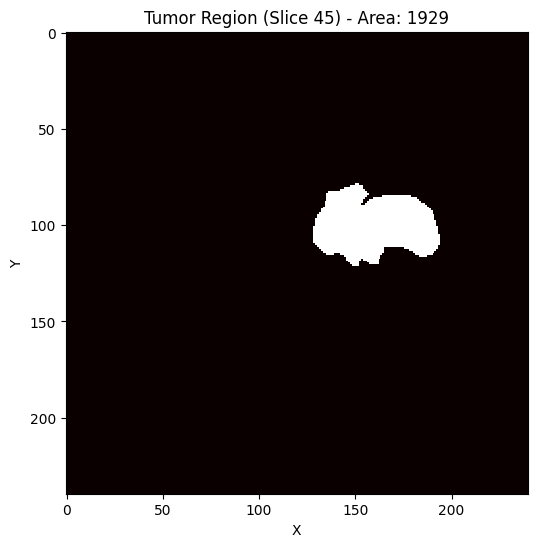

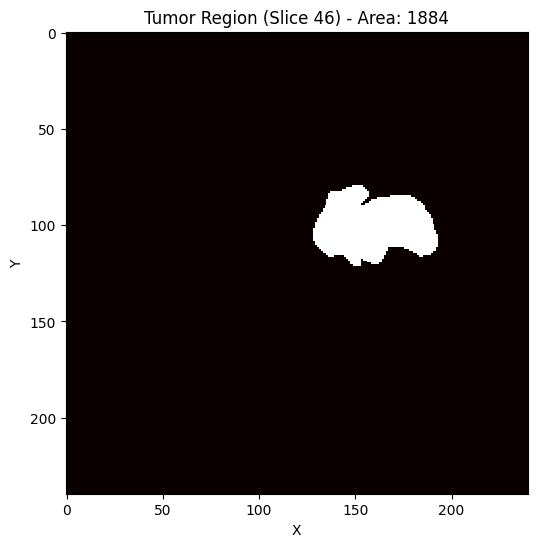

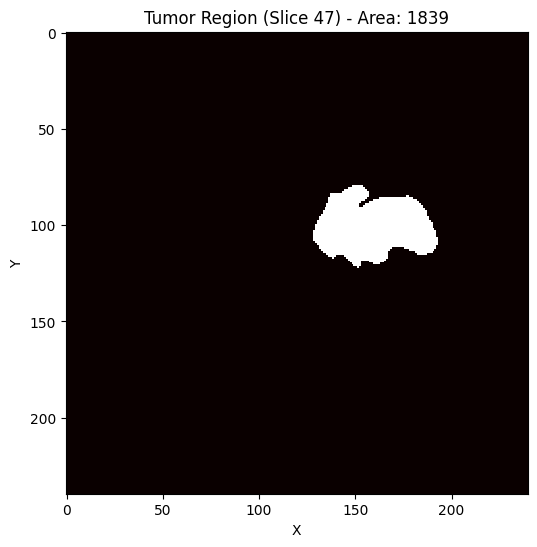

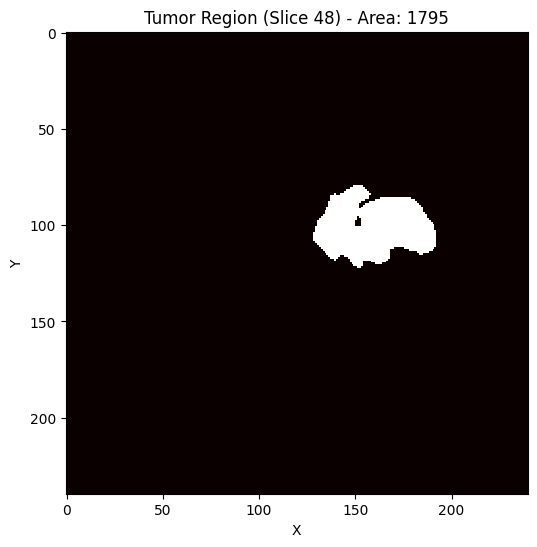

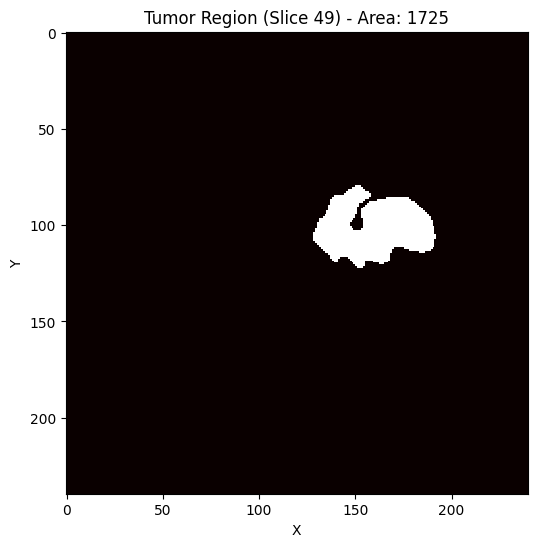

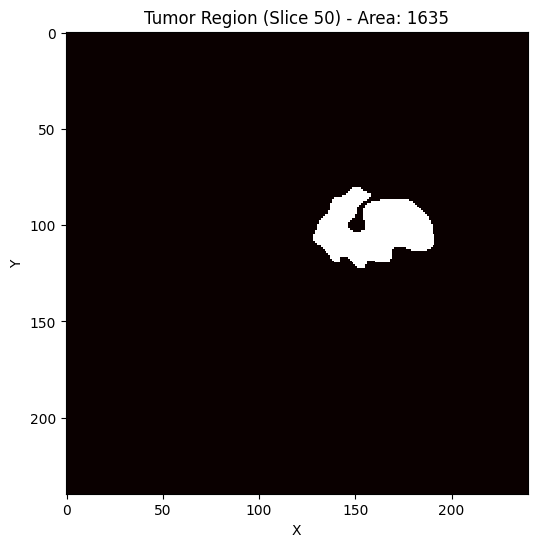

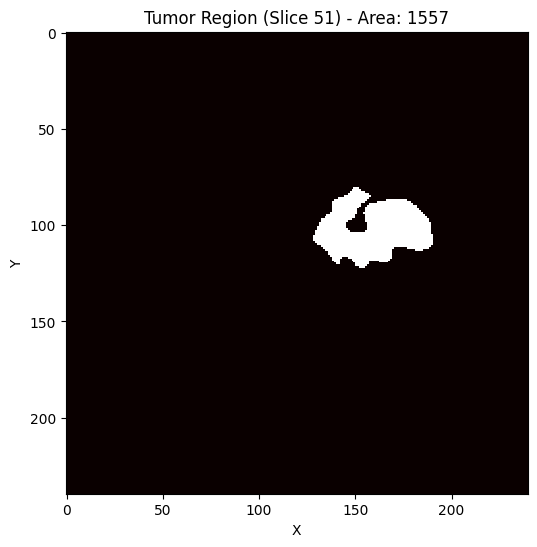

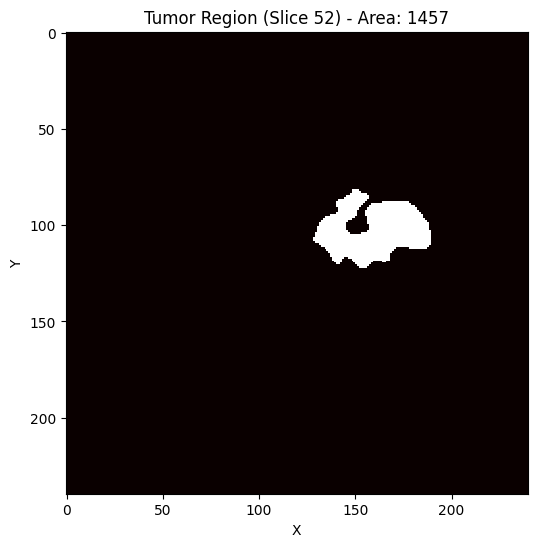

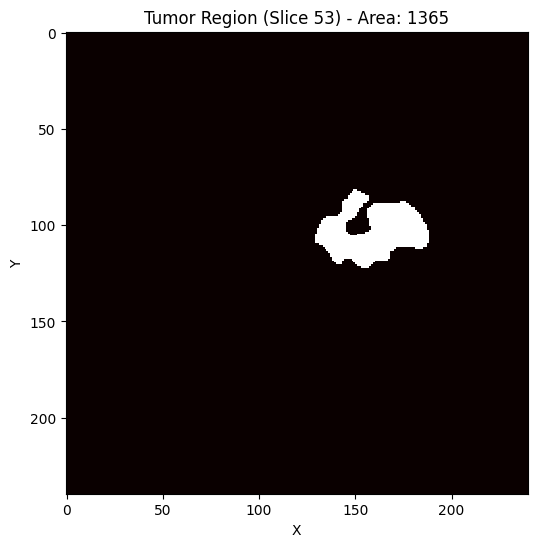

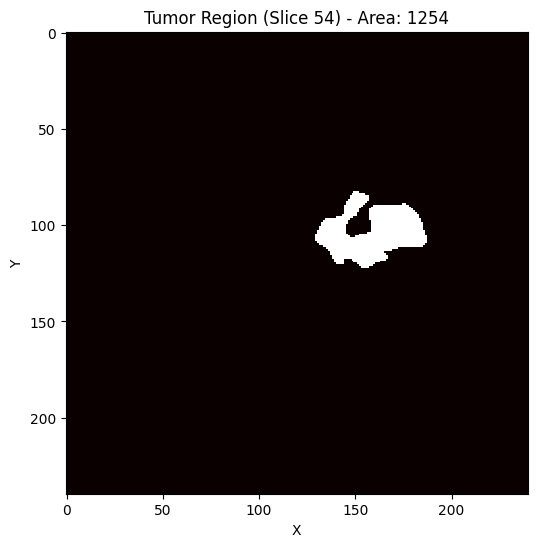

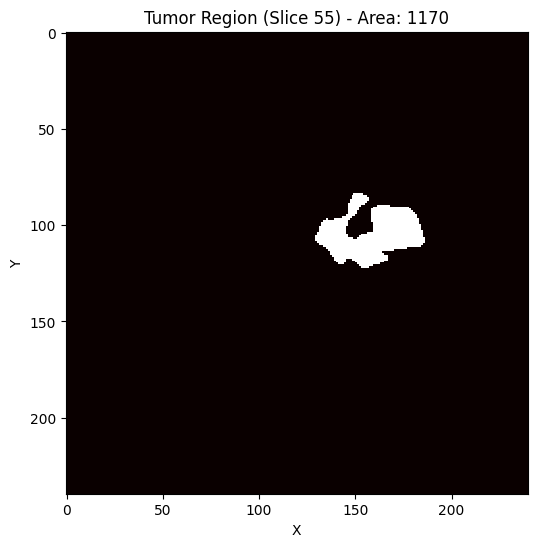

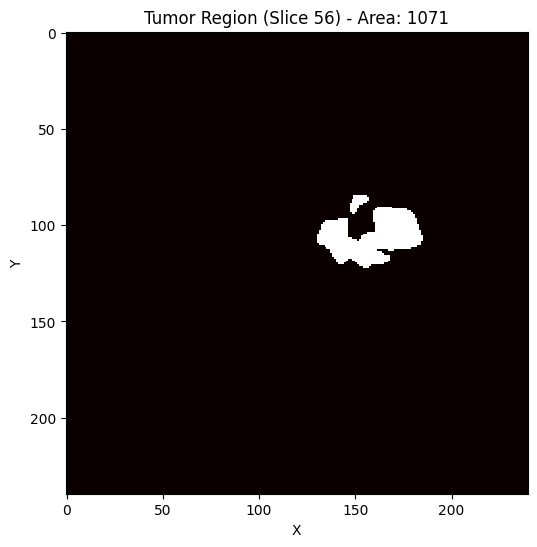

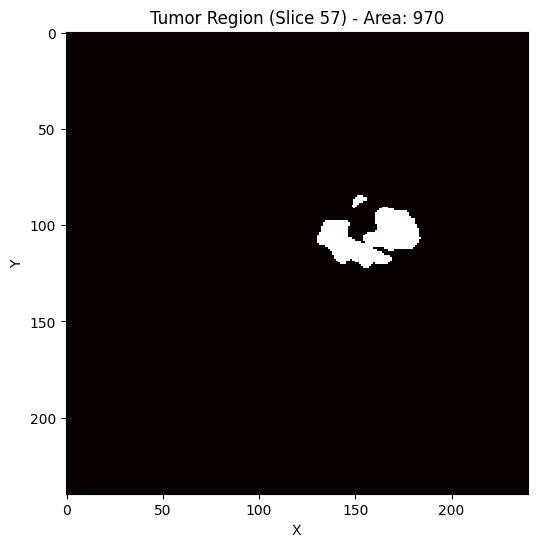

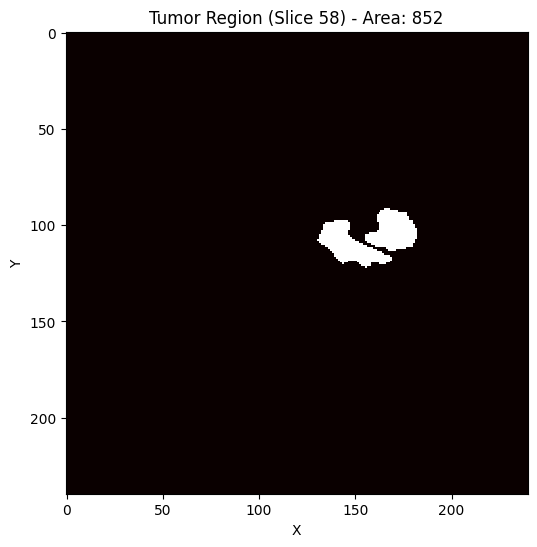

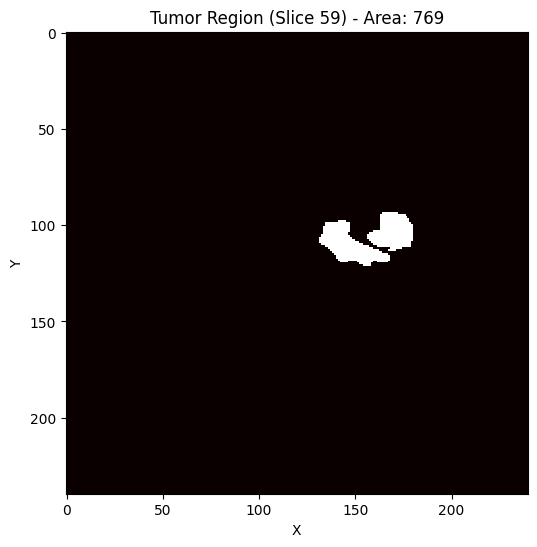

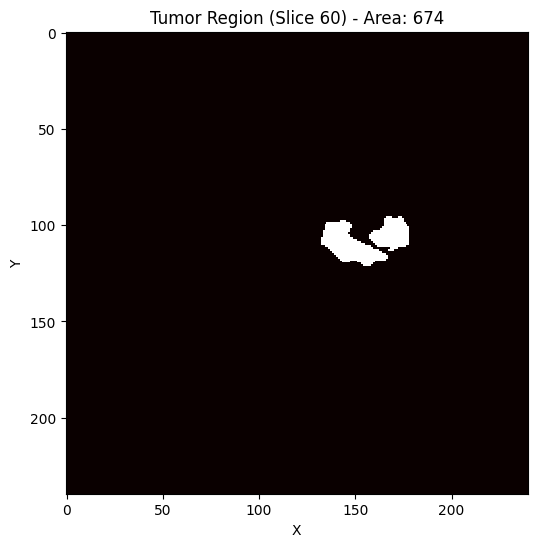

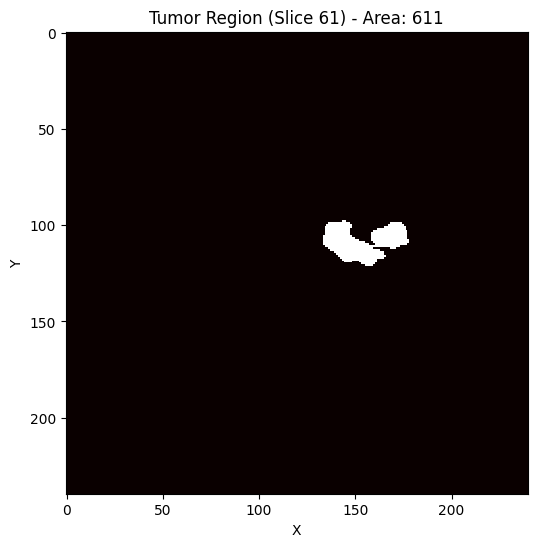

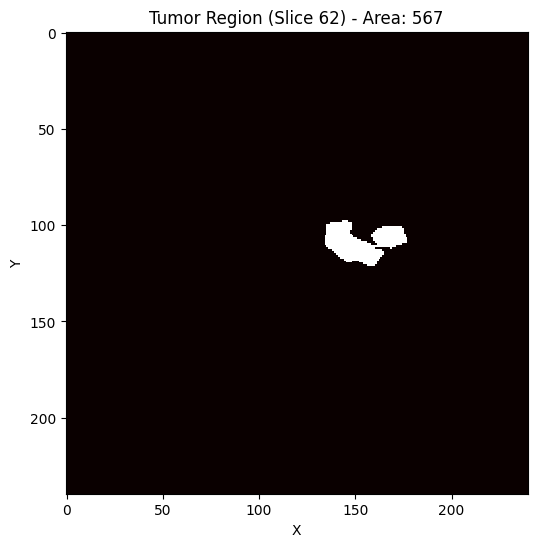

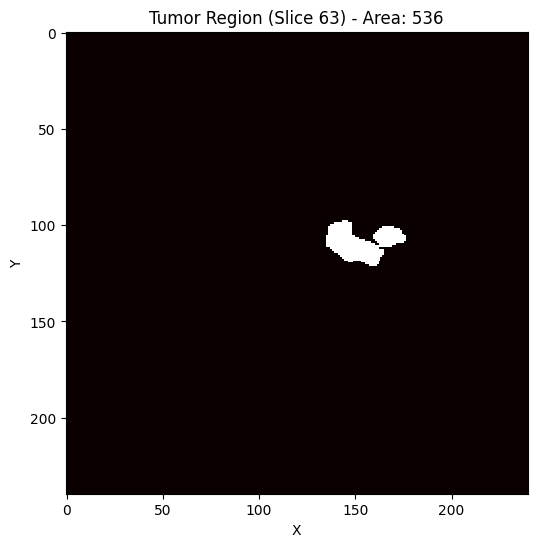

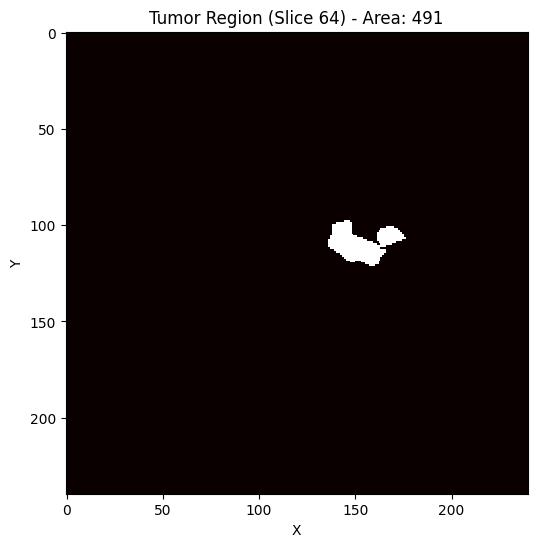

In [5]:
tmr_areas=[]


for idx in range(0,65):
    tumor_mask = nii_data[:, :, idx] > 0
    tumor_area = np.count_nonzero(tumor_mask)
    tmr_areas.append(tumor_area)
    plt.figure(figsize=(8, 6))
    plt.imshow(tumor_mask, cmap='hot', interpolation='nearest')
    plt.title(f'Tumor Region (Slice {idx}) - Area: {tumor_area}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()
    


# TUMOR PERIMETER

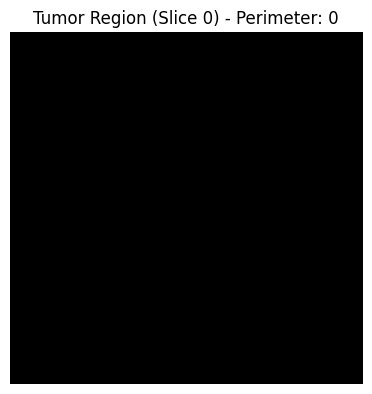

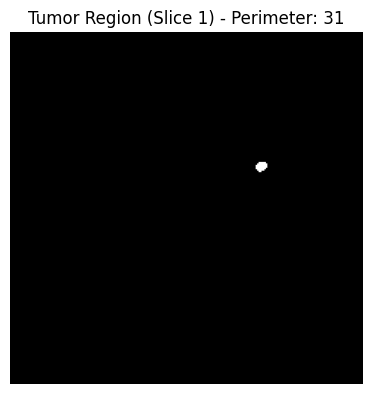

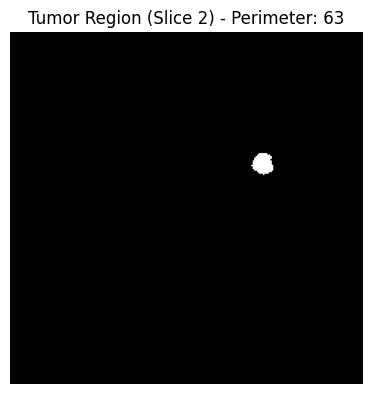

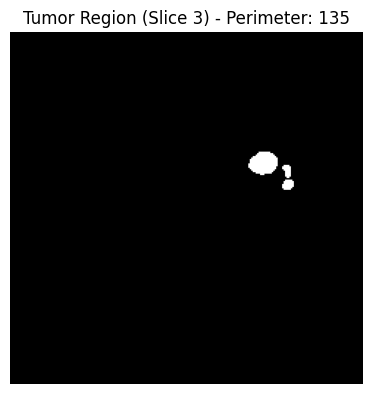

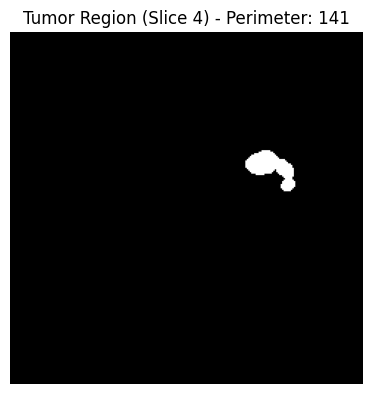

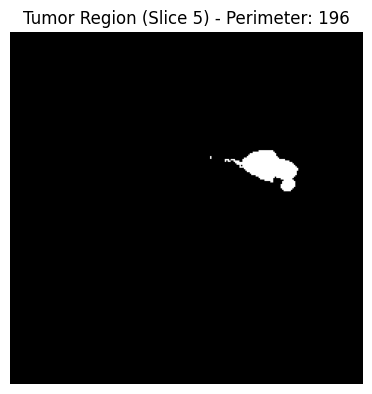

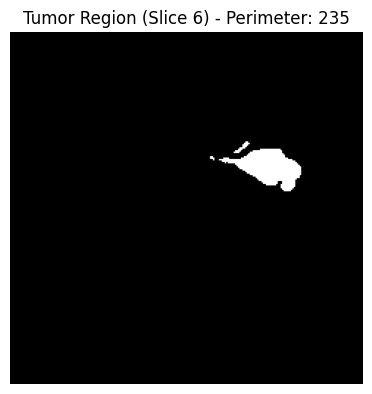

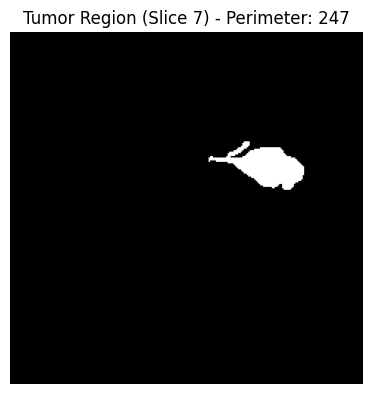

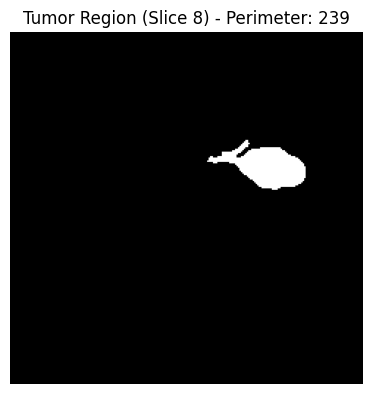

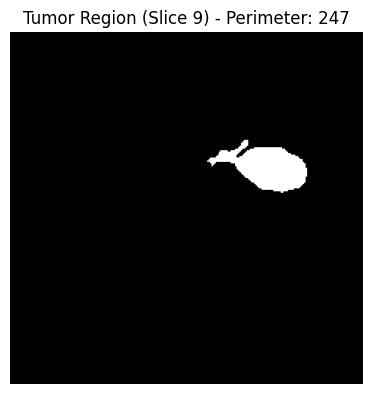

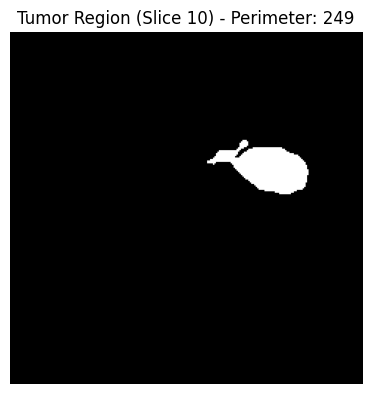

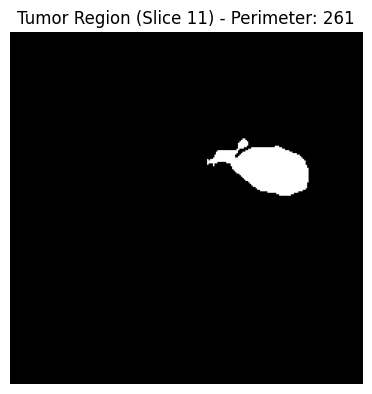

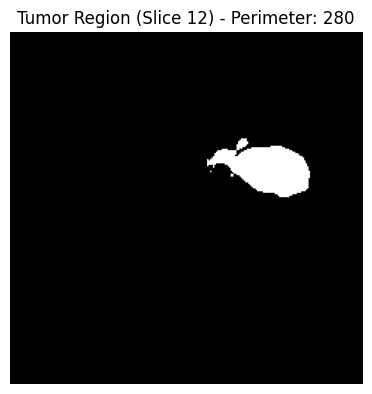

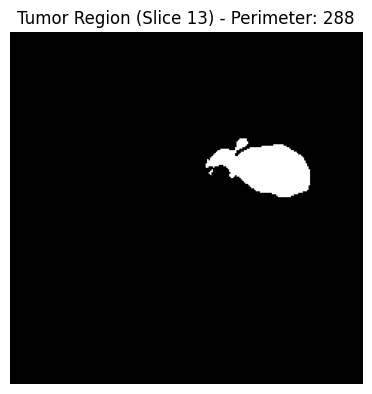

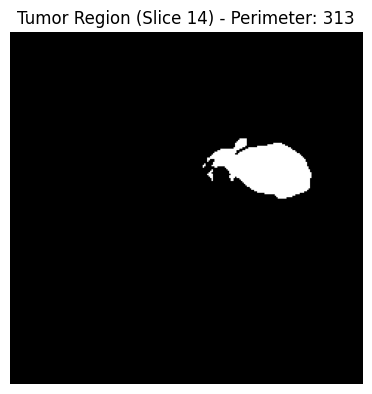

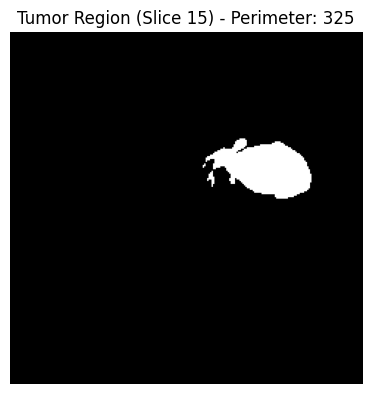

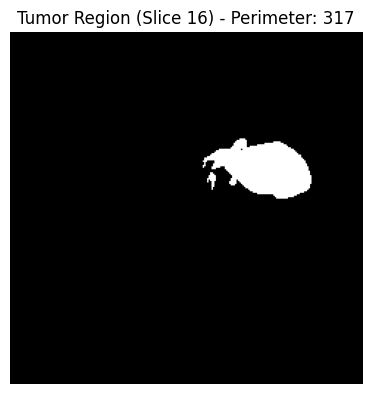

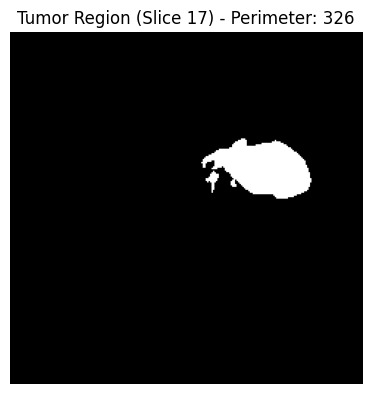

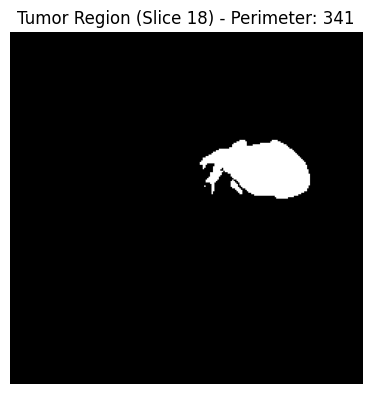

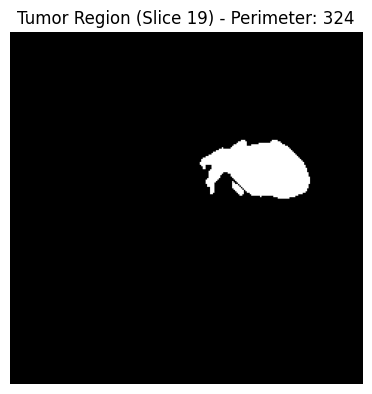

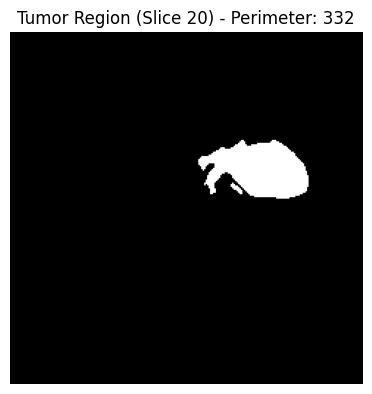

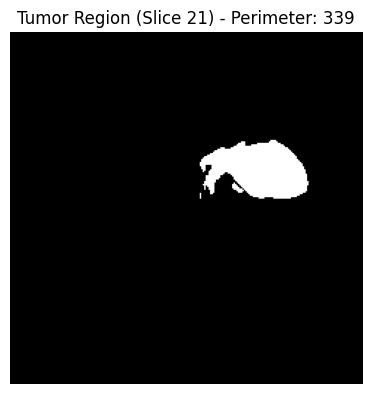

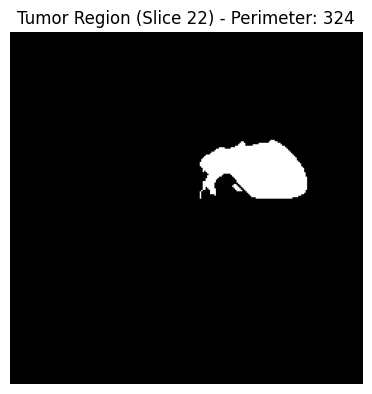

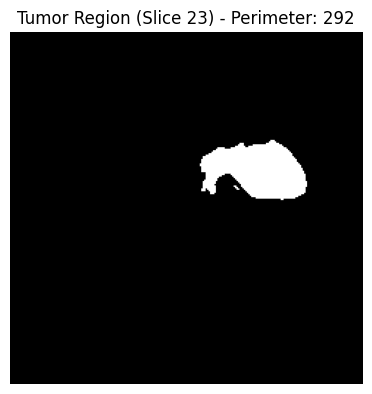

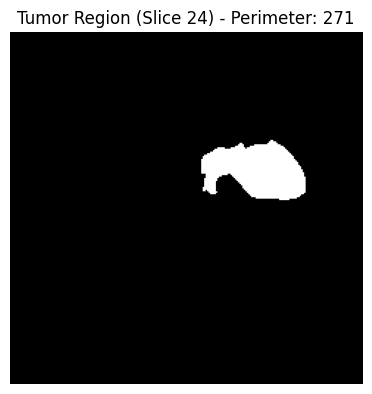

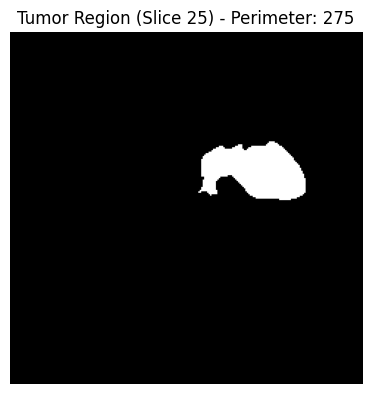

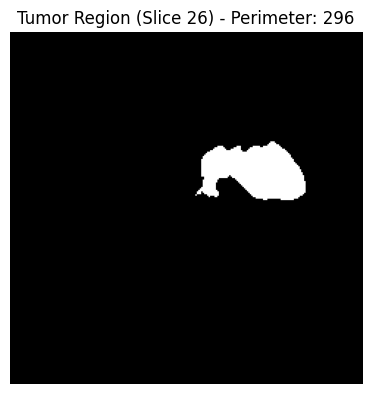

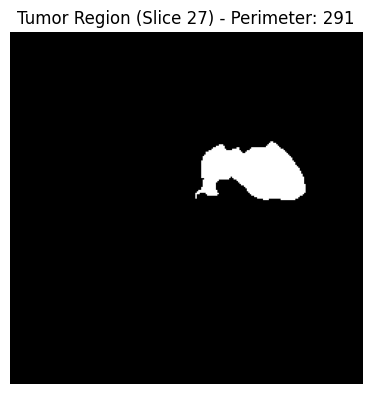

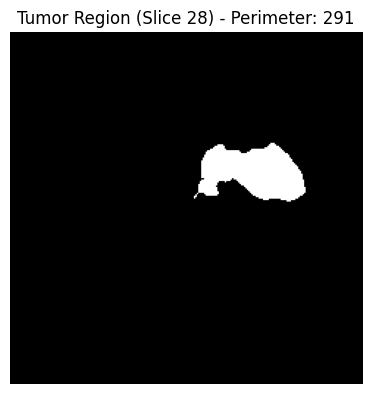

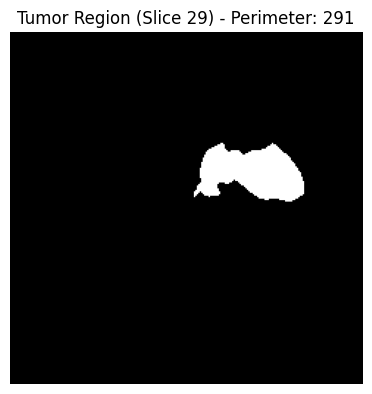

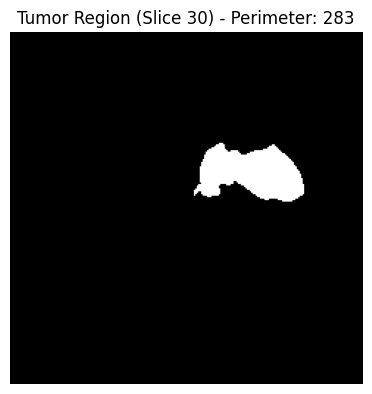

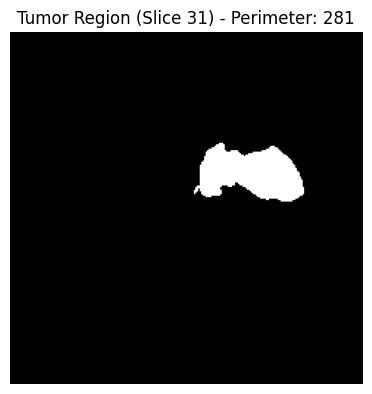

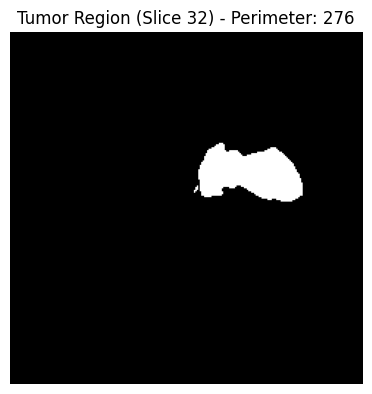

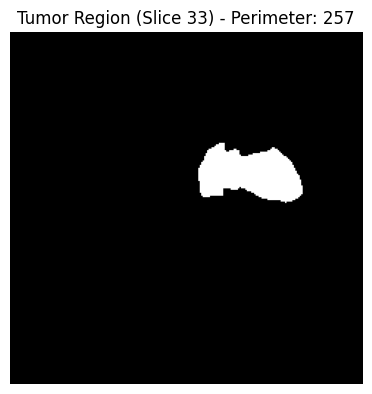

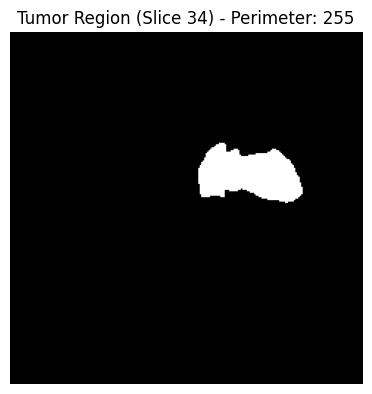

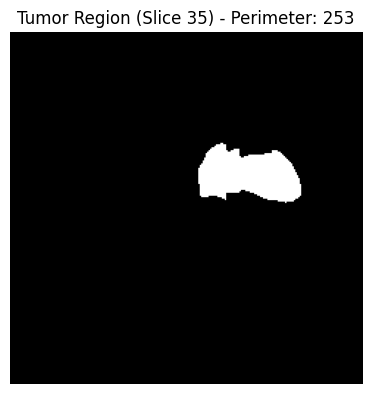

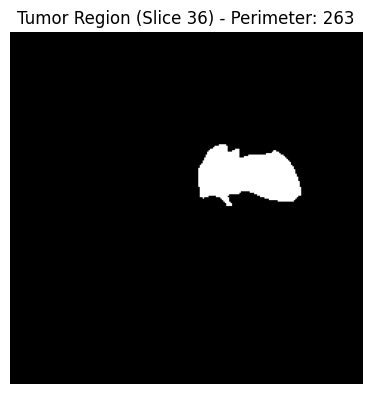

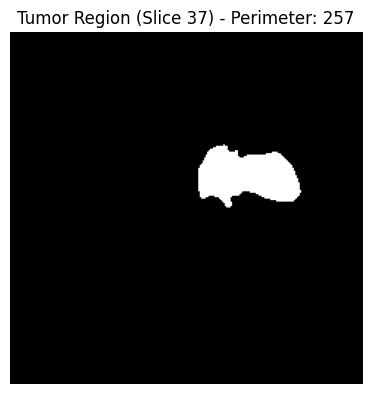

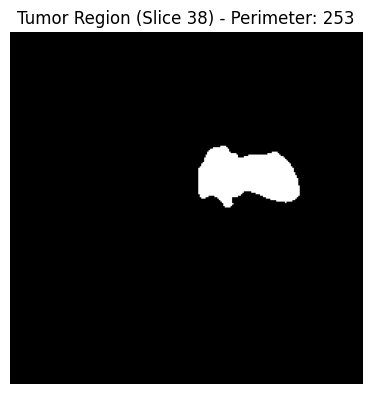

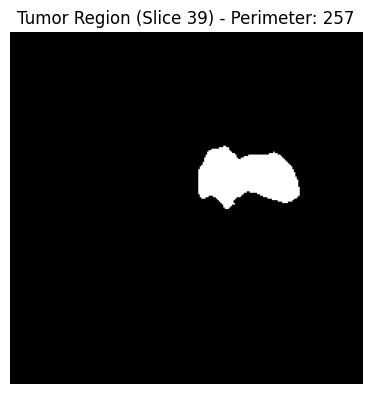

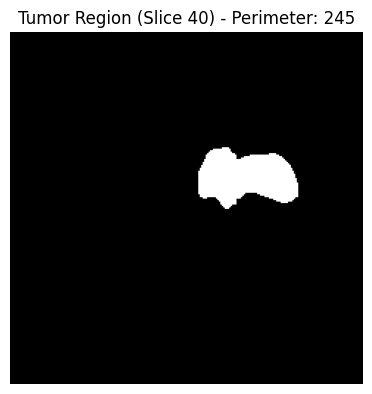

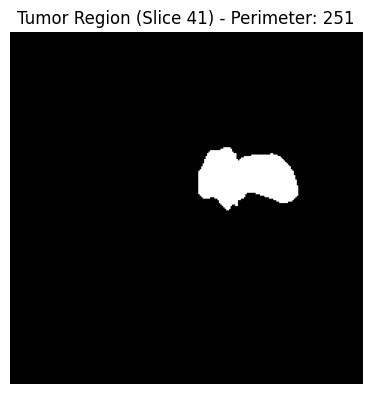

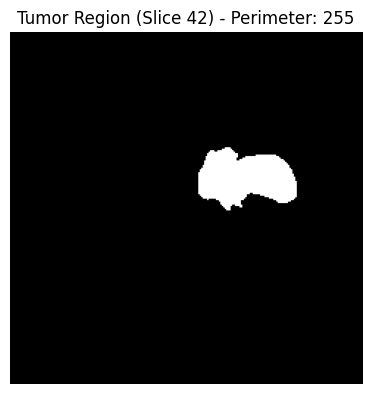

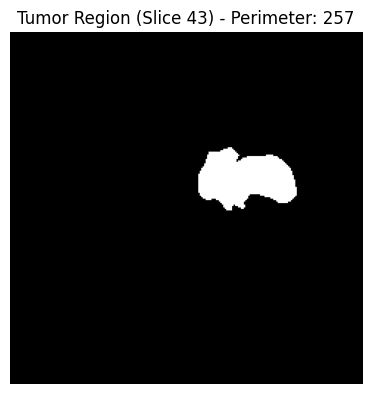

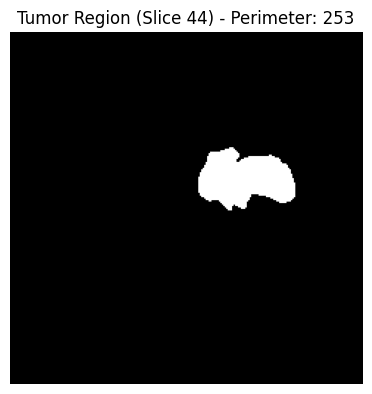

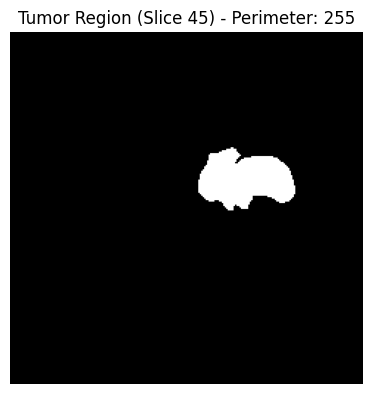

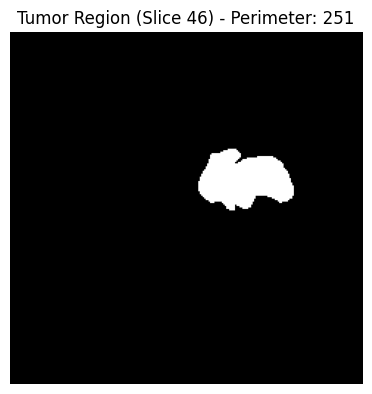

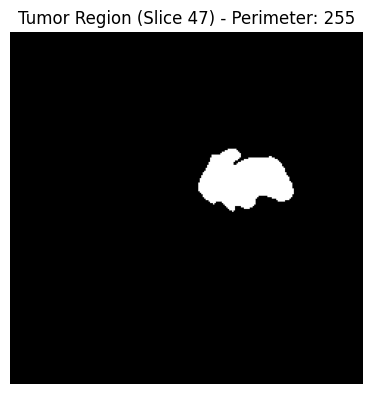

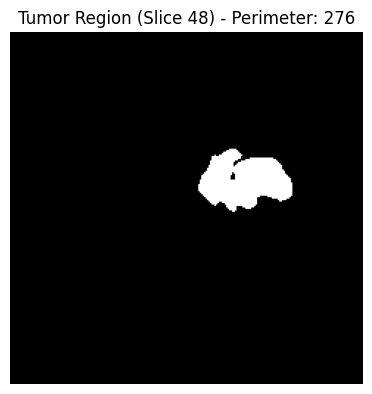

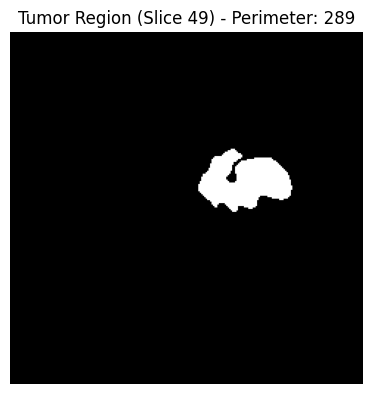

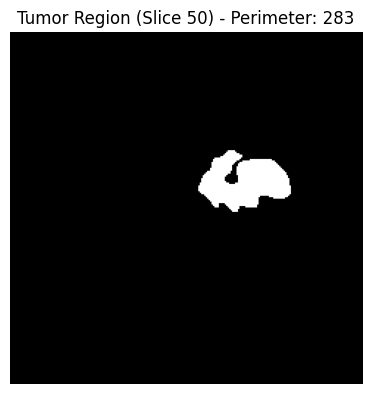

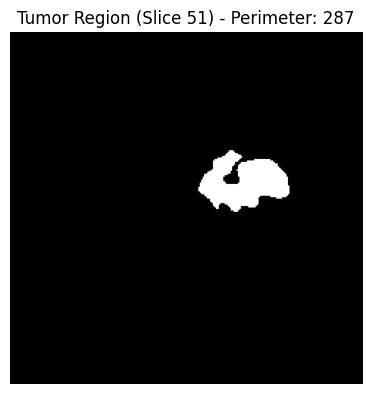

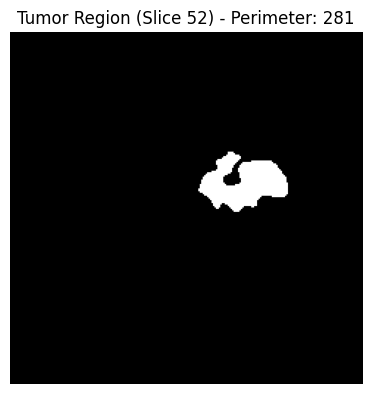

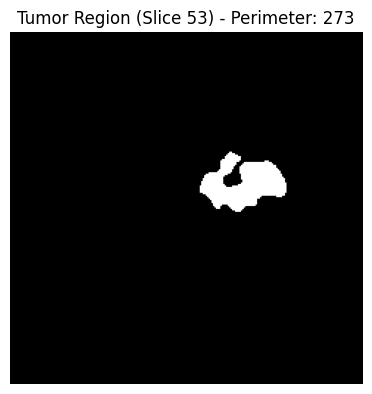

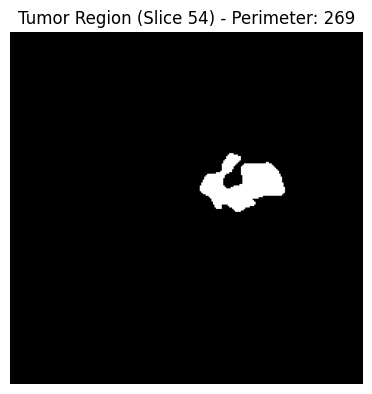

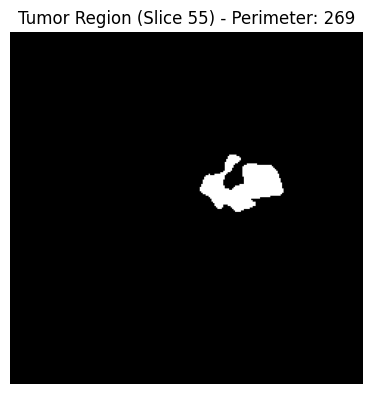

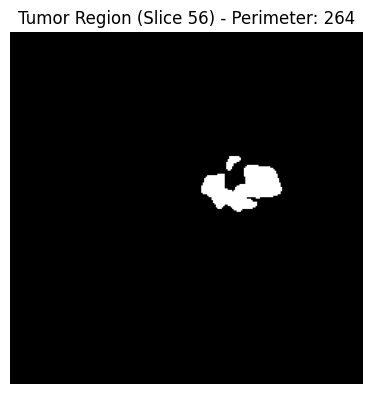

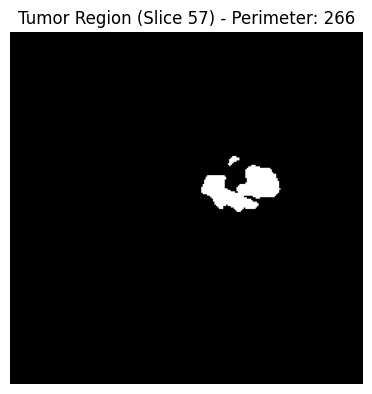

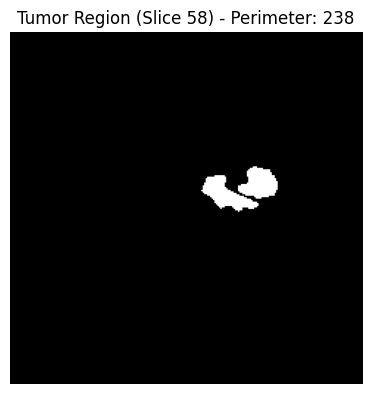

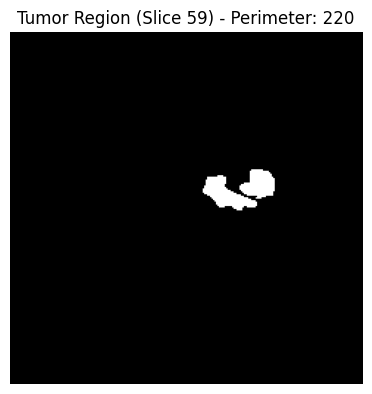

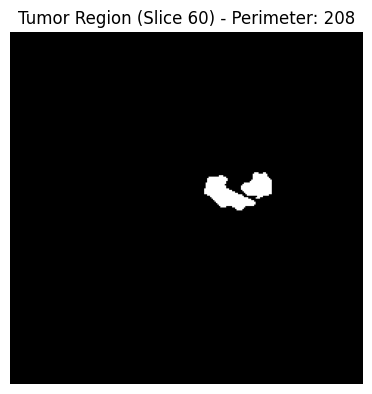

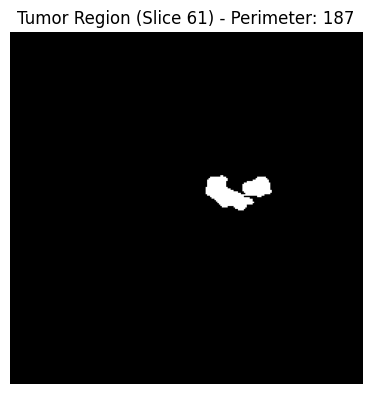

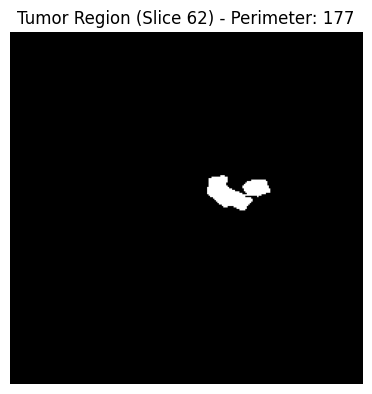

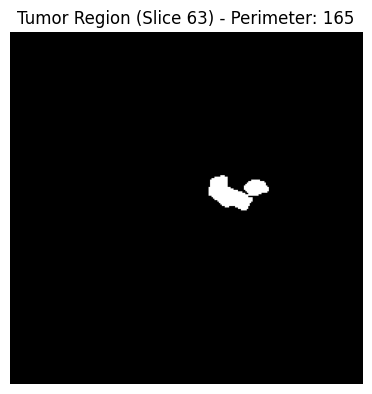

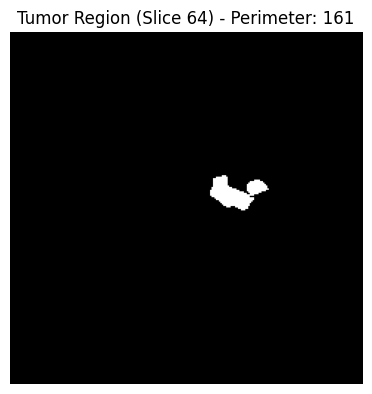

In [6]:
from skimage.measure import find_contours
import matplotlib.pyplot as plt


selected_slices = range(0, 65)

for idx in selected_slices:
    tumor_mask = nii_data[:, :, idx] > 0  
    contours = find_contours(tumor_mask, 0.5)
    perimeter = sum([len(contour) for contour in contours])
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(tumor_mask, cmap='gray')
    plt.title(f'Tumor Region (Slice {idx}) - Perimeter: {perimeter}')
    plt.axis('off')

    plt.show()


# CONVEXITY

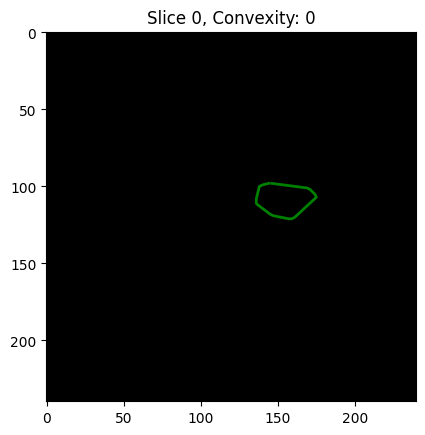

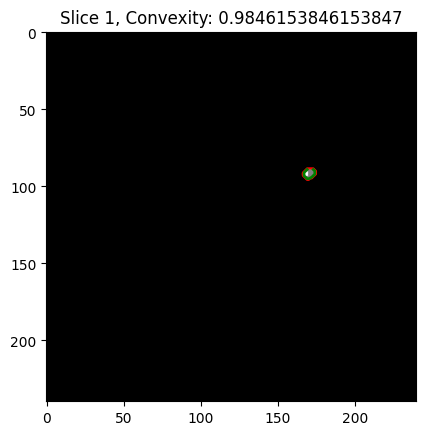

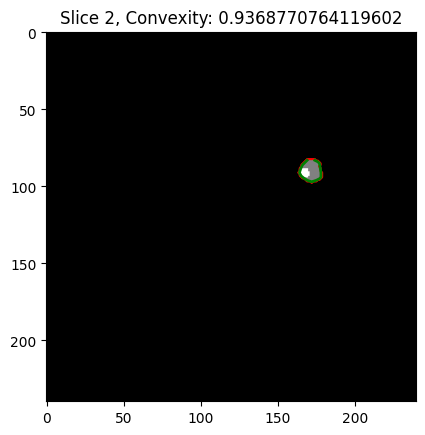

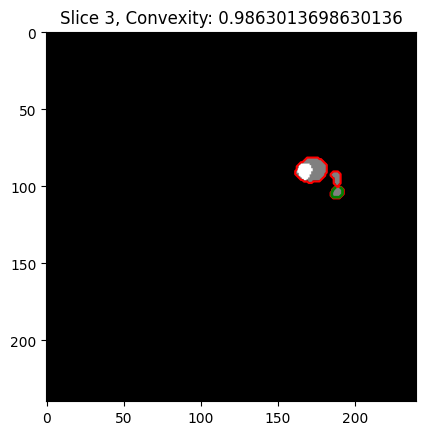

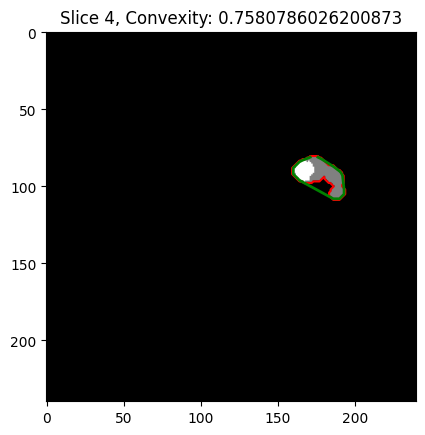

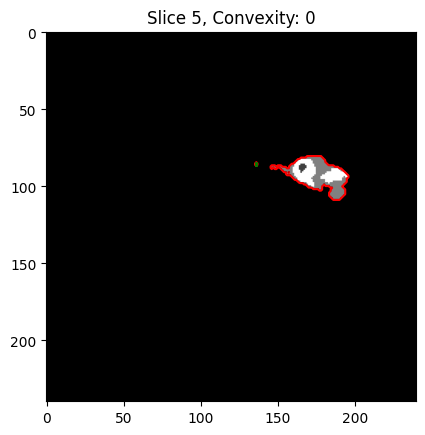

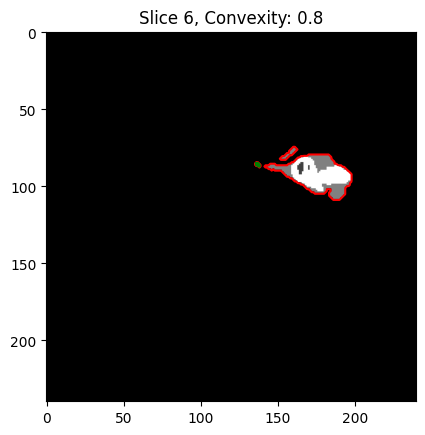

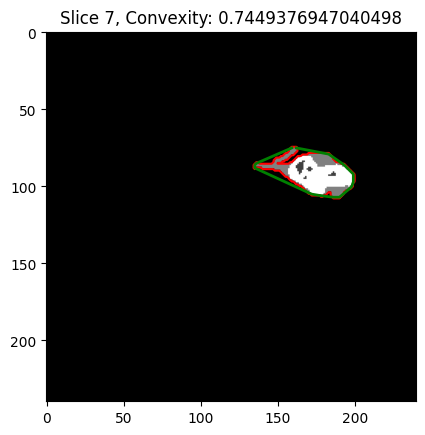

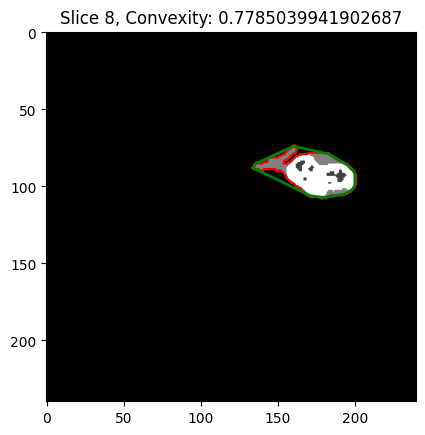

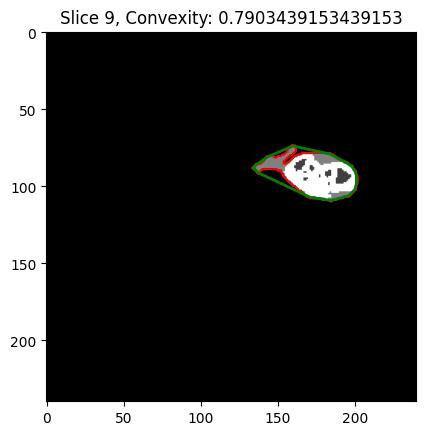

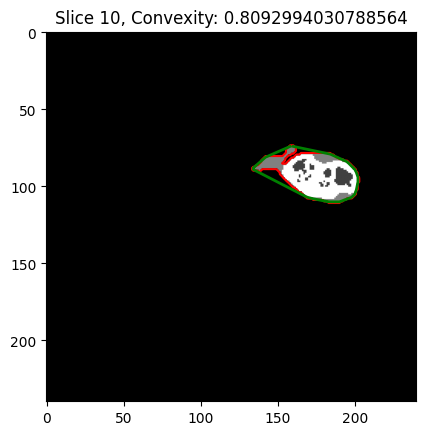

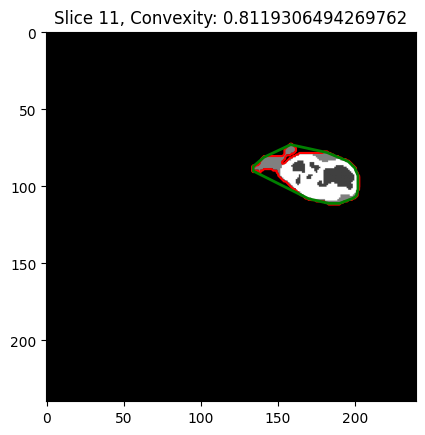

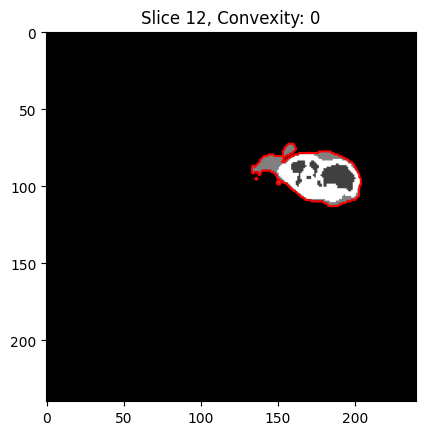

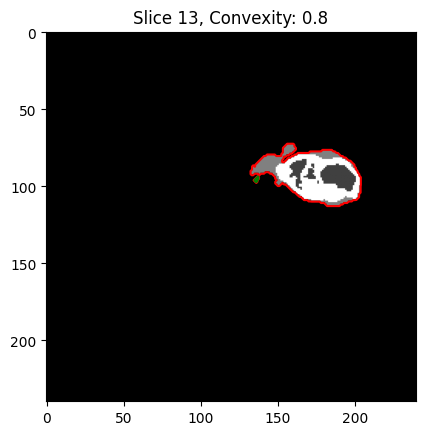

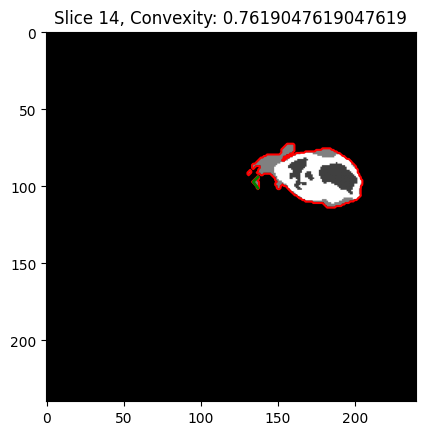

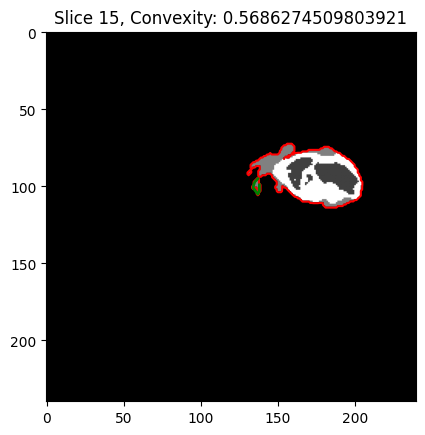

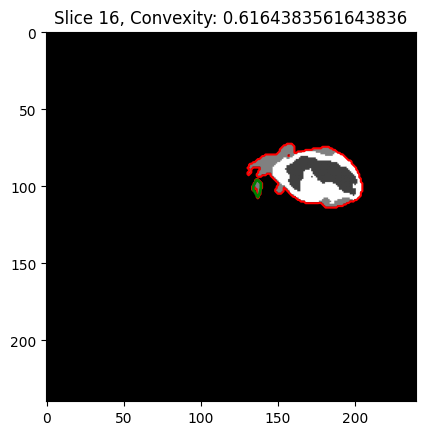

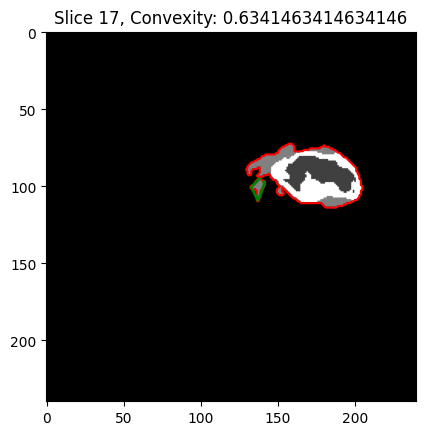

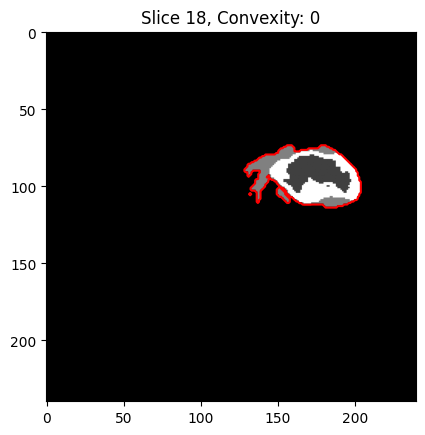

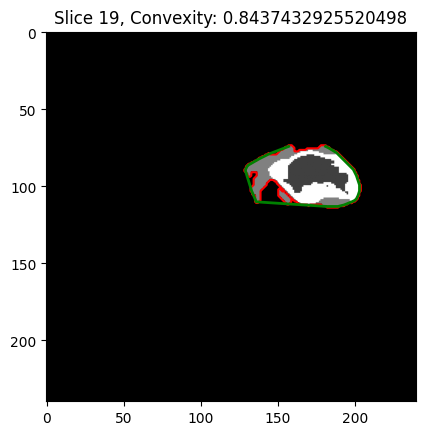

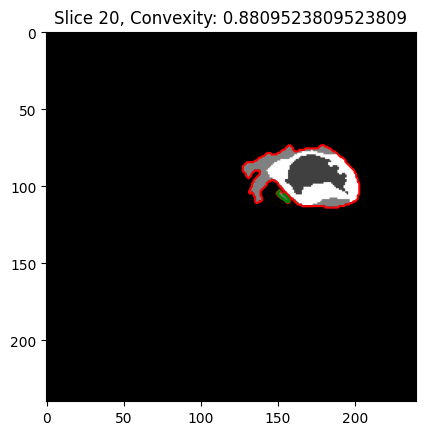

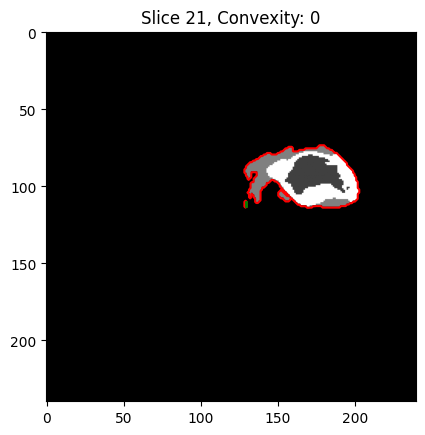

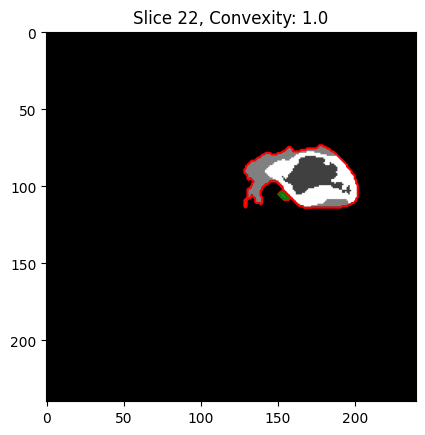

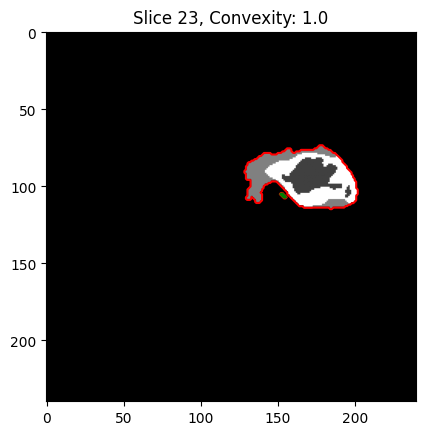

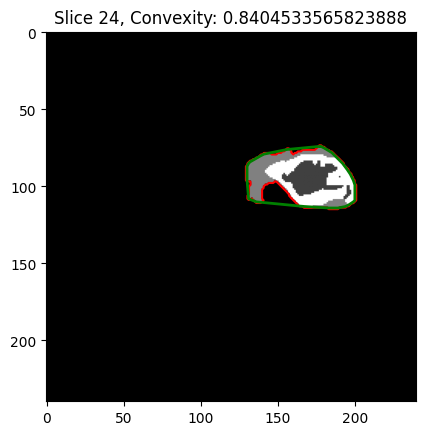

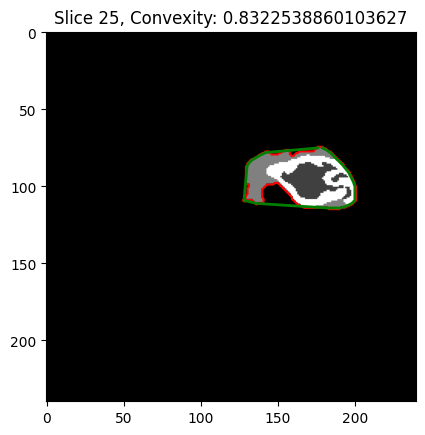

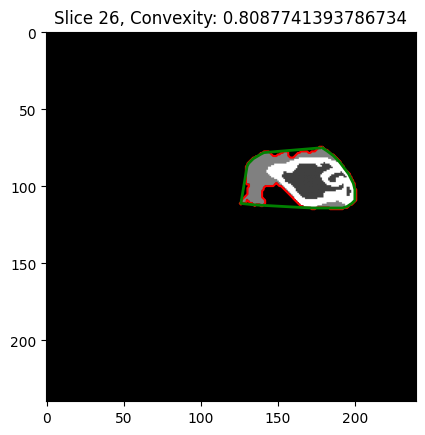

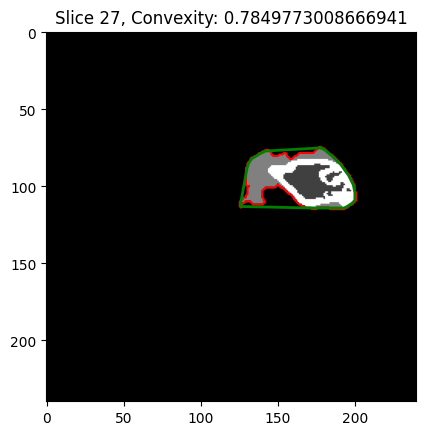

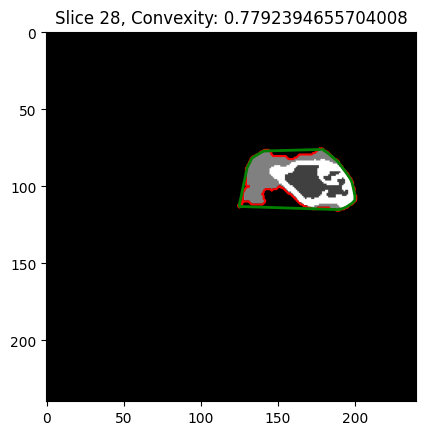

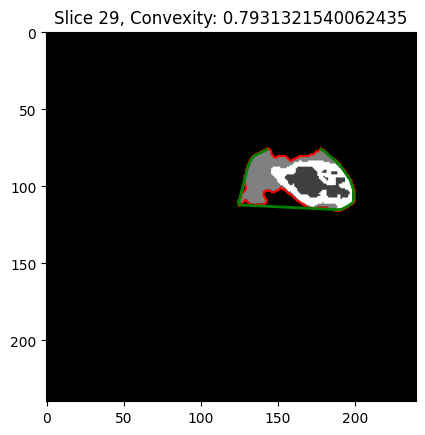

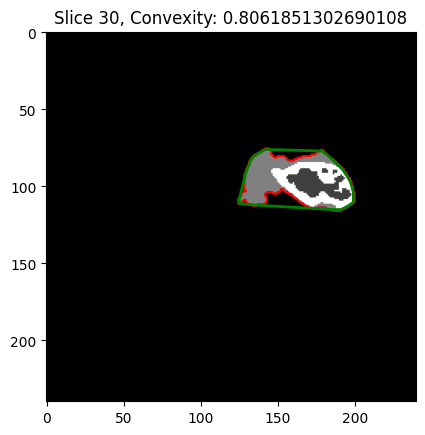

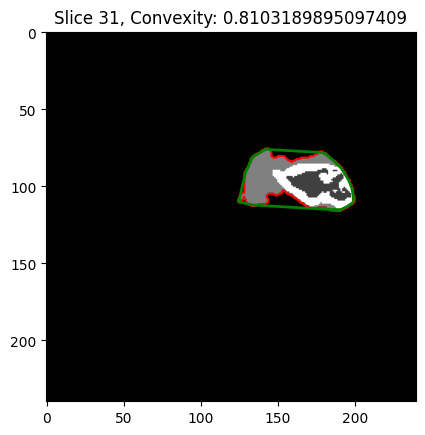

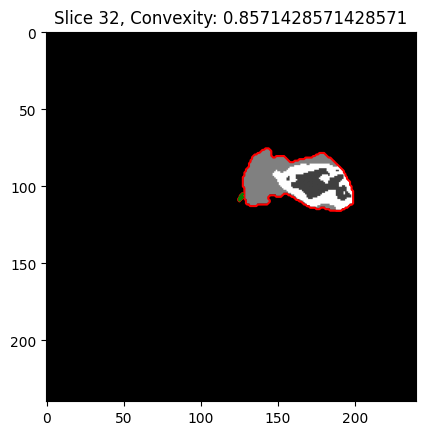

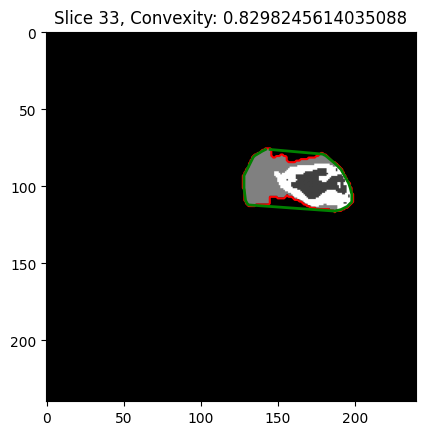

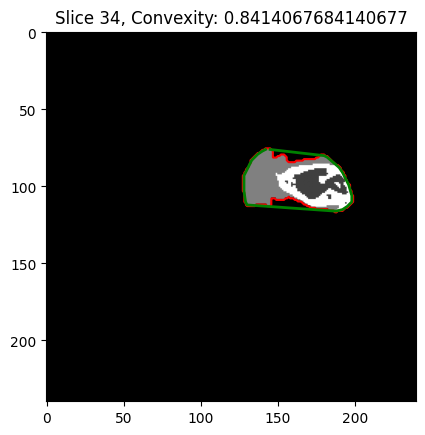

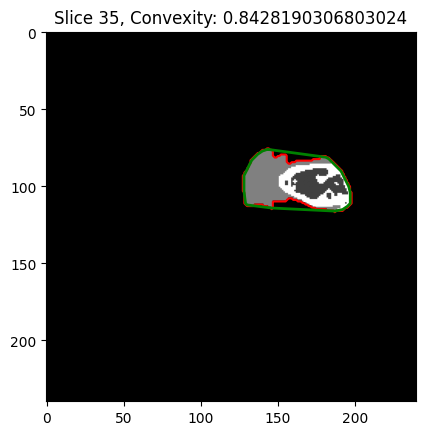

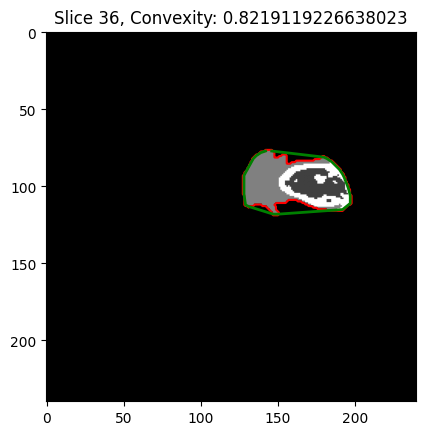

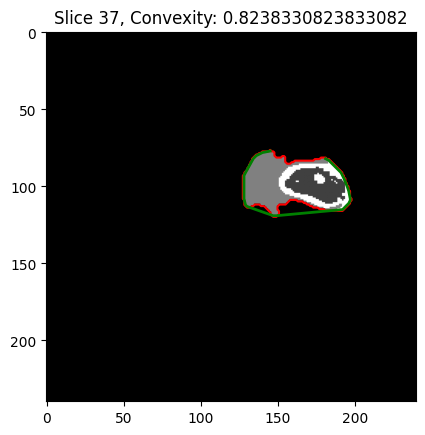

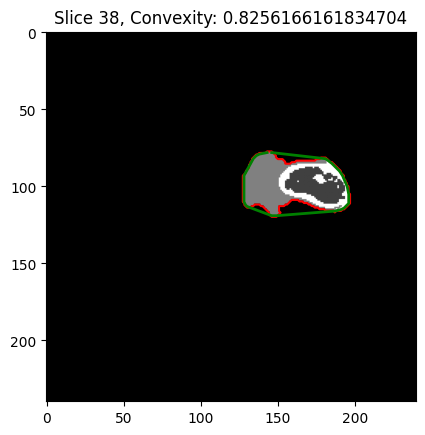

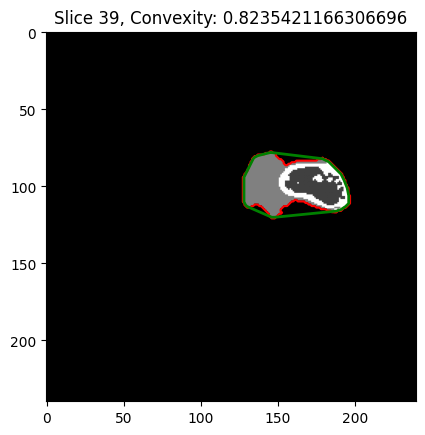

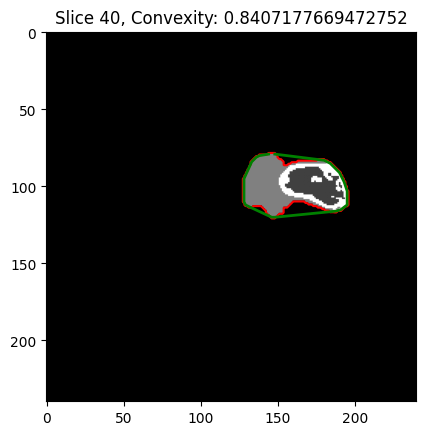

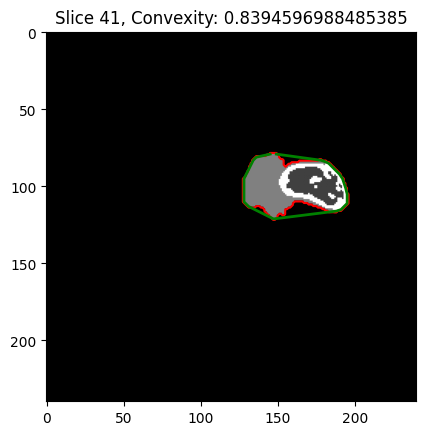

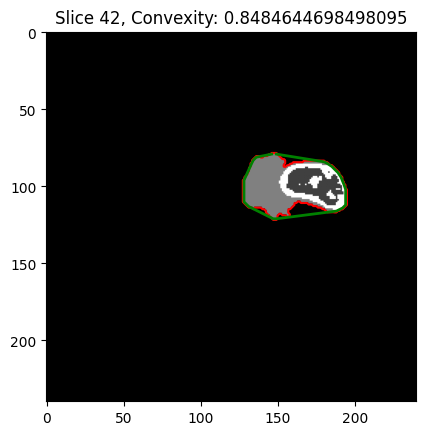

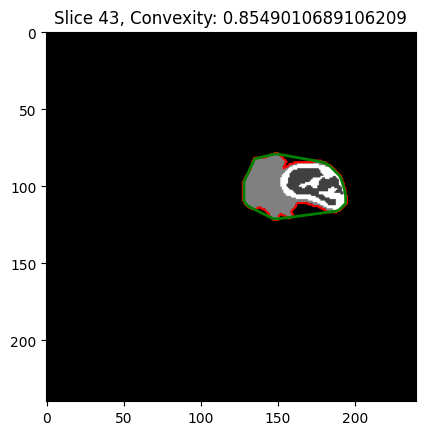

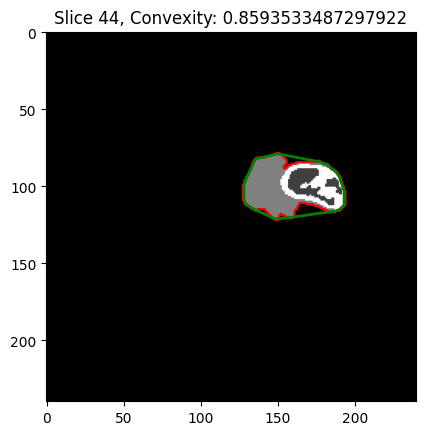

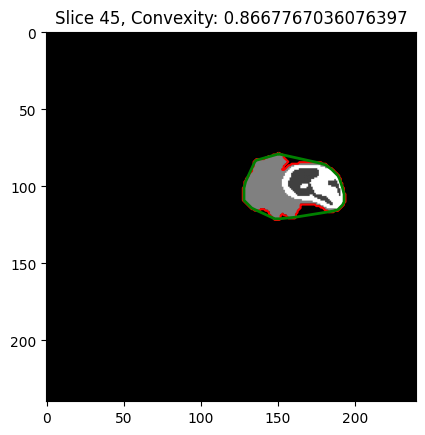

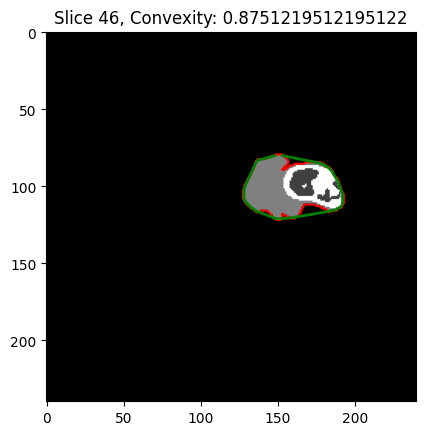

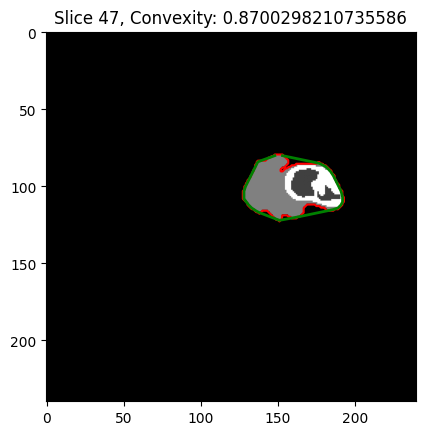

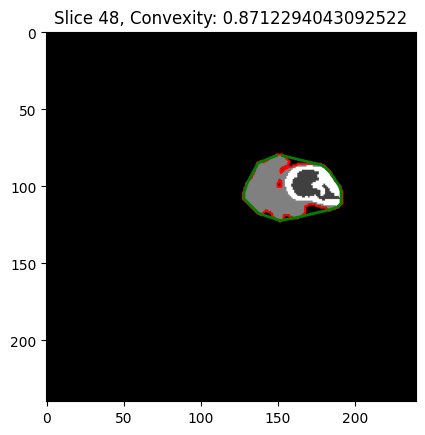

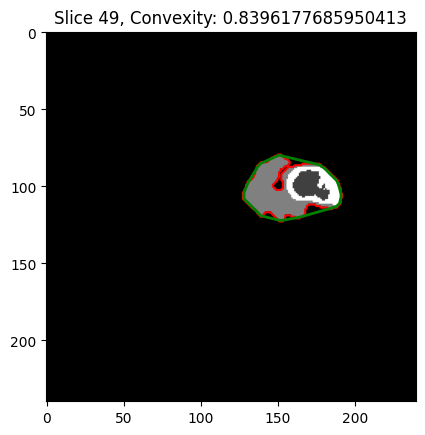

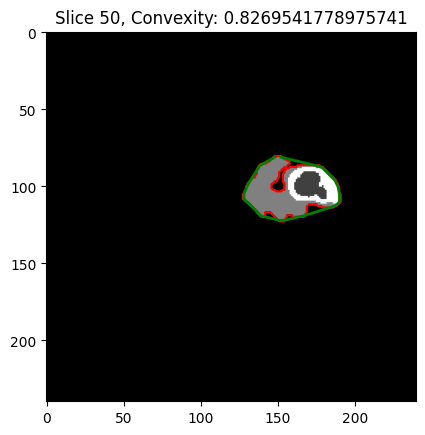

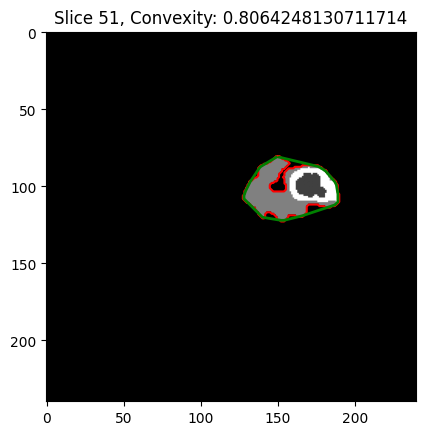

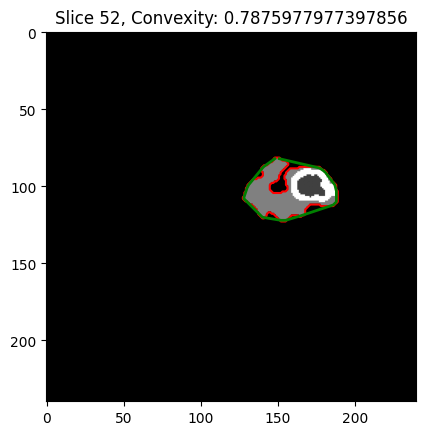

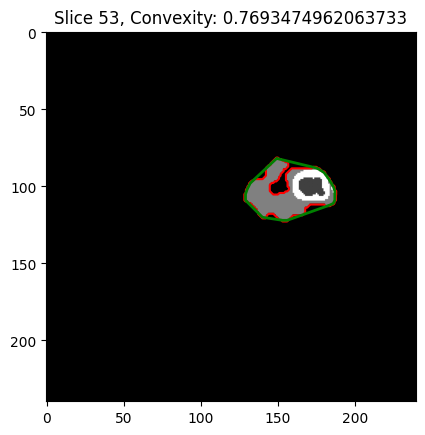

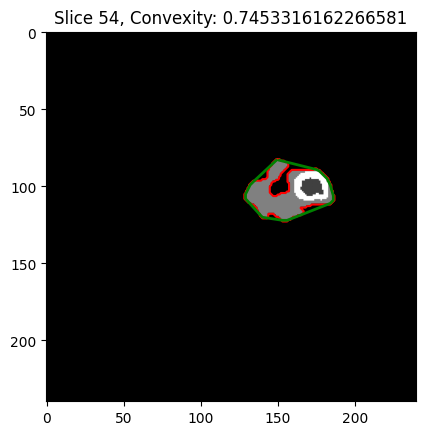

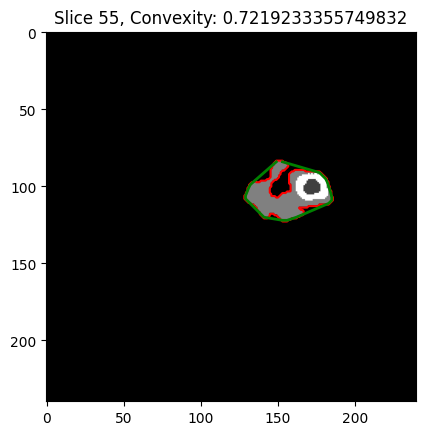

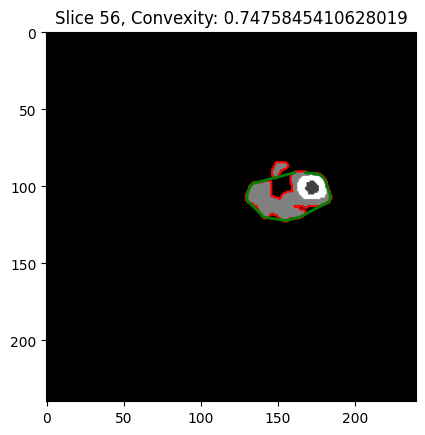

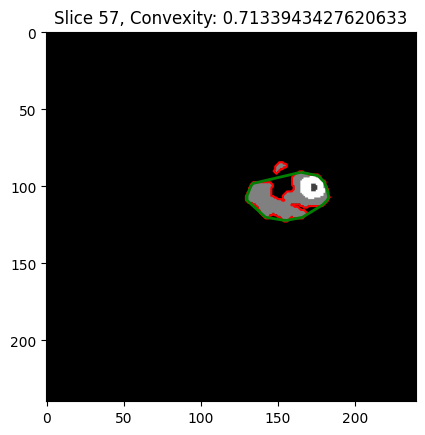

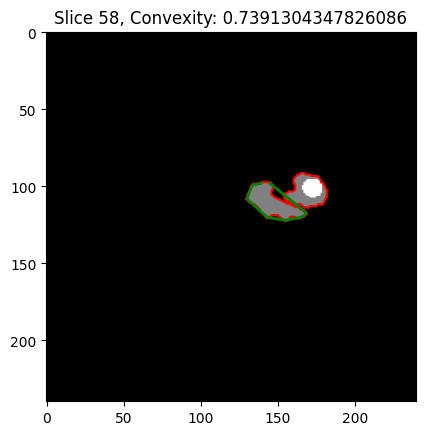

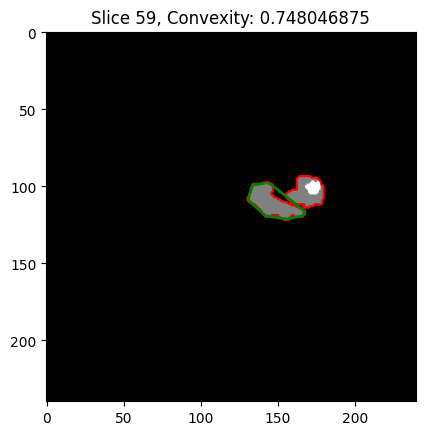

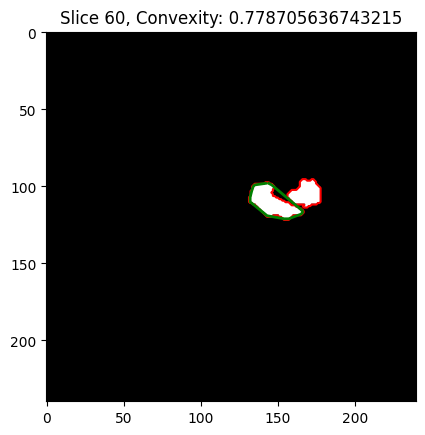

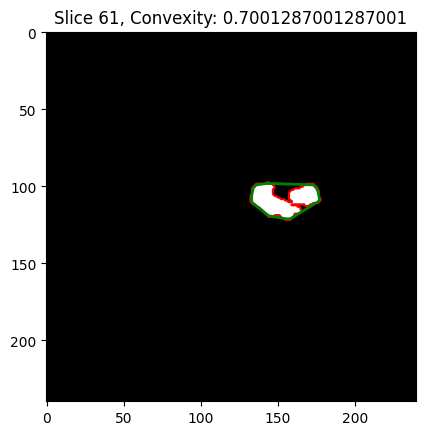

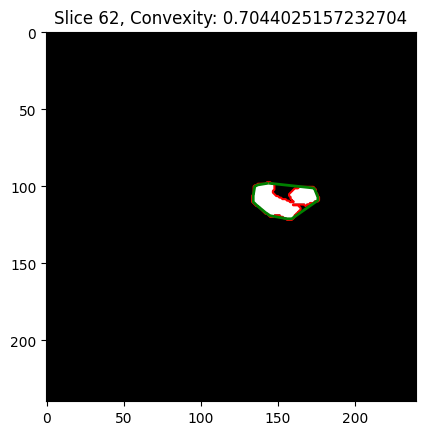

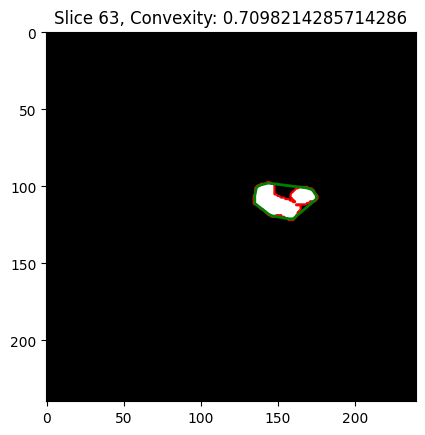

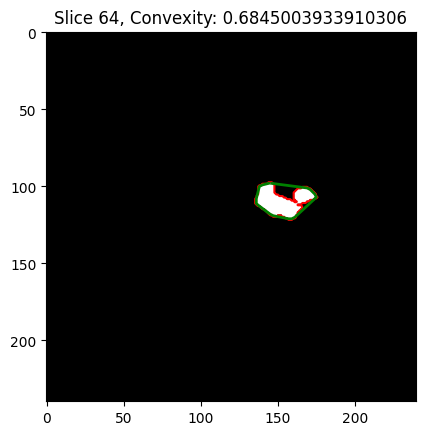

[0, 0.9846153846153847, 0.9368770764119602, 0.9863013698630136, 0.7580786026200873, 0, 0.8, 0.7449376947040498, 0.7785039941902687, 0.7903439153439153, 0.8092994030788564, 0.8119306494269762, 0, 0.8, 0.7619047619047619, 0.5686274509803921, 0.6164383561643836, 0.6341463414634146, 0, 0.8437432925520498, 0.8809523809523809, 0, 1.0, 1.0, 0.8404533565823888, 0.8322538860103627, 0.8087741393786734, 0.7849773008666941, 0.7792394655704008, 0.7931321540062435, 0.8061851302690108, 0.8103189895097409, 0.8571428571428571, 0.8298245614035088, 0.8414067684140677, 0.8428190306803024, 0.8219119226638023, 0.8238330823833082, 0.8256166161834704, 0.8235421166306696, 0.8407177669472752, 0.8394596988485385, 0.8484644698498095, 0.8549010689106209, 0.8593533487297922, 0.8667767036076397, 0.8751219512195122, 0.8700298210735586, 0.8712294043092522, 0.8396177685950413, 0.8269541778975741, 0.8064248130711714, 0.7875977977397856, 0.7693474962063733, 0.7453316162266581, 0.7219233355749832, 0.7475845410628019, 0.71

In [20]:


convexity_values = []


for i in range(nii_data.shape[-1]):
    slice_data = nii_data[:, :, i]

    contours, _ = cv2.findContours((slice_data > 0).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        convex_hull = cv2.convexHull(contours[0])
        contour_area = cv2.contourArea(contours[0])
        convex_hull_area = cv2.contourArea(convex_hull)

   
        if convex_hull_area > 0:

            convexity = contour_area / convex_hull_area
            convexity_values.append(convexity)
        else:
            convexity_values.append(0)
    else:

        convexity_values.append(0)
    plt.figure()
    plt.imshow(slice_data, cmap='gray')
    plt.contour(slice_data, levels=[0.5], colors='r') 
    plt.plot(convex_hull[:, 0, 0], convex_hull[:, 0, 1], 'g', linewidth=2) 
    plt.title(f"Slice {i}, Convexity: {convexity_values[-1]}")
    plt.show()


# RECTANGULARITY

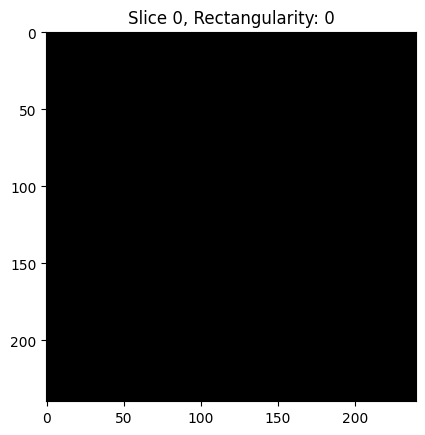

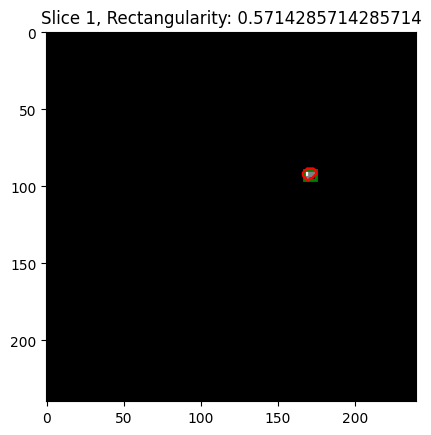

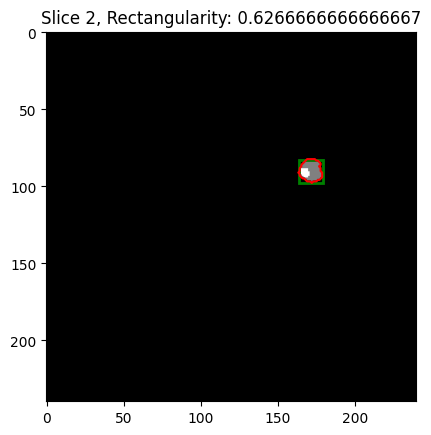

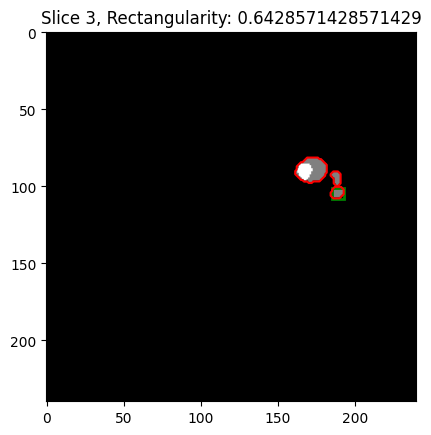

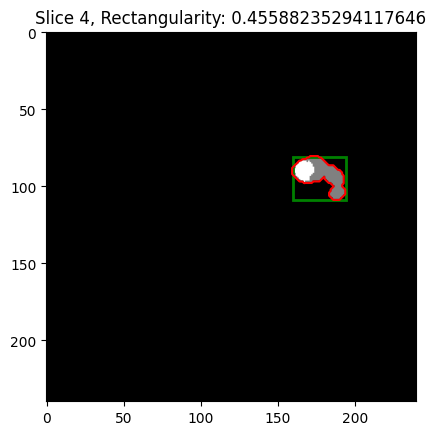

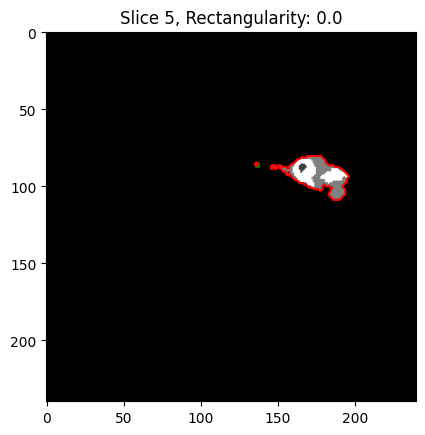

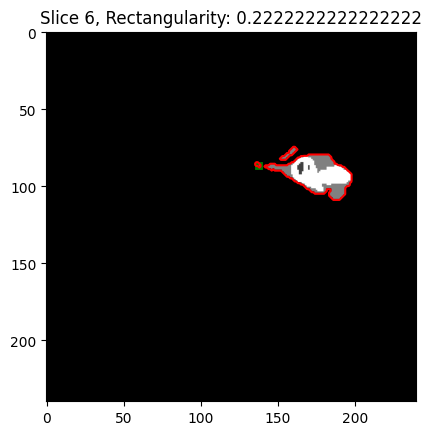

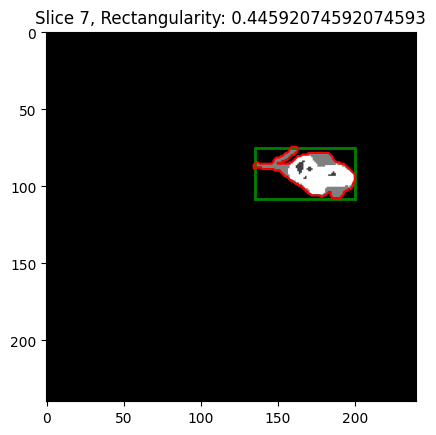

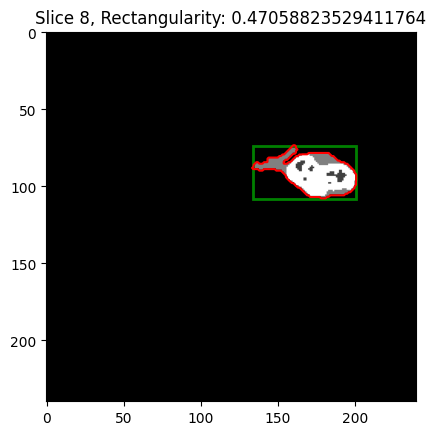

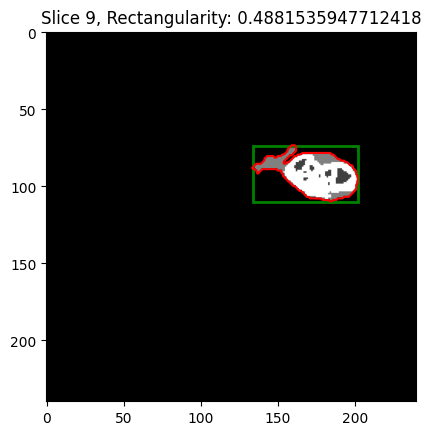

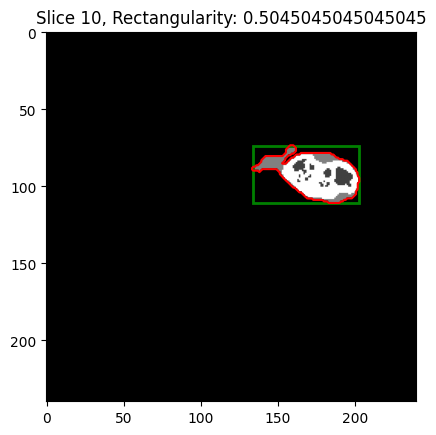

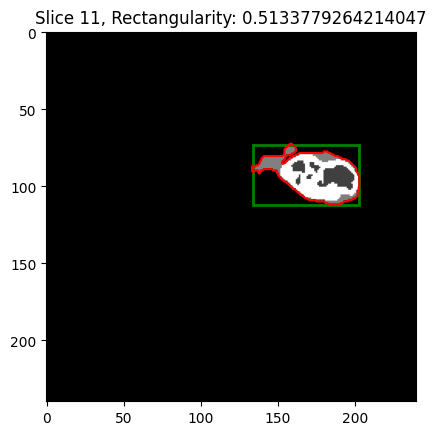

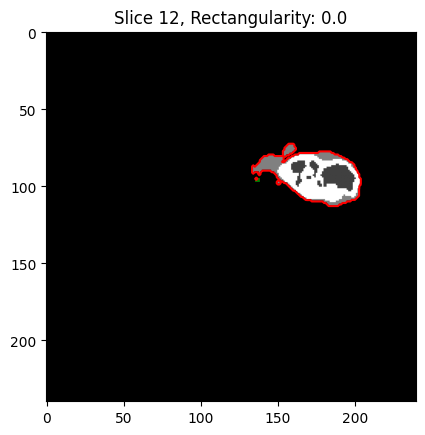

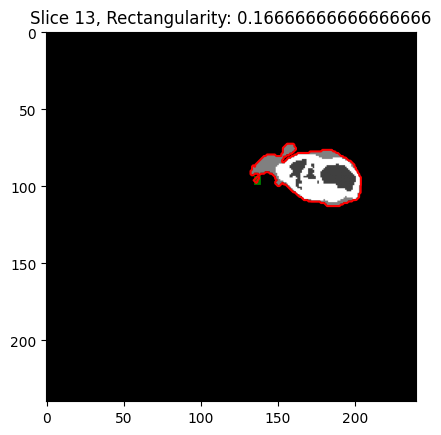

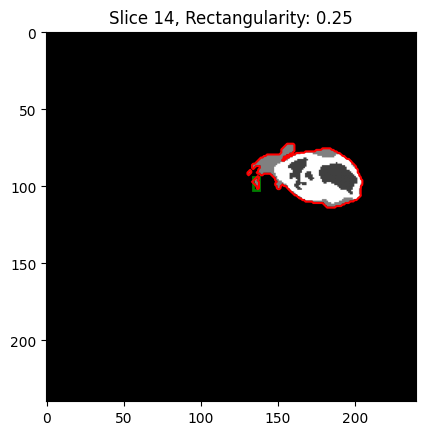

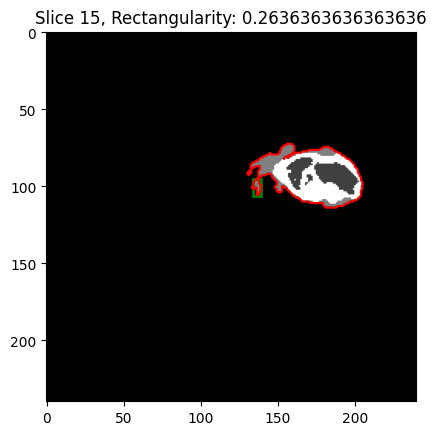

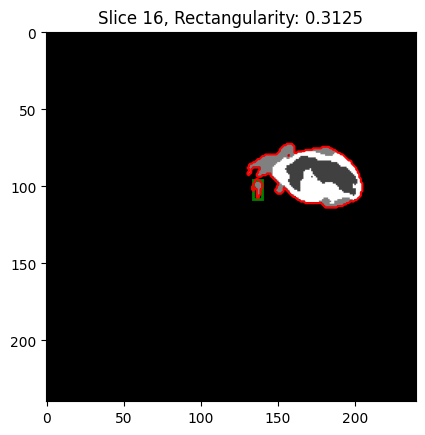

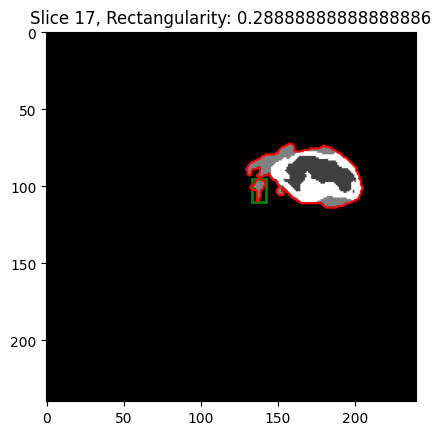

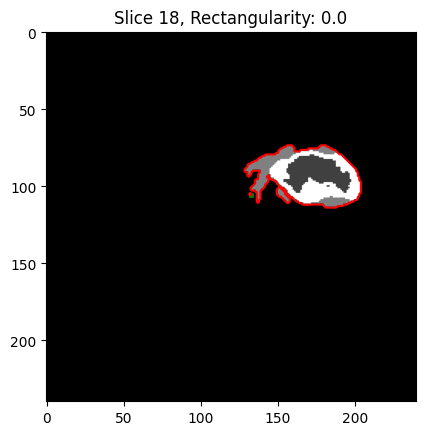

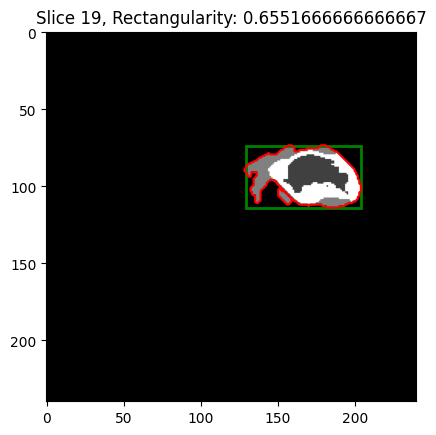

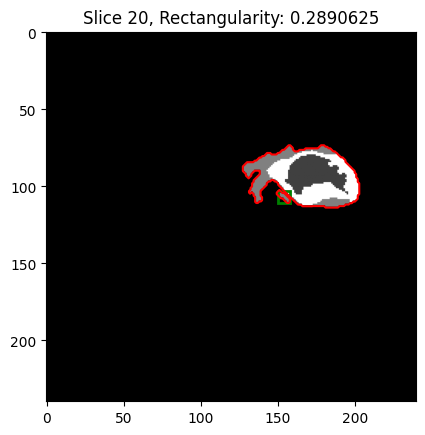

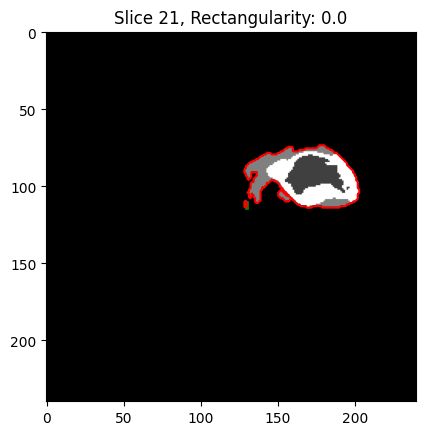

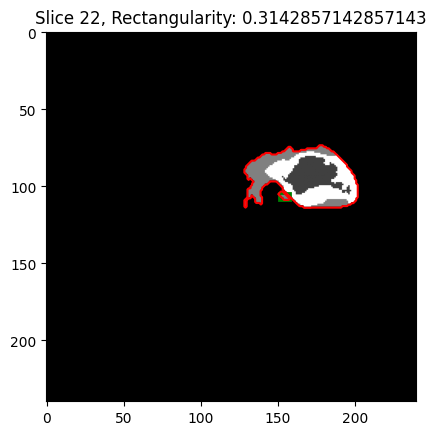

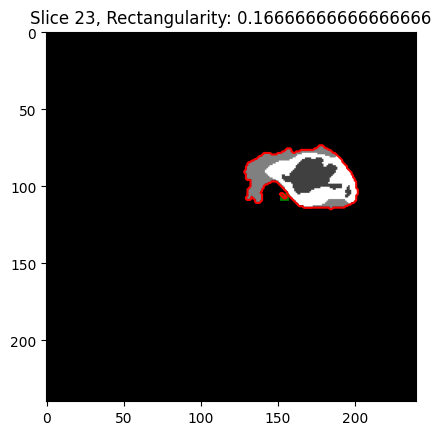

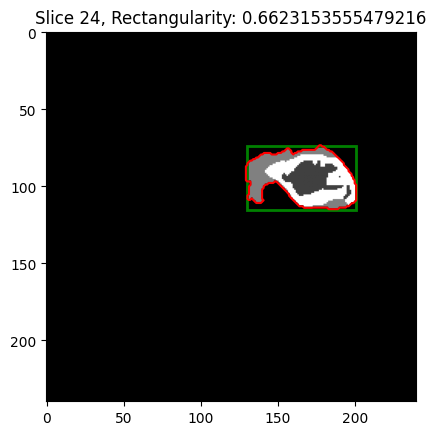

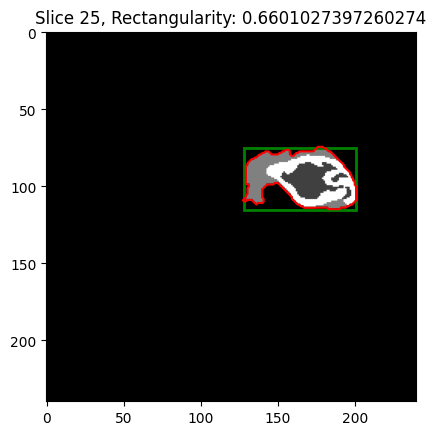

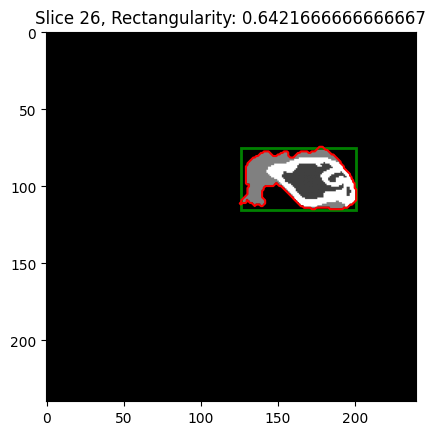

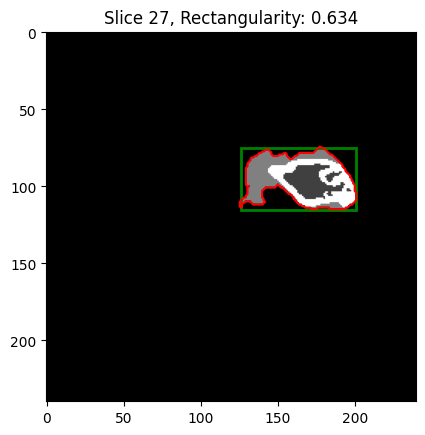

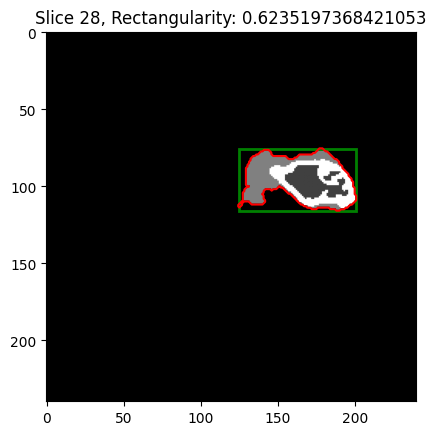

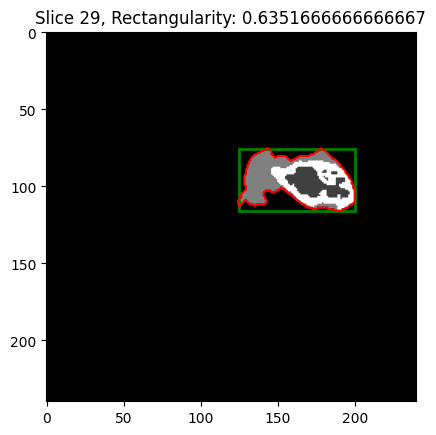

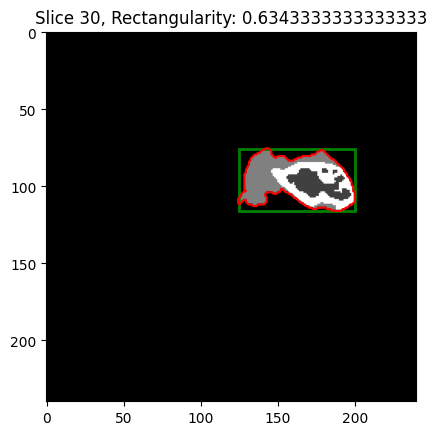

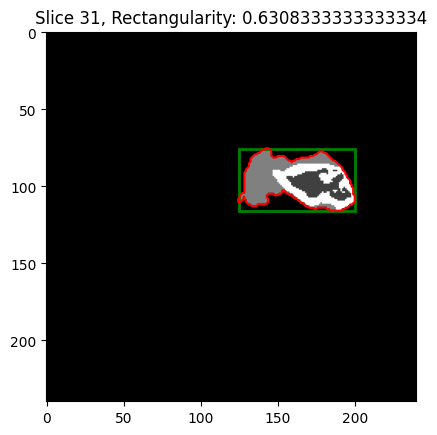

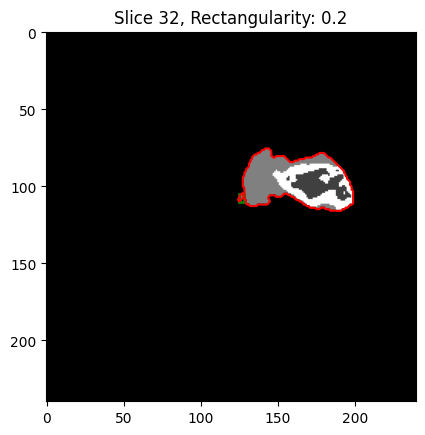

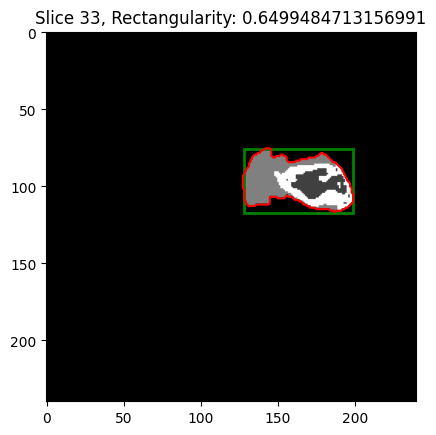

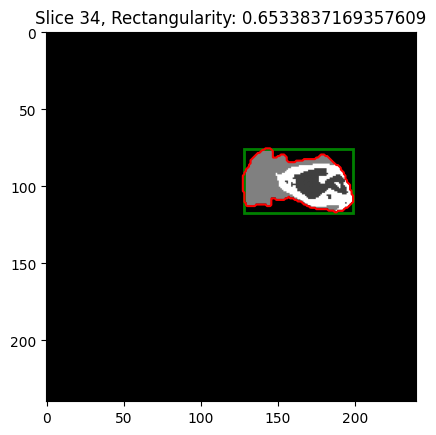

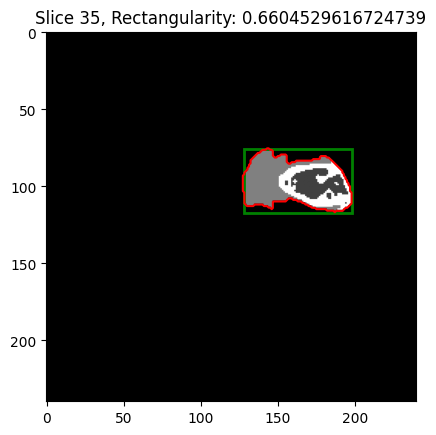

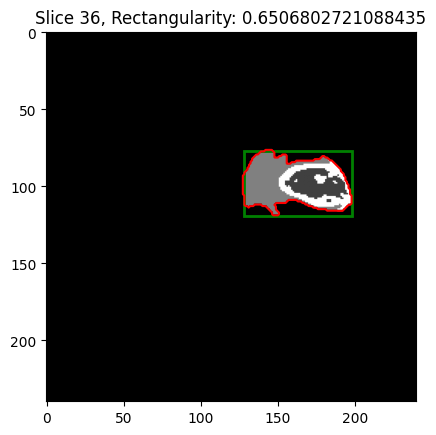

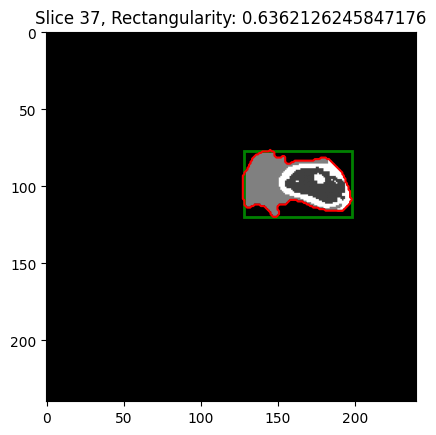

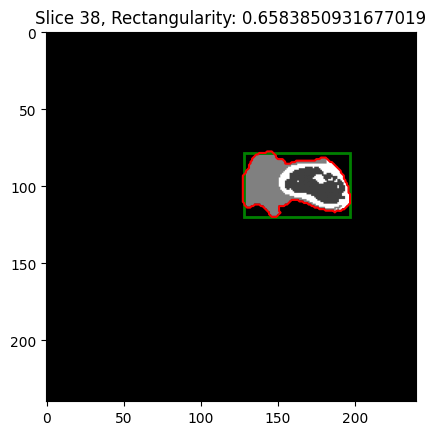

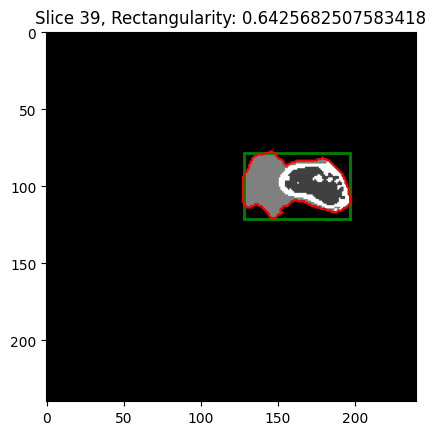

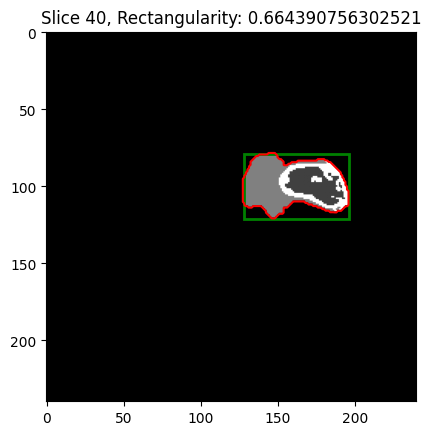

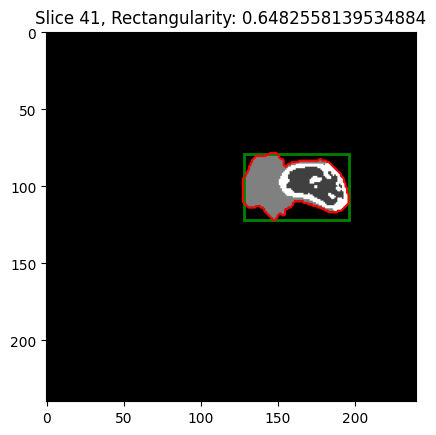

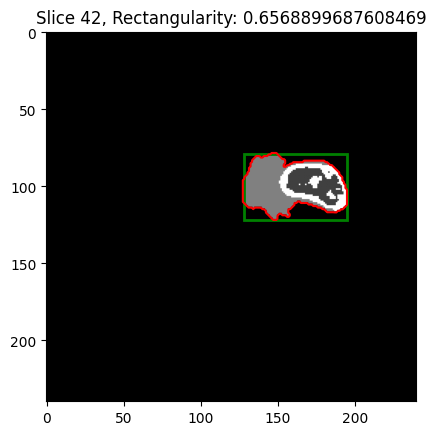

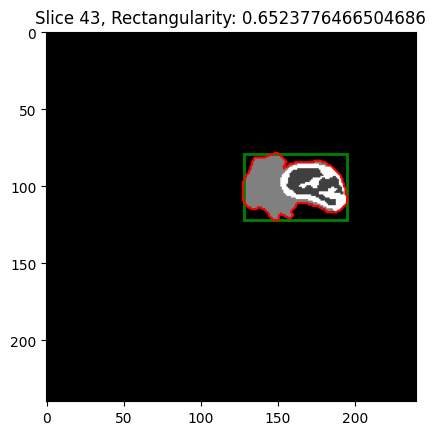

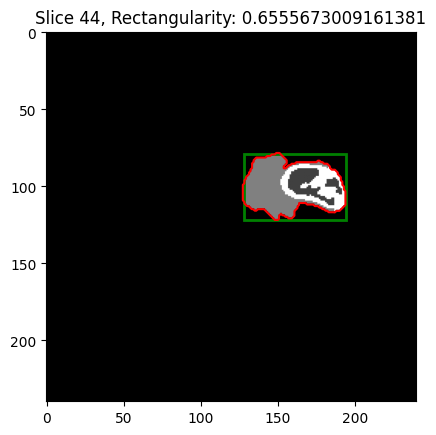

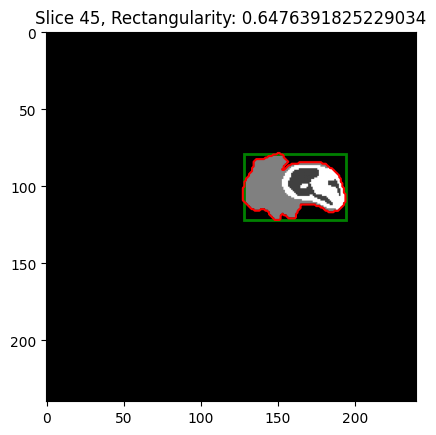

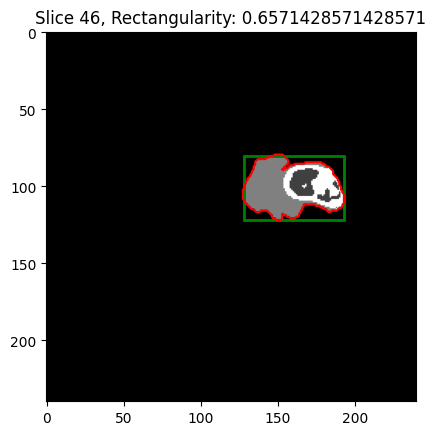

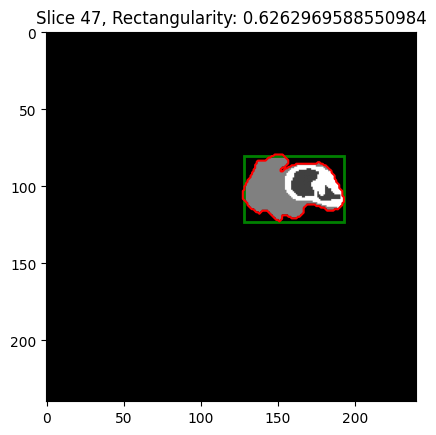

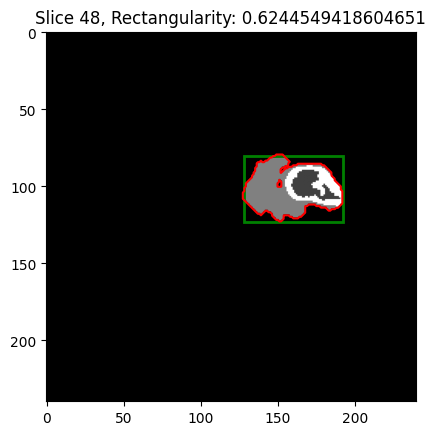

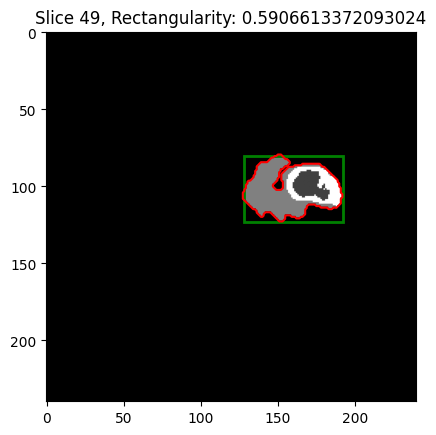

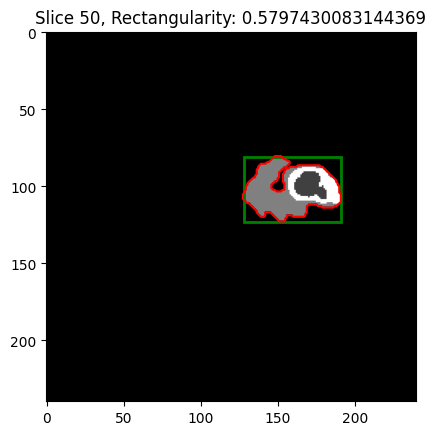

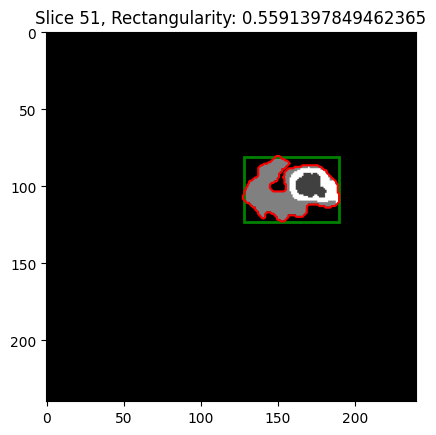

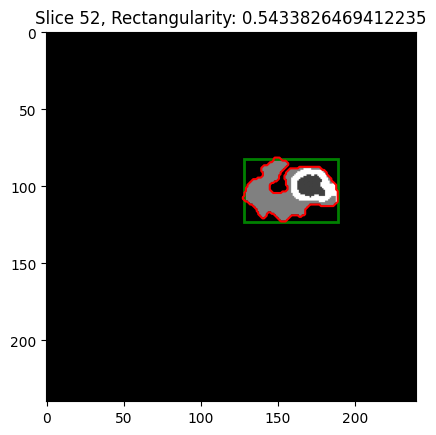

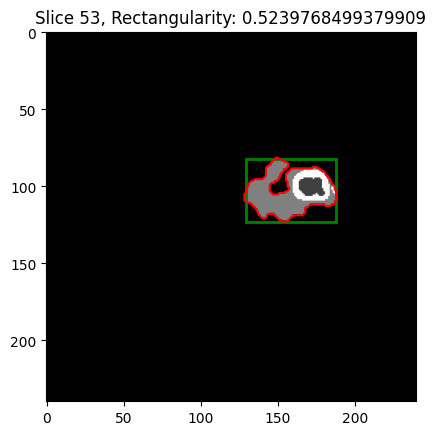

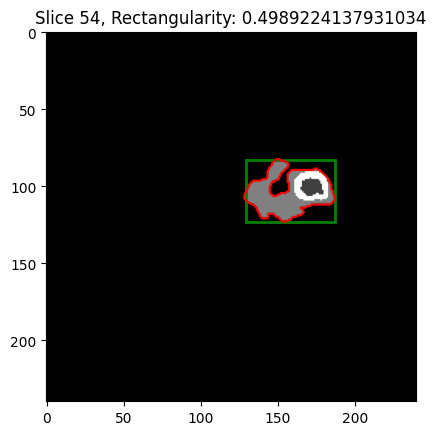

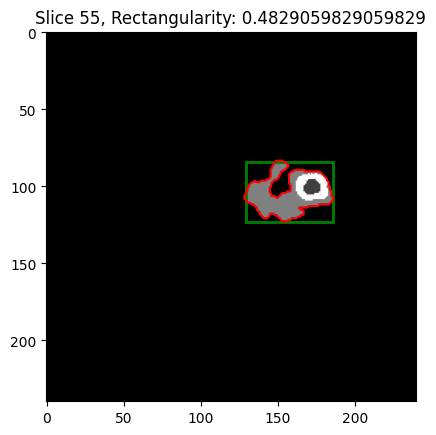

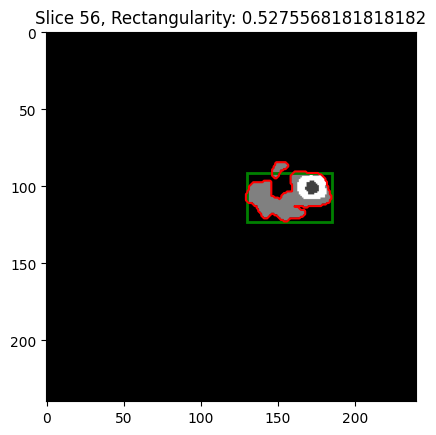

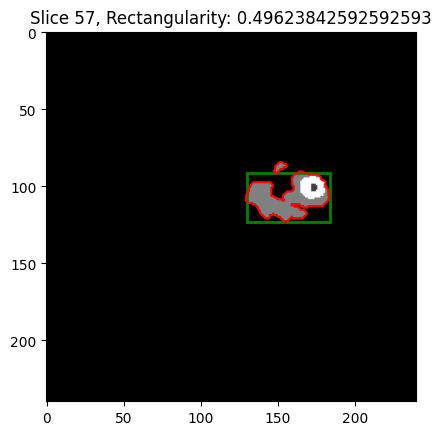

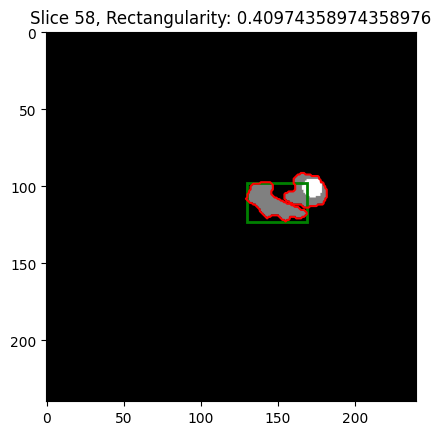

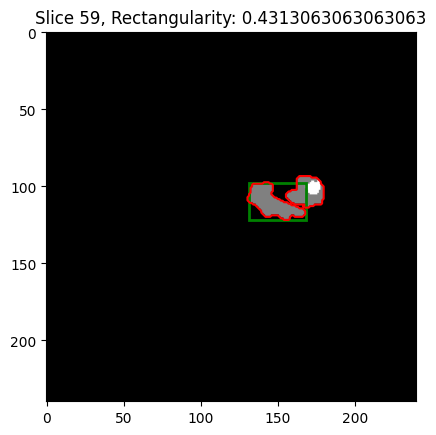

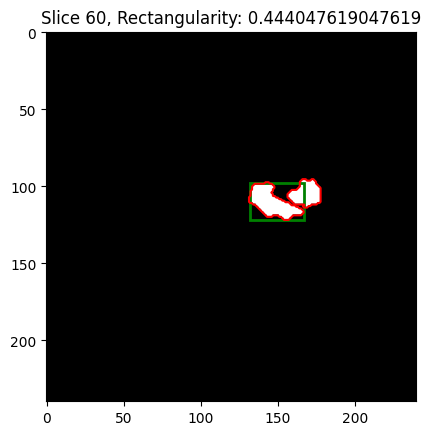

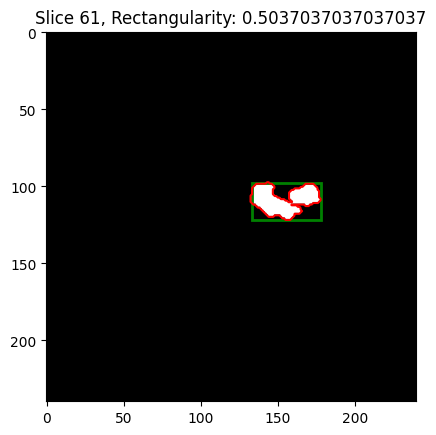

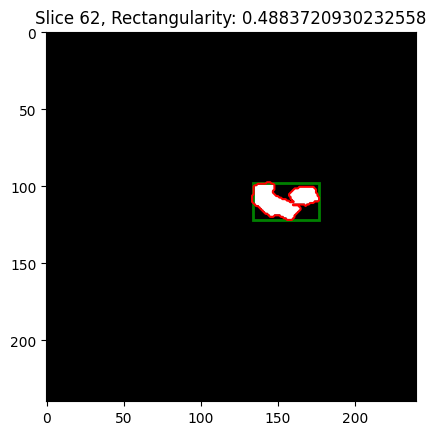

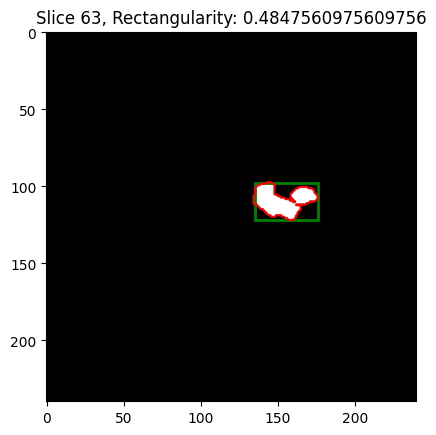

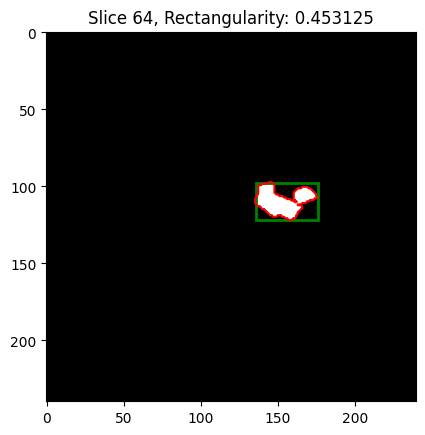

In [25]:
import matplotlib.patches as patches
rectangularity_values = []

for i in range(nii_data.shape[-1]):

    slice_data = nii_data[:, :, i]

    contours, _ = cv2.findContours((slice_data > 0).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = 0, 0, 0, 0


    if len(contours) > 0:
    
        x, y, w, h = cv2.boundingRect(contours[0])
        contour_area = cv2.contourArea(contours[0])
        rectangle_area = w * h
        rectangularity = contour_area / rectangle_area
        rectangularity_values.append(rectangularity)
    else:
        rectangularity_values.append(0)

    plt.figure()
    plt.imshow(slice_data, cmap='gray')
    plt.contour(slice_data, levels=[0.5], colors='r')  
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='g', facecolor='none')
    plt.gca().add_patch(rect)
    plt.title(f"Slice {i}, Rectangularity: {rectangularity_values[-1]}")
    plt.show()



# SOLIDITY

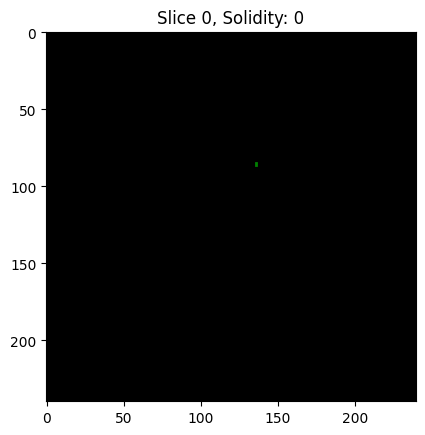

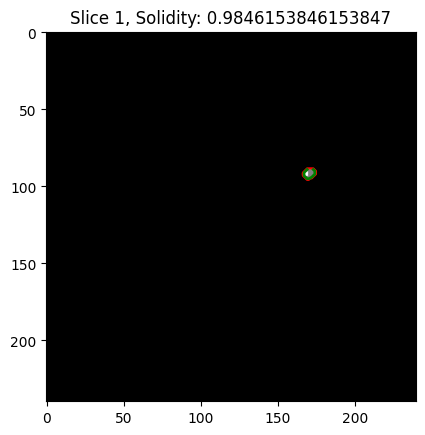

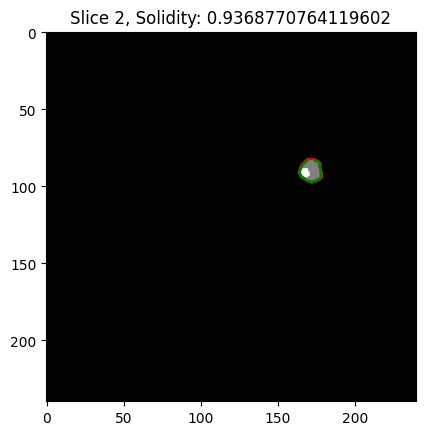

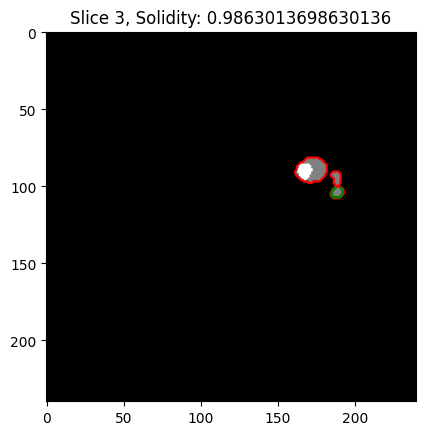

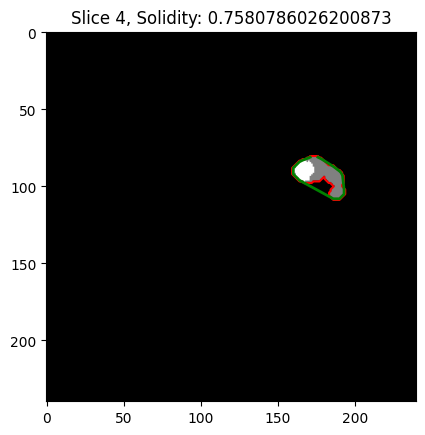

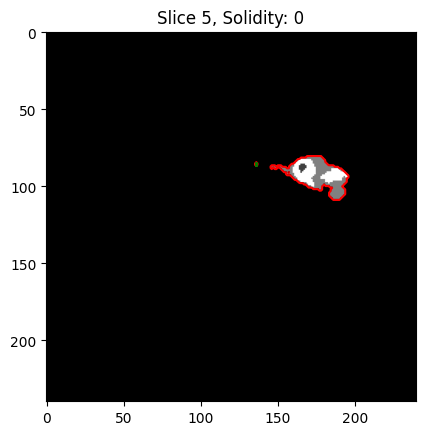

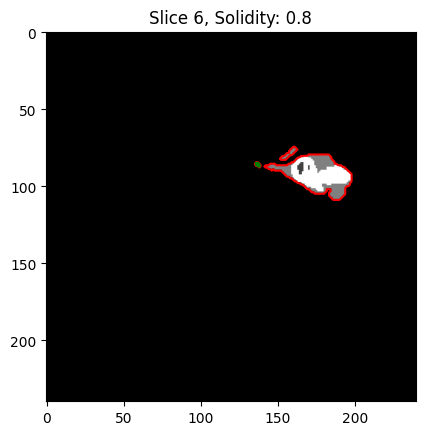

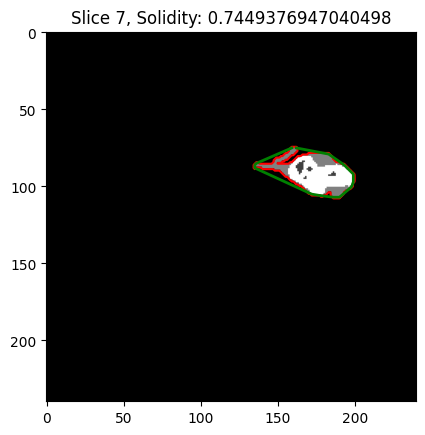

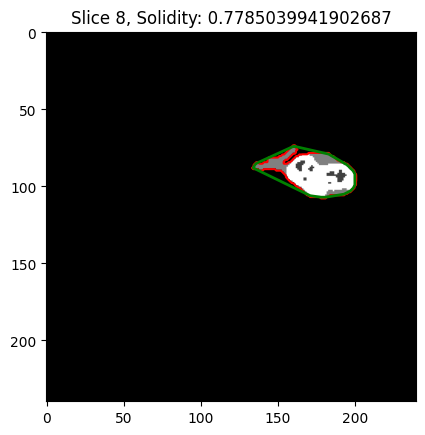

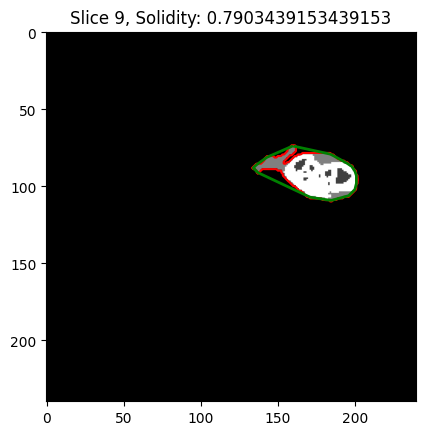

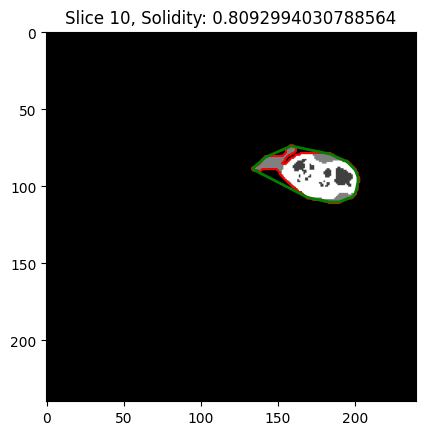

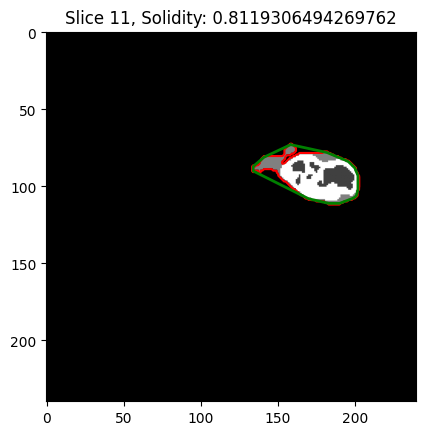

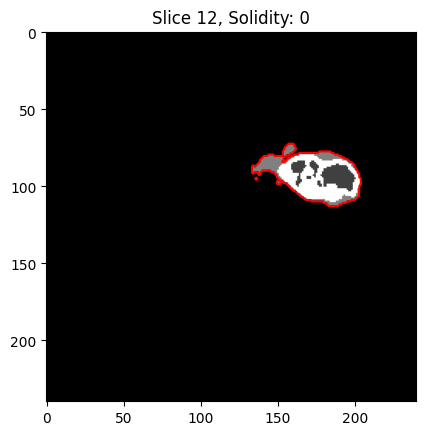

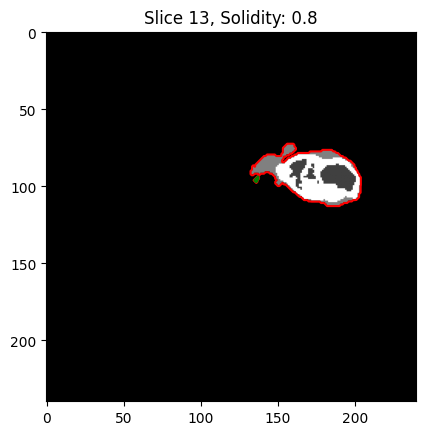

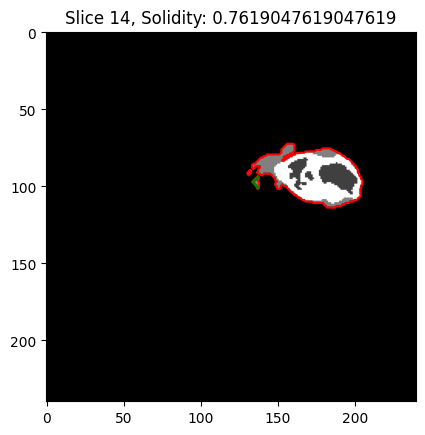

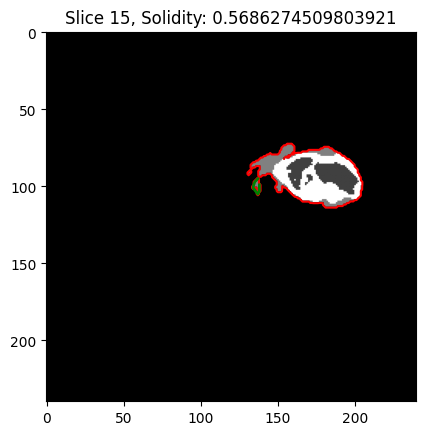

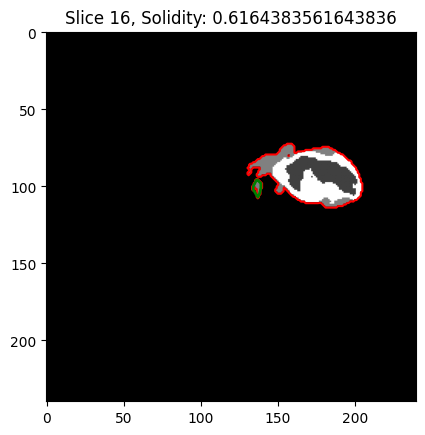

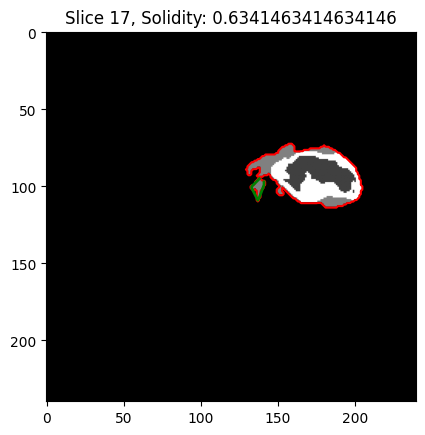

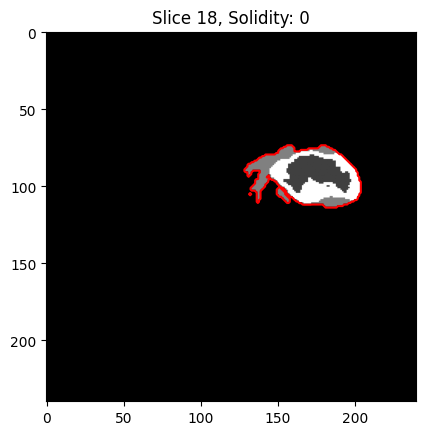

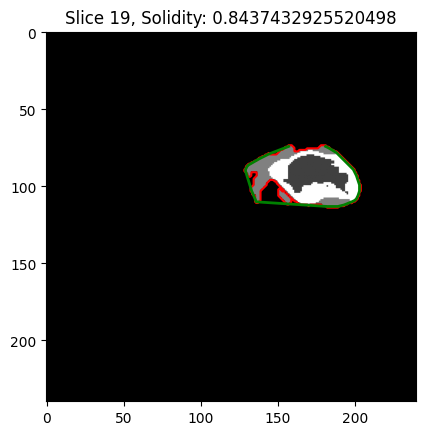

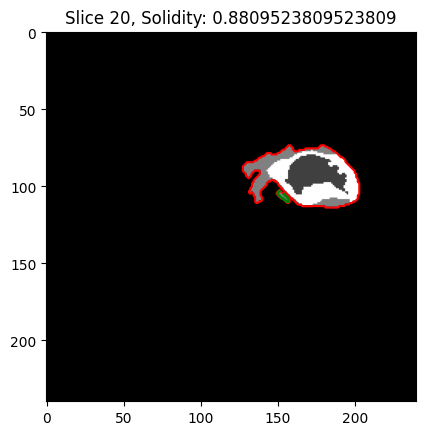

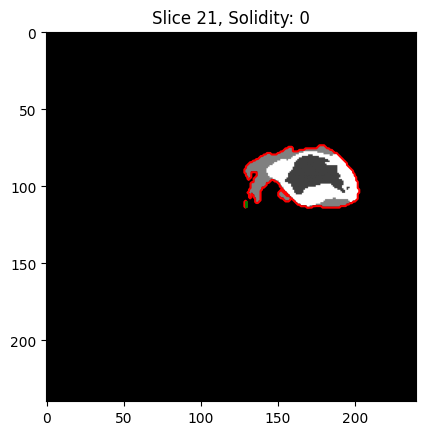

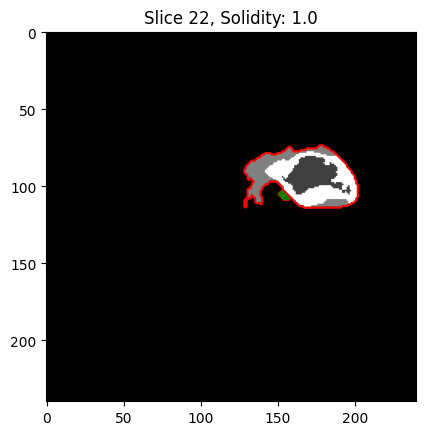

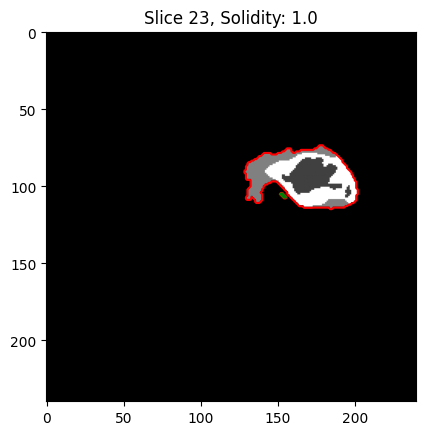

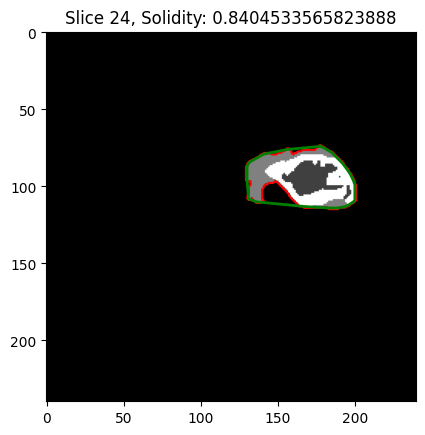

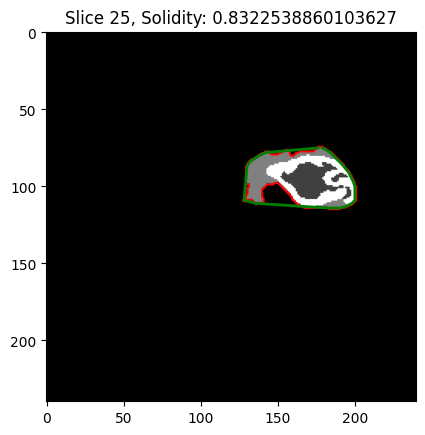

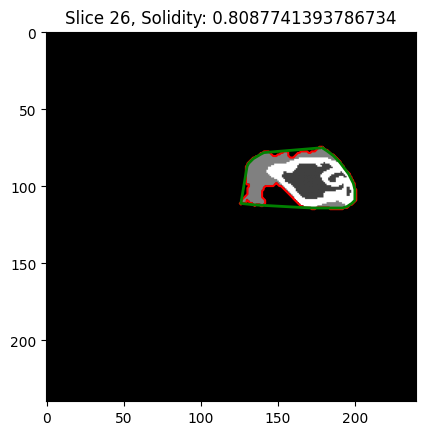

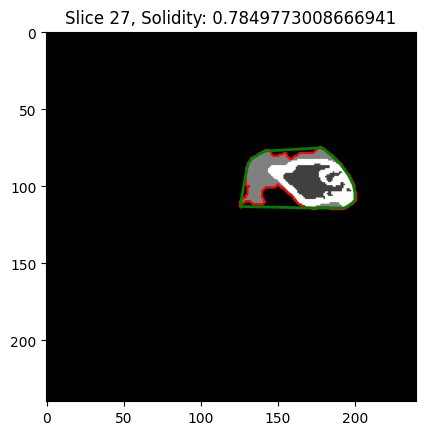

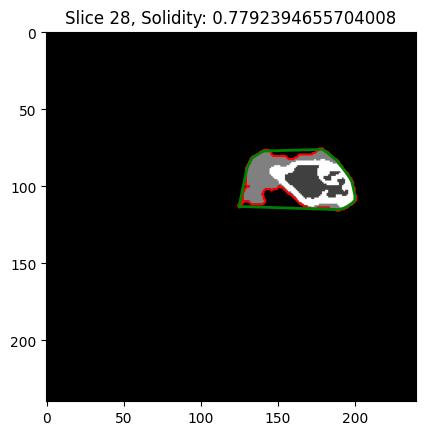

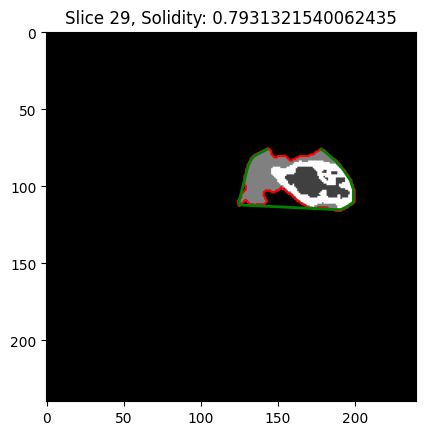

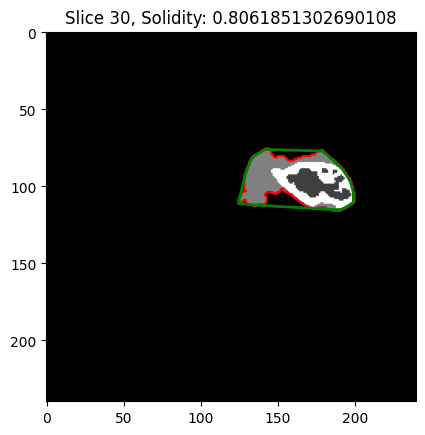

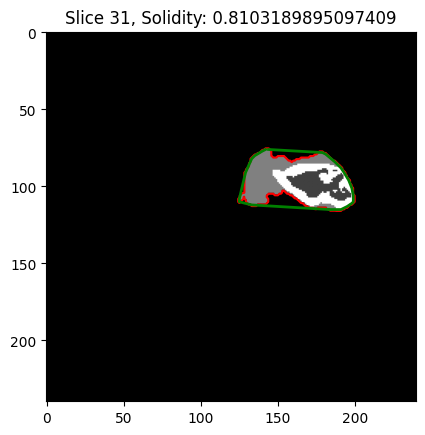

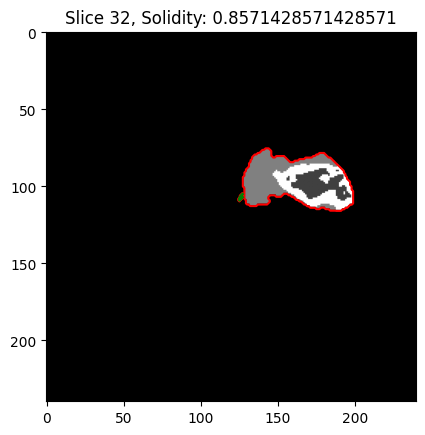

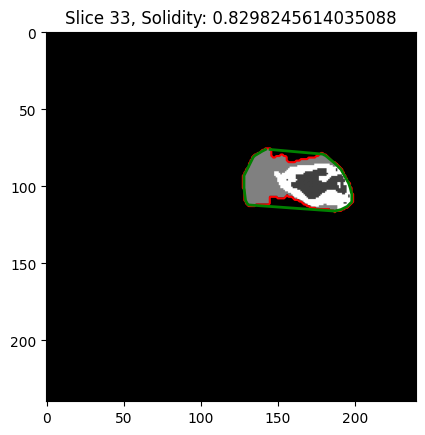

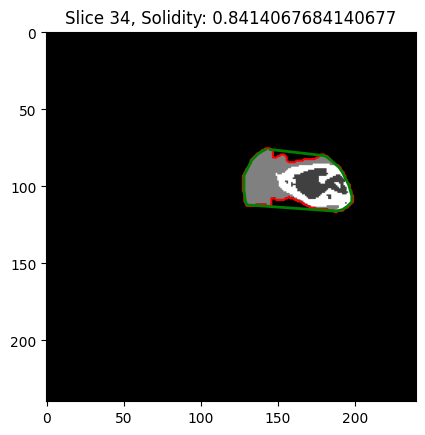

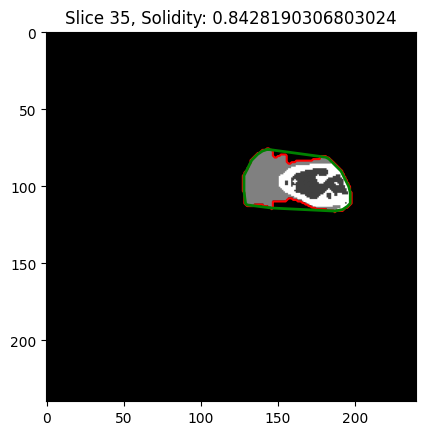

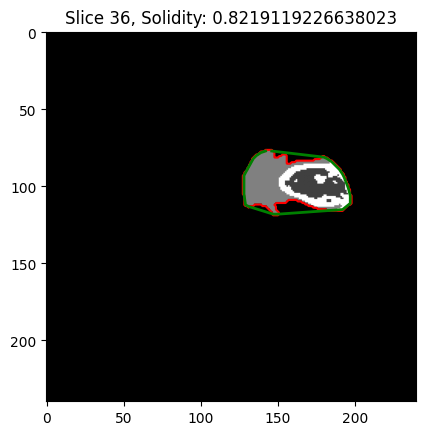

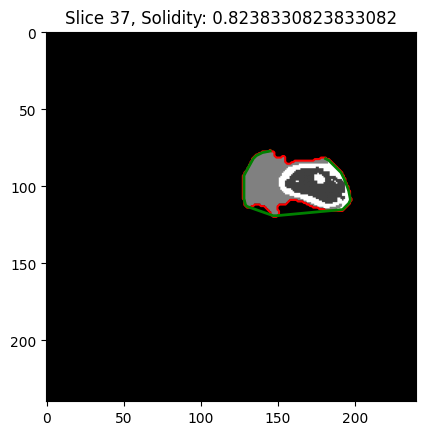

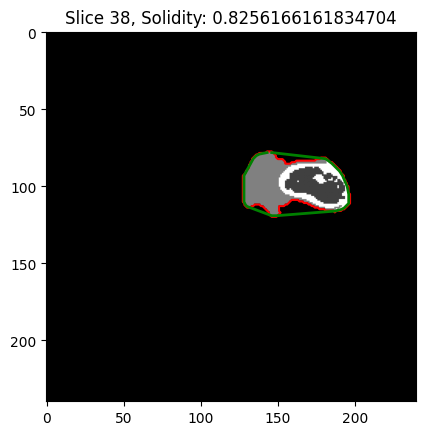

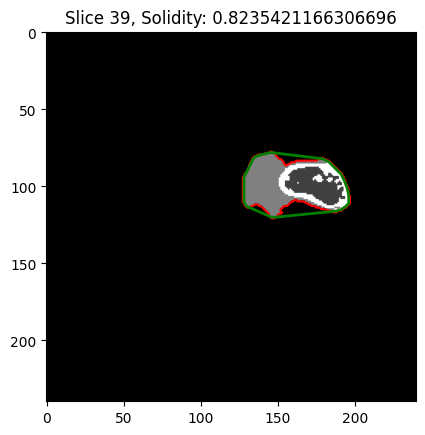

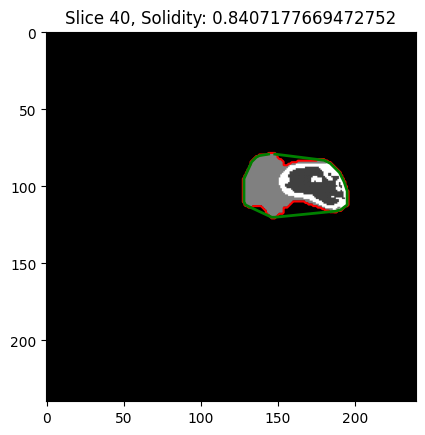

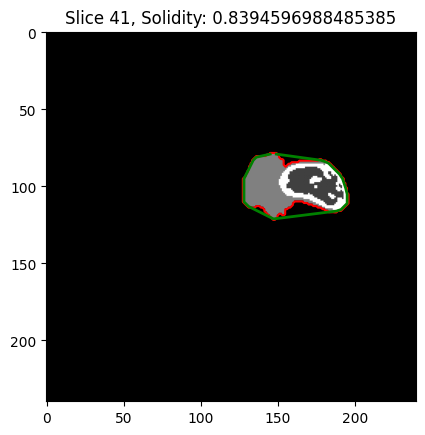

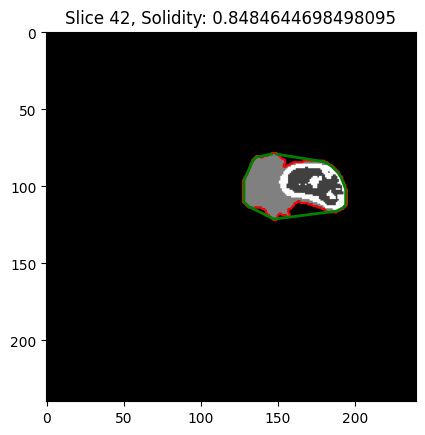

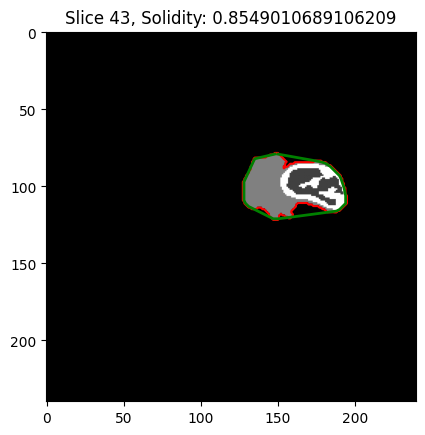

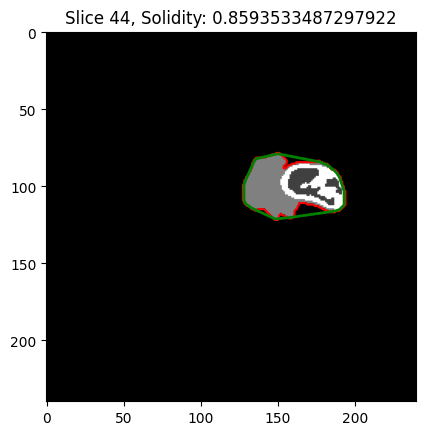

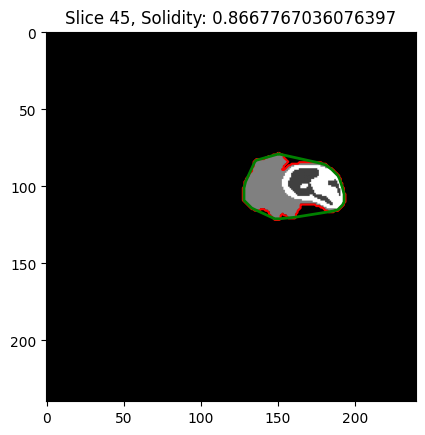

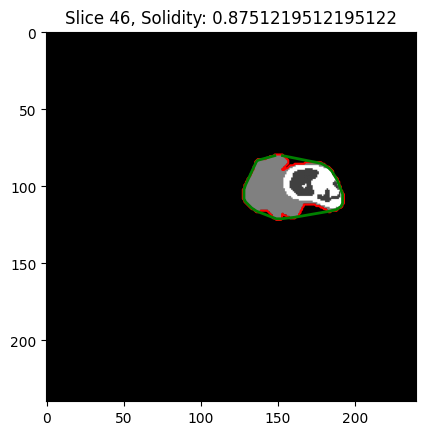

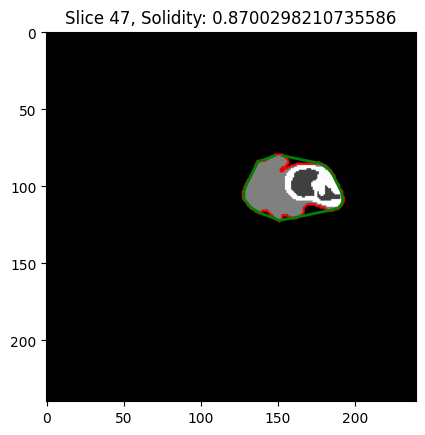

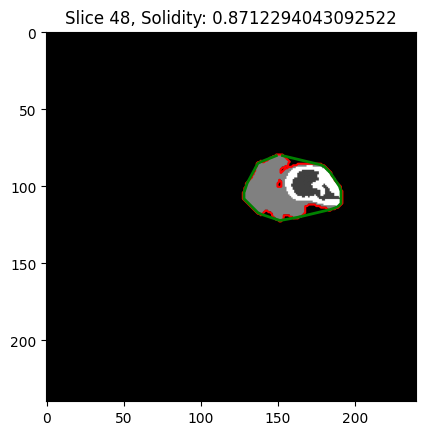

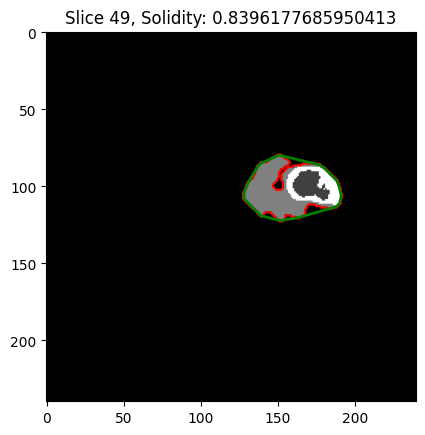

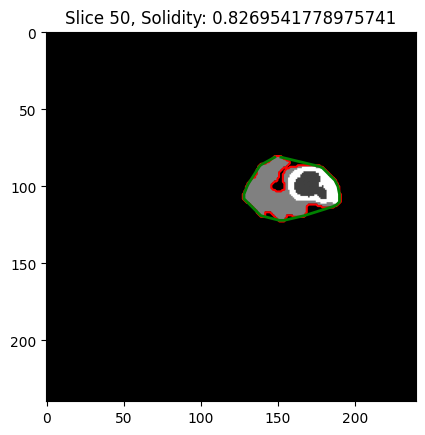

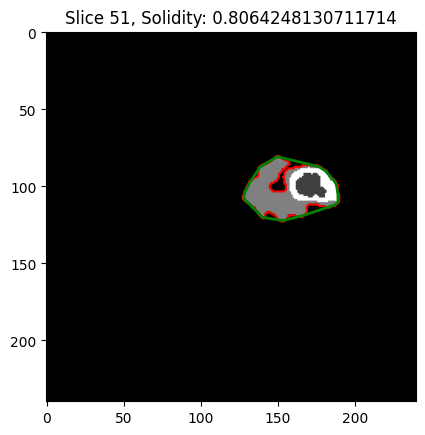

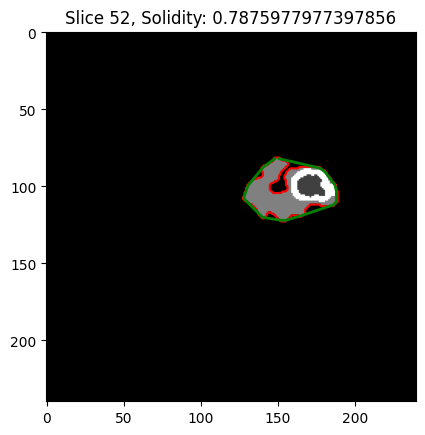

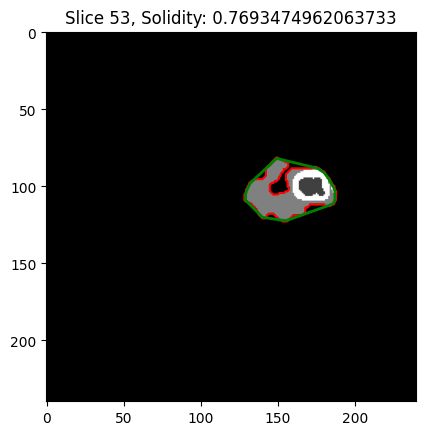

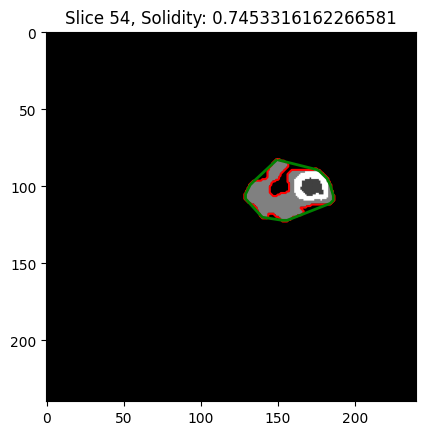

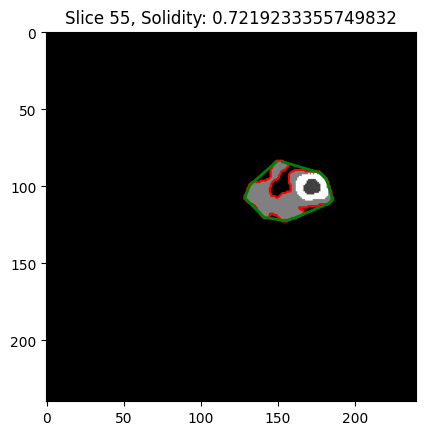

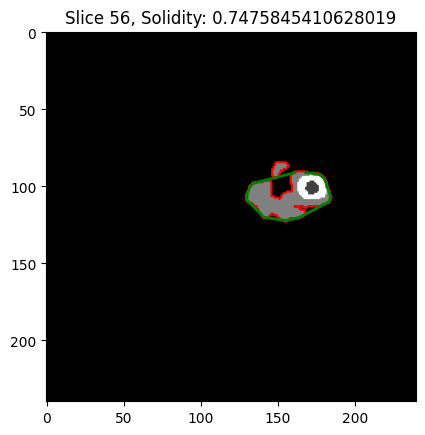

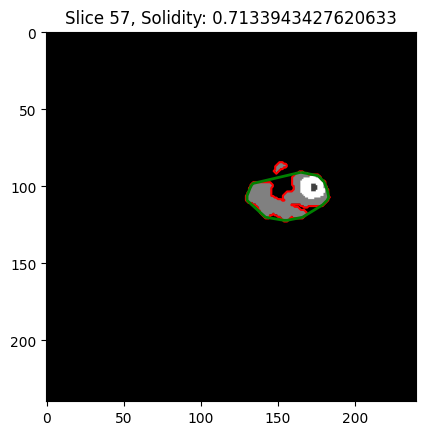

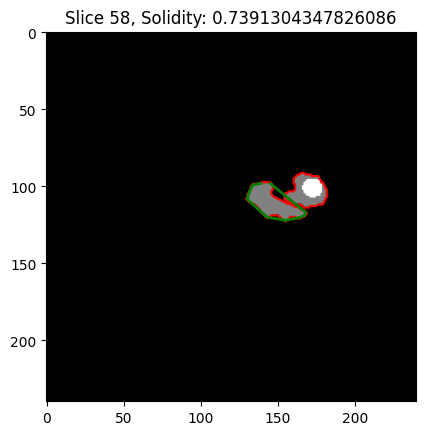

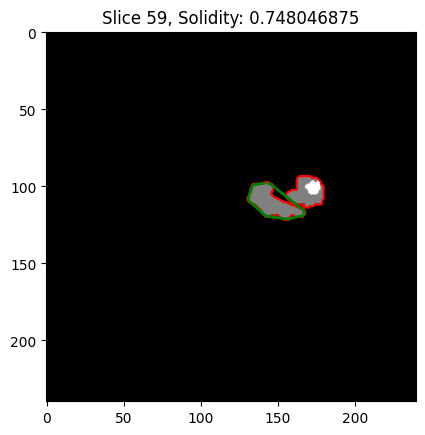

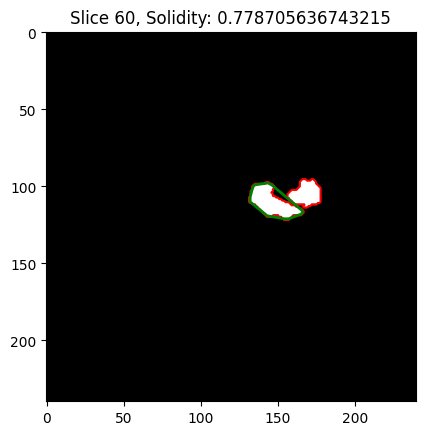

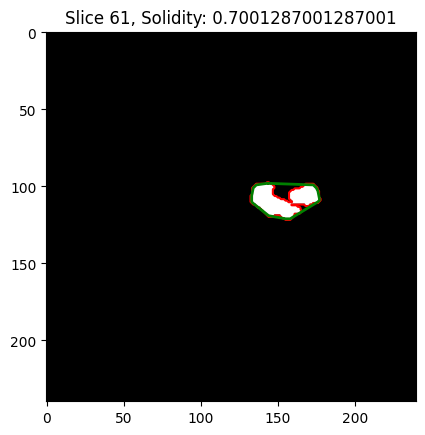

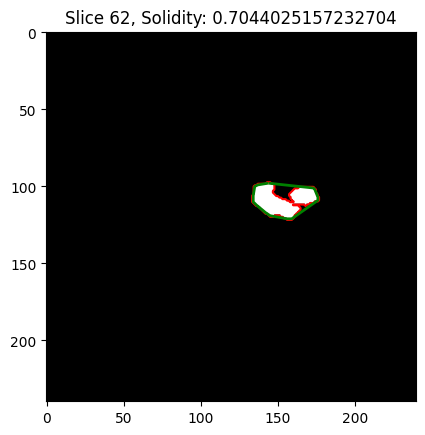

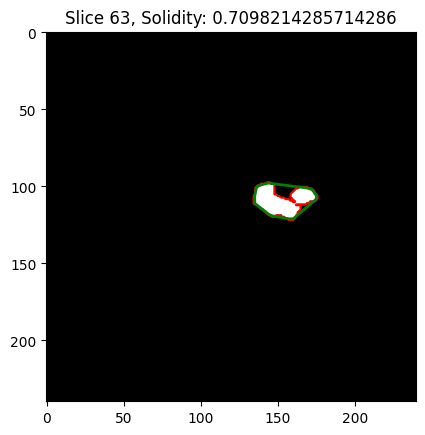

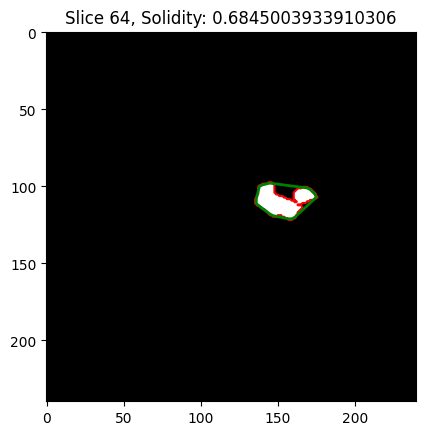

In [27]:
solidity_values = []

for i in range(nii_data.shape[-1]):

    slice_data = nii_data[:, :, i]

    contours, _ = cv2.findContours((slice_data > 0).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if len(contours) > 0:
        contour_area = cv2.contourArea(contours[0])
        convex_hull = cv2.convexHull(contours[0])
        convex_hull_area = cv2.contourArea(convex_hull)


    if convex_hull_area > 0:
        solidity = contour_area / convex_hull_area
        solidity_values.append(solidity)
    else:
        solidity_values.append(0)
    

    plt.figure()
    plt.imshow(slice_data, cmap='gray')
    plt.contour(slice_data, levels=[0.5], colors='r') 
    plt.plot(convex_hull[:, 0, 0], convex_hull[:, 0, 1], 'g', linewidth=2)
    plt.title(f"Slice {i}, Solidity: {solidity_values[-1]}")
    plt.show()

In [ ]:
print()